# Plots - BS, DOS, pDOS, QE, MTE, Murnaghan EOS, Convergence

In [1]:
import subprocess,os,mmap,sys
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import numpy as np
from pathlib import Path
import pandas as pd

from ase.io import read
from ase.visualize import view
from ase.build import surface
import ase.calculators.castep
import ase.io.castep

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

from scipy.stats import norm
from scipy.ndimage import gaussian_filter1d
from scipy.ndimage import convolve1d

sys.path.append("C:/Users/fcm19/Desktop/PhD/Project/modules_codes/script_share")
# from python.bs_plotter_felix_mod.src import *
from python_functions import *
from castep_output_class import *
from optados_output_class import *
from optados_plotting_functions import *



In [3]:
def extract_totals(files:list,labels:list):
    if len(labels) != len(files):
        raise IndexError('The number of given files and labels does not match!')
    totals = {}
    for idx,file in enumerate(files):
        local_total = []        
        for energy in file.qe_data.keys():
            local_total.append([float(energy),file.qe_data[energy]['total']])
        totals[labels[idx]] = np.array(local_total)
    return totals;

def extract_mte(files:list, labels:list):
    if len(labels) != len(files):
        raise IndexError('The number of given files and labels does not match!')
    totals = {}
    for idx,file in enumerate(files):
        local_total = []        
        for energy in file.qe_data.keys():
            local_total.append([float(energy),file.qe_data[energy]['mte']*1000])
        totals[labels[idx]] = np.array(local_total)
    return totals;

def extract_wkfs(files:list, labels:list):
    if len(labels) != len(files):
        raise IndexError('The number of given files and labels does not match!')
    totals = {}
    for idx,file in enumerate(files):
        totals[labels[idx]] = file.od_parameters['photo_work_function']
    return totals;

In [5]:
cu_z1 = OptaDOSOutput(Path('./OD_debug_files/Cu100_10L_PCvsSC/1x1/atom_optics_01_24/Cu100_1x1_3step_sweep_4.2_9.2_jdos_0.05_max25.odo')).get_totals()
cu_rm_z1 = OptaDOSOutput(Path('./OD_debug_files/Cu100_pos_and_vol/middle/zs_removed/Cu100_od_rerun_z1.odo')).get_totals()
cu_z3 = OptaDOSOutput(Path('./OD_debug_files/Cu100_pos_and_vol/middle/z3/atom_volume_optics_01_24/Cu100_od_rerun_3step_sweep_4.2_9_jdos_25max.odo')).get_totals()
cu_rm_z3 = OptaDOSOutput(Path('./OD_debug_files/Cu100_pos_and_vol/middle/zs_removed/Cu100_od_rerun_z3.odo')).get_totals()
cu_z5 = OptaDOSOutput(Path('./OD_debug_files/Cu100_pos_and_vol/middle/z5/atom_volume_optics_01_24/Cu100_od_rerun_3step_sweep_4.2_9_jdos_25max.odo')).get_totals()
cu_rm_z5 = OptaDOSOutput(Path('./OD_debug_files/Cu100_pos_and_vol/middle/zs_removed/Cu100_od_rerun_z5.odo')).get_totals()
cu_v10 = OptaDOSOutput(Path('./OD_debug_files/Cu100_pos_and_vol/middle/v10/optics_atoms_01_24/Cu100_v10_sweep_4.2_9_jdos_25max.odo.3step')).get_totals()
cu_rm_v10 = OptaDOSOutput(Path('./OD_debug_files/Cu100_pos_and_vol/middle/v10/optics_atoms_01_24/Cu100_v10_sweep_4.2_9_jdos_25max_removed_bands.odo.3step')).get_totals()
cu_z90 = OptaDOSOutput(Path('./OD_debug_files/Cu100_pos_and_vol/middle/z120/Cu100_mp.odo')).get_totals()

In [ ]:
cu_1x1 = OptaDOSOutput(Path('./OD_debug_files/Cu100_10L_PCvsSC/1x1/atom_optics_01_24/Cu100_1x1_sweep_4.2_9.2_jdos_full.odo'))
cu_2x2 = OptaDOSOutput(Path('./OD_debug_files/Cu100_10L_PCvsSC/2x2/optics_PE_01_24/Cu100_2x2_sweep_4.2_9.2_jdos_0.05_full.odo'))

In [ ]:
totals = extract_totals([cu_1x1,cu_2x2],['1x1','2x2'])

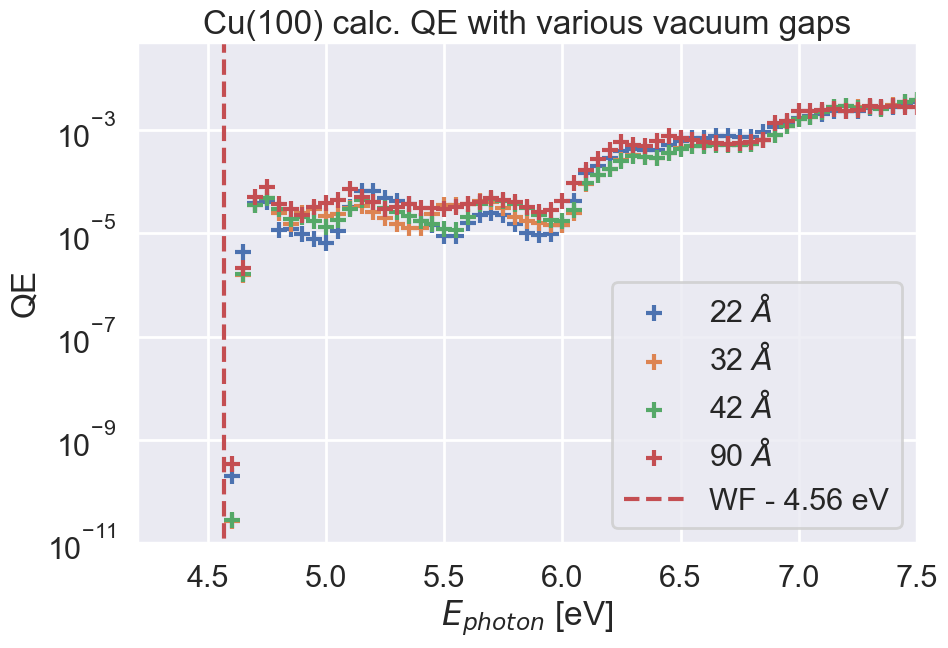

In [7]:
# ax.scatter(totals['v10brm'][:,0],totals['v10brm'][:,1],marker='+',label='v10 - bands rm')
# ax.scatter(totals['v22brm'][:,0],totals['v22brm'][:,1],marker='+',label='v22 - bands rm')
# ax.scatter(totals['v32brm'][:,0],totals['v32brm'][:,1],marker='+',label='v32 - bands rm')
# ax.scatter(totals['v42brm'][:,0],totals['v42brm'][:,1],marker='+',label='v42 - bands rm')
from matplotlib.pyplot import xlabel


fig,ax = plt.subplots(1,1,figsize=(10,7))
sns.set_theme(style="darkgrid")
sns.set_context("poster")
# ax.scatter(totals['v10'][:,0],totals['v10'][:,1],marker='+',label='10 $\AA$')
ax.scatter(cu_z1[:,0],cu_z1[:,1],marker='+',label='22 $\AA$')
ax.scatter(cu_z3[:,0],cu_z3[:,1],marker='+',label='32 $\AA$')
ax.scatter(cu_z5[:,0],cu_z5[:,1],marker='+',label='42 $\AA$')
ax.scatter(cu_z90[:,0],cu_z90[:,1],marker='+',label='90 $\AA$')

# ax.scatter(cu_rm_z1[:,0],cu_rm_z1[:,1],marker='+',label='22 $\AA$')
# ax.scatter(cu_rm_z3[:,0],cu_rm_z3[:,1],marker='+',label='32 $\AA$')
# ax.scatter(cu_rm_z5[:,0],cu_rm_z5[:,1],marker='+',label='42 $\AA$')
# ax.scatter(totals['v22 - bands rm'][:,0],totals['v22 - bands rm'][:,1],marker='+',label='v22 - bands rm')

# ax.scatter(totals['1x1'][:,0],totals['1x1'][:,1],marker='+',label='1x1')
# ax.scatter(totals['2x2'][:,0],totals['2x2'][:,1],marker='+',label='2x2')

ax.vlines([4.5688],ymin=0,ymax=0.05,linestyles=['--'],colors=['r'],label='WF - 4.56 eV')
ax.set(yscale = 'log',ylabel = 'QE', xlabel = '$E_{photon}$ [eV]',ylim =(1E-11,0.05),xlim=(4.2,7.5))
plt.title('Cu(100) calc. QE with various vacuum gaps')# = 25 eV$')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./OD_debug_files/Cu100_pos_and_vol/middle/Poster_figure.png',dpi = 250)

In [ ]:
cu_1x1 = OptaDOSOutput(Path('./OD_debug_files/Cu100_10L_PCvsSC/8L_1x1/Cu100_1x1.odo.05'))
cu_2x2 = OptaDOSOutput(Path('./OD_debug_files/Cu100_10L_PCvsSC/8L_2x2/Cu100_2x2.odo.05'))

In [ ]:
totals_1x1 = []
totals_2x2 = []
for energy in cu_1x1.qe_data.keys():
    totals_1x1.append([float(energy),cu_1x1.qe_data[energy]['total']])
for energy in cu_2x2.qe_data.keys():
    totals_2x2.append([float(energy),cu_2x2.qe_data[energy]['total']])
totals_1x1 = np.array(totals_1x1)
totals_2x2 = np.array(totals_2x2)

In [ ]:
plt.scatter(totals_1x1[:,0],totals_1x1[:,1],marker='+',label='1x1')
plt.scatter(totals_2x2[:,0],totals_2x2[:,1],marker='+',label='2x2')
plt.vlines([4.4558],ymin=0,ymax=0.05,linestyles=['--'],colors=['r'],label='WF')
plt.yscale('log')
plt.ylim(1E-11,0.05)
plt.legend()
plt.savefig('./OD_debug_files/Cu100_10L_PCvsSC/8L_2x2/Comp_QE_data_05_log.png',dpi = 250)

In [ ]:
plt.scatter(totals_1x1[:,0],totals_1x1[:,1],marker='+',label='1x1')
plt.scatter(totals_2x2[:,0],totals_2x2[:,1],marker='+',label='2x2')
plt.vlines([4.4558],ymin=0,ymax=0.05,linestyles=['--'],colors=['r'],label='WF')
plt.ylim(0,0.02)
plt.legend()
plt.savefig('./OD_debug_files/Cu100_10L_PCvsSC/8L_2x2/Comp_QE_data_0.05_linear.png',dpi = 250)

## Functions

In [ ]:
directory = "./OD_debug_files/OptaDOS_debug_output/4-added_singular_value_printing/"
file = 'Ag100_fine_grid_4.7_1step_0.1_iprint_5.odo'
filename = directory + file 
one_step_point1 = read_qe_calculation_values(filename,model='1step')
print(one_step_point1['printed_quantities'])
print(one_step_point1['data_shape'])
print(one_step_point1['values'][0,0,0,0,:])

In [ ]:
for i in range(len(one_step_point1['values'][0,:,0,0,0])):
    if one_step_point1['values'][0,i,0,0,1] > 0:
        print(i)
        print(one_step_point1['values'][0,i,0,0,:])

In [ ]:
directory = "./OD_debug_files/OptaDOS_debug_output/4-added_singular_value_printing/"
file = 'Ag100_fine_grid_4.7_1step_0.001_iprint_5.odo'
filename = directory + file 
one_step_point001 = read_qe_calculation_values(filename,model='1step')
print(one_step_point001['printed_quantities'])
print(one_step_point001['data_shape'])
print(one_step_point001['values'][0,0,0,0,:])


In [ ]:
directory = "./OD_debug_files/OptaDOS_debug_output/4-added_singular_value_printing/"
file = 'Ag100_fine_grid_4.7_3step_0.1_iprint_5.odo'
filename = directory + file 
three_step_point1 = read_qe_calculation_values(filename,model='3step')

In [ ]:
filtered_three_step_point1 = filter_3step_values(three_step_point1)

In [ ]:
temp_array = filtered_three_step_point1['values'][:,2:13]
print(temp_array.shape)
print(temp_array[0])
print(len(temp_array))
for i in range(len(temp_array)):
    if not np.any(temp_array[i] == 0):
        print(i)
        print(filtered_three_step_point1['indices'][i])


In [ ]:
for i in range(len(temp_array[0])):
    print(filtered_three_step_point1['printed_quantities'][i+1],np.sum(temp_array[:,i]))

In [ ]:
print(three_step_point1['values'][0:3,0,0,0,0,:])

In [ ]:
directory = './OD_debug_files/OD_visualisation_tests/XGMX_bs_path/bs_test/'
file = 'Ag100_fine_grid_4.2_3step_0.1_20_5_bs_path.odo'
filename = directory + file 
three_step_bspath = read_qe_calculation_values(filename,model='3step')
print(three_step_bspath['values'].shape)
print(three_step_bspath['printed_quantities'])
print(three_step_bspath['qe_values'][0])
print(three_step_bspath['values'][0,:])
three_step_bspath['indices'][0,:]
# filtered_three_step_bspath = filter_3step_values(three_step_bspath)
# print(filtered_three_step_bspath['values'][0])
# print(filtered_three_step_bspath['indices'][0])
# print(three_step_bspath['data_shape'])

In [ ]:
filter_array = three_step_bspath['qe_values']> 0.0 
filtered_qe =  three_step_bspath['qe_values'][filter_array]
filtered_indices = three_step_bspath['indices'][filter_array]
filtered_values = three_step_bspath['values'][filter_array]
print(filtered_indices.shape)
print(filtered_qe.shape)
print(filtered_values.shape)
print(filtered_indices[0])
print(filtered_qe[0])
print(filtered_values[0])
with open("./OD_debug_files/OD_visualisation_tests/XGMX_bs_path/bs_test/filtered_qe_contributions.dat",'w') as f:
    f.write(str(three_step_bspath['printed_quantities'][1:])+'\n')
    f.write('Fermi Energy = ' + str(round(three_step_bspath['e_fermi'],6)) + '\n')
    for index in range(len(filtered_indices)):
        f.write('Atom, Psi_i, Psi_f, Spin, K-pt\n')
        f.write(str(filtered_indices[index])+'\n')
        f.write(str(filtered_qe[index])+'\n')
        for i in range(filtered_values.shape[1]):
            f.write(str(filtered_values[index,i])+'  ')
        f.write('\n')
print("I am DONE :D")

In [ ]:
directory = "./OD_debug_files/OptaDOS_debug_output/4-added_singular_value_printing/"
file = 'Ag100_fine_grid_4.7_3step_0.001_iprint_5.odo'
filename = directory + file 
three_step_point001 = read_qe_calculation_values(filename,model='3step')
print(three_step_point001['values'].shape)
three_step_point001['loop_lengths'] = [13] + three_step_point001['loop_lengths']
three_step_point001['values'] = np.reshape(three_step_point001['values'].flatten(order='C'),three_step_point001['loop_lengths'],order='F')
print(three_step_point001['values'].shape)
print(three_step_point001['printed_data'])

In [ ]:
directory ="./OD_debug_files/OptaDOS_debug_output/3-added_delta_function_printing/" 
file = "Ag100_3step_delta_function.txt"
filename = directory + file
delta_function = read_in_debug_file(filename)

In [ ]:
from matplotlib.colors import LogNorm
fields = np.zeros([237,237])
print(fields.shape)
indices = []
for k in range(36):
    if np.sum(delta_function[:,:,k]) != 0:
        print("Index", k, "=", np.sum(delta_function[:,:,k]))
        for j in range(237):
            for i in range(237):
                if delta_function[i,j,k] != 0:
                    #print(k,j, np.sum(delta_function[:,j,k]))
                    fields[i,j] += 1
        indices.append(k)
fig, axes = plt.subplots(3,3,figsize=(20,20),dpi=200)
for i,ax in enumerate(axes.ravel()):
    if i == len(axes.ravel())-1:
        ax.imshow(fields)#,norm=LogNorm(vmin=0,vmax=np.max(fields)))
        ax.set(title="Boolean plot showing if the \ndelta function is /= 0 on any K-Point",xlabel='Final state',ylabel='Initial State')
        ax.xaxis.set_label_position('top')
        ax.xaxis.tick_top()
    else:
        minimum = np.min(delta_function[:,:,indices[i]])
        maximum = np.max(delta_function[:,:,indices[i]]) 
        ax.imshow(delta_function[:,:,indices[i]])#,norm=LogNorm(vmin=minimum,vmax=maximum))
        ax.set(title=f'K-Point #{1 + indices[i]}',xlabel='Final state',ylabel='Initial State')
        ax.xaxis.set_label_position('top')
        ax.xaxis.tick_top()
plt.savefig('./OD_debug_files/Ag100_delta_func_237_237_36.png')
#axes.matshow(fields)
#(xlabel='Final State',ylabel = 'Initial State')
print("max(fields) = " ,np.max(fields))
print("min(delta function values) = ",np.min(delta_function))

In [ ]:
from matplotlib.colors import LogNorm
fields = np.zeros([237,237])
for k in range(36):
    if np.sum(delta_function[:,:,k]) != 0:
        # print("Index", k, "=", np.sum(delta_function[:,:,k]))
        # for j in range(237):
        #     if np.sum(delta_function[:,j,k]):
        #         # print(k,j, np.sum(delta_function[:,j,k]))
        #         fields[j,k] += 1
        #         #fig, axes = plt.subplots(1,1,figsize=(20,20))
        minimum = np.min(delta_function[:,:,k])
        maximum = np.max(delta_function[:,:,k]) 
        fig, ax = plt.subplots(1,1,figsize=(10,10),dpi=200)
        ax.imshow(delta_function[:,:,k])#,norm=LogNorm(vmin=minimum,vmax=maximum))
        ax.set(xlabel='Final state',ylabel='Initial State',)
        ax.xaxis.set_label_position('top')
        ax.xaxis.tick_top()

In [ ]:
directory ="./OD_debug_files/OptaDOS_debug_output/3-added_delta_function_printing/" 
file = "Ag100_3step_QE_matrix.txt"
filename = directory + file
qe_matrix = read_in_debug_file(filename)

In [ ]:
data_matrices = {'norm':{},'test':{}}
file_bands = './OD_debug_files/OD_visualisation_tests/Ag100_fine_grid.bands'
data_bands = read_bands_file(file_bands)

In [ ]:
energies = np.linspace(4.79,4.85,7)
keywords = [['norm',''],['test','_test']]
#energies =[4.85]
for keyword in keywords:
    for energy in energies:
        file = f'./OD_debug_files/OD_visualisation_tests/iprint_6/Ag100_fine_grid_{energy:.2f}_3step_0.01_20_6{keyword[1]}.odo'
        data = read_qe_matrix_values(file)
        data_matrices[keyword[0]][round(energy,2)] = data
        print(f'{energy:.2f}')

In [ ]:
import matplotlib.colors as mlp
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(12,5),dpi=200)
ax = fig.add_subplot()
qe_sum = np.zeros((7,237,36))
energies = np.linspace(4.79,4.85,7)

for idx,energy in enumerate(energies[:-1]):
    qe_sum[idx,:,:] = np.sum(data_matrices['test'][round(energy,2)]['matrix'],axis=(1,3,4))
norm = mlp.Normalize(vmin=0, vmax=np.nanmax(qe_sum))
for idx,energy in enumerate(energies[:-1]):
    x_val = np.full((237),round(energy,2))
    for i in range(np.shape(qe_sum)[2]):
        if np.sum(qe_sum[idx,:,i]) > 0:
            alphas = qe_sum[idx,:,i]/np.nanmax(qe_sum[idx,:,i])
            ax.scatter(x = x_val, y = data_bands['eigenval_efermi_0'][:,0,i],cmap='cividis',c= norm(qe_sum[idx,:,i]),marker='.',alpha=alphas)
            ax.set_xlabel('Photon Energy [eV]')
            ax.set_ylabel(r'$E - E_F$ [eV]')
            ax.set_facecolor('white')
    for j in range(np.shape(qe_sum)[2]):
        if np.sum(qe_sum[idx,:,j]) > 0:
            print(np.nanmax(qe_sum[idx,:,j]))
            print(np.sum(qe_sum[idx,:,:]))
            for k in range(237):
                if abs(np.nanmax(qe_sum[idx,:,j]) - qe_sum[idx,k,j]) < 1E-12:
                    ax.annotate(str(qe_sum[idx,k,j]),xy=[energies[idx],data_bands['eigenval_efermi_0'][k,0,j]],xytext=[5,5],textcoords='offset pixels')
plt.title(f"QE contribution from bands at Kpoint {data_matrices['norm'][4.79]['kpoints'][16]}")
plt.ylim(-10,35)
plt.savefig('./OD_debug_files/OD_visualisation_tests/Ag100_band_emission_near_edge_comp_OD_test.png')

In [ ]:

energies = np.linspace(4.4,4.7,4)
model = '1step'
iprint = 7
for energy in energies:
    file = f'./OD_debug_files/OD_visualisation_tests/15_15_iprint_7/Ag100_fine_grid_{energy:.2f}_1step_0.1_20_7.odo'
    print(file)
    data = read_qe_matrix_values(file)
    #data_matrices['test'][round(energy,2)] = data
    #print(round(energy,2))
    if data['model'] == '3step' and iprint == 6:
        qe_sum = np.sum(data['matrix'],axis = (0,1,3,4))
    elif data['model'] == '1step' or iprint == 7:
        qe_sum = np.sum(data['matrix'],axis = (0,2,3))
    #plt.style.use('seaborn-bright')
    #print(plt.style.available)
    half_bz = 2.193102/2
    fig = plt.figure(figsize=(8,8),dpi=200)
    ax = fig.add_subplot()
    ax.scatter(data['kpoints'][:,0],data['kpoints'][:,1],cmap='viridis',c=qe_sum/np.nanmax(qe_sum))
    ax.plot([0,0,half_bz,0],[half_bz,0,half_bz,half_bz],c='tab:green')
    ax.xaxis.tick_top()
    ax.set_xlabel(r'Recip lattice vector $\vec{b}_1$ $\AA^{-1}$')  
    ax.set_ylabel(r'Recip lattice vector $\vec{b}_2$ $\AA^{-1}$')  
    ax.xaxis.set_label_position('top') 
    ax.set_facecolor('white')
    plt.title(f'Summed QE for each K-Point with Photon Energy @ {energy:.2f}\nTotal QE = {np.sum(qe_sum):.4E}')
    plt.annotate('X',[0,half_bz],[-20,20],textcoords='offset pixels',fontweight='bold',fontsize = 'large')
    plt.annotate(r'$\bf{\Gamma}$',1,[-24,-24],textcoords='offset pixels',fontweight='bold',fontsize = 'large')
    plt.annotate('M',[half_bz,half_bz],[15,15],textcoords='offset pixels',fontweight='bold',fontsize = 'large')
    for i in range(np.shape(qe_sum)[0]):
        if qe_sum[i] > 1E-50:
            plt.annotate(f'{qe_sum[i]:.6E}',data['kpoints'][i,:2],[10,10],textcoords='offset pixels')
    plt.tight_layout()
    plt.rcParams.update({
        "savefig.facecolor": (1.0, 1.0, 1.0, 1),
    })
    plt.savefig(f'./OD_debug_files/OD_visualisation_tests/Ag100_QE_15_15_kpt_visual_{energy:.2f}.png')

In [ ]:

energies = np.linspace(4.2,6.5,24)
model = '1step'
iprint = 7
for energy in energies:
    file = f'./OD_debug_files/OD_visualisation_tests/XGMX_bs_path/1step_7/Ag100_fine_grid_{energy:.2f}_1step_0.1_20_7_bs_path.odo'
    print(file)
    data = read_qe_matrix_values(file)
    #data_matrices['test'][round(energy,2)] = data
    #print(round(energy,2))
    if data['model'] == '3step' and iprint == 6:
        qe_sum = np.sum(data['matrix'],axis = (0,1,3,4))
    elif data['model'] == '1step' or iprint == 7:
        qe_sum = np.sum(data['matrix'],axis = (0,2,3))
    #plt.style.use('seaborn-bright')
    #print(plt.style.available)
    half_bz = 2.193102/2
    fig = plt.figure(figsize=(8,8),dpi=200)
    ax = fig.add_subplot()
    ax.scatter(data['kpoints'][:,0],data['kpoints'][:,1],cmap='viridis',c=qe_sum/np.nanmax(qe_sum))
    ax.plot([0,0,half_bz,0],[half_bz,0,half_bz,half_bz],c='tab:green')
    ax.xaxis.tick_top()
    ax.set_xlabel(r'Recip lattice vector $\vec{b}_1$ $\AA^{-1}$')  
    ax.set_ylabel(r'Recip lattice vector $\vec{b}_2$ $\AA^{-1}$')  
    ax.xaxis.set_label_position('top') 
    ax.set_facecolor('white')
    plt.title(f'Summed QE for each K-Point with Photon Energy @ {energy:.2f}\nTotal QE = {np.sum(qe_sum):.4E}')
    # plt.annotate('X',[0,half_bz],[-20,20],textcoords='offset pixels',fontweight='bold',fontsize = 'large')
    # plt.annotate(r'$\bf{\Gamma}$',1,[-24,-24],textcoords='offset pixels',fontweight='bold',fontsize = 'large')
    # plt.annotate('M',[half_bz,half_bz],[15,15],textcoords='offset pixels',fontweight='bold',fontsize = 'large')
    for i in range(np.shape(qe_sum)[0]):
        if qe_sum[i] > 1E-50:
            plt.annotate(f'{qe_sum[i]:.6E}',data['kpoints'][i,:2],[10,10],textcoords='offset pixels')
    # plt.tight_layout()
    plt.rcParams.update({
        "savefig.facecolor": (1.0, 1.0, 1.0, 1),
    })
    plt.savefig(f'./OD_debug_files/OD_visualisation_tests/Ag100_QE_XGMX_kpt_visual_{energy:.2f}.png')

In [ ]:
path = './OD_debug_files/OD_visualisation_tests/Ag100_fine_grid.bands.spec'
more_bands = read_bands_file(path)
for item in more_bands['kpt_frac']:
    print(item[0], item[1], item[2], f"1/{np.shape(more_bands['kpt_frac'])[0]}")

## Plotting 3D Data of Cu100 QE for a MP-like k grid

### 1step

In [ ]:
if 'data_1step_matrices' not in locals():
    data_1step_matrices = {'norm':{},'test':{},'xgmx_bs':{},'shift':{}}
    data_1step_odo = {'norm':{},'test':{},'xgmx_bs':{},'shift':{}}
energies = np.linspace(4.4,6.0,33)
#energies = [4.2,4.3,4.4]
for energy in energies:
    file = Path(f'./OD_debug_files/Cu100_pos_and_vol/pc_no_symmetry/od_files/Cu100_1x1_{energy:.2f}_1step_0.05_20_7.odo')
    data = read_qe_matrix_values_odo(file)
    odo = OptaDOSOutput(file)
    data_1step_odo['shift'][round(energy,2)] = [odo.qe_data[f'{energy:.4f}']['total'],odo.qe_data[f'{energy:.4f}']['mte']]
    data_1step_matrices['shift'][round(energy,2)] = data
file_bands = './OD_debug_files/Cu100_pos_and_vol/pc_no_symmetry/Cu100_1x1.bands.spec.mod'
data_bands_shift = read_bands_file(file_bands)

In [ ]:
bands_xy = []
for index in range(len(data_bands_shift['kpt_cart'][:,0])):
    bands_xy.append([x for x in data_bands_shift['kpt_cart'][index,:2]])
bands_xy = np.array(bands_xy)

In [ ]:
bands_new,indices_1 = mirror_xy(bands_xy)
bands_new_2,indices_2 = mirror_xy(bands_new)
# plt.scatter(x=bands_xy[:,0],y=bands_xy[:,1],alpha = 0.6)
# plt.scatter(x=bands_new_2[:,0],y=bands_new_2[:,1],alpha = 0.6)
# plt.show()


In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# General Settings
system = 'shift'
xyz_lim = [False,False,True] # Do I want to limit the shown energies in the plot?
x = 0.2
y = x
limits = [[-x,x],[-y,y],[-3,3]] # What are the limits if the plot has limits applied?

# qe_bands(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES

num_eigen = data_bands_shift['num_eigen']
num_kpts = data_bands_shift['num_kpt']
num_energies = len(energies)
num_layers = np.shape(data_1step_matrices[system][energies[0]]['matrix'])[-1]
i = 0
imax = num_energies-1
#print(num_layers)

# Setting up all the arrays needed for holding the data
qe_bands = np.zeros((num_eigen,num_kpts))
band_energies = np.zeros((num_eigen,num_kpts))
kpoint_coords = np.zeros((2,num_kpts))
qe_totals = np.zeros(num_energies)
mtes = np.zeros(num_energies)
data_struct = {}
max_bands,max_layers,max_mte,max_qe = 0,0,0,0
min_bands,min_layers,min_mte,min_qe = np.Infinity,np.Infinity,np.Infinity,np.Infinity
# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_shift['eigenval_efermi_0'],axis=1)
kpoint_coords = data_bands_shift['kpt_cart'][:,:2]
energies_str = [str(round(x,2)) for x in energies]
for idx,energy in enumerate(energies):
    data_struct[str(round(energy,2))] = {'values':None,'scales':None,'layers':None,'totals':None,'mte':None}
    bands_and_data = np.zeros((num_eigen,num_kpts,4))
    temp_matrix = data_1step_matrices[system][round(energy,2)]['matrix']
    qe_bands[:,:] = np.sum(temp_matrix,axis=(2,3))
    data_struct[str(round(energy,2))]['layers'] = np.sum(temp_matrix,axis=(0,1,2))
    data_struct[str(round(energy,2))]['total'] = np.sum(qe_bands[:,:])
    qe_totals[idx] = np.sum(qe_bands[:,:])
    data_struct[str(round(energy,2))]['mte'] = data_1step_odo[system][round(energy,2)][1]*1000
    mtes[idx] = data_1step_odo[system][round(energy,2)][1]*1000
    for j in range(num_kpts):
        for i in range(num_eigen):
            bands_and_data[i,j,0] = kpoint_coords[j,0]
            bands_and_data[i,j,1] = kpoint_coords[j,1]
            bands_and_data[i,j,2] = band_energies[i,j]
            bands_and_data[i,j,3] = qe_bands[i,j]
    bands_and_data = copy_mirrored_data(indices=indices_1,data_in=bands_and_data)
    bands_xyz_filtered = copy_mirrored_data(indices=indices_2,data_in=bands_and_data).reshape((num_eigen*(num_kpts+len(indices_1)+len(indices_2)),4))
    for i in range(3):
        if xyz_lim[i]:
            u1=bands_xyz_filtered[:,i]>=limits[i][0]
            bands_xyz_filtered = bands_xyz_filtered[u1,:]
            u2=bands_xyz_filtered[:,i]<=limits[i][1]
            bands_xyz_filtered = bands_xyz_filtered[u2,:]
    max_bands = max(np.nanmax(bands_xyz_filtered[:,3]),max_bands)
    max_qe = max(max_qe,qe_totals[idx])
    max_layers = max(np.nanmax(data_struct[str(round(energy,2))]['layers']),max_layers)
    max_mte = max(data_1step_odo[system][round(energy,2)][1],max_mte)
    min_bands = min(np.nanmin(bands_xyz_filtered[:,3]),min_bands)
    min_qe = min(min_qe,qe_totals[idx])
    min_layers = min(np.nanmin(data_struct[str(round(energy,2))]['layers']),min_layers)
    min_mte = min(data_1step_odo[system][round(energy,2)][1],min_mte)
    data_struct[str(round(energy,2))]['values'] = bands_xyz_filtered

min_bands = 1E-20
min_layers = 1E-20
norm_bands = mlp.LogNorm(vmin=min_bands, vmax=max_bands,clip = True)
norm_layers = mlp.LogNorm(vmin=min_layers,vmax=max_layers,clip=True)
norm_totals = mlp.LogNorm(vmin=min_qe,vmax=max_qe,clip=True)
norm_mte = mlp.LogNorm(vmin=min_mte+1E-100,vmax=max_mte,clip=True)
m_totals = mpl.cm.ScalarMappable(norm=norm_totals,cmap='plasma')
m_mte = mpl.cm.ScalarMappable(norm=norm_mte,cmap='plasma')

for energy in energies:
    data_struct[str(round(energy,2))]['scales'] = norm_bands(data_struct[str(round(energy,2))]['values'][:,3])*200
init_values = data_struct[str(round(energies[0],2))]
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(figsize=(15,10),dpi=200)
# gs = GridSpec(2,4, figure=fig,width_ratios=(1,2,2,1),height_ratios=[2,1])
# axs_top0 = fig.add_subplot(gs[0,0])
# axs_top1 = fig.add_subplot(gs[0,1:-1],projection='3d',proj_type='ortho')
# axs_top2 = fig.add_subplot(gs[0,-1])
# axs_bot0 = fig.add_subplot(gs[1,:2])
# axs_bot1 = fig.add_subplot(gs[1,2:])
axs_top1 = fig.add_subplot(projection='3d',proj_type='ortho')

axs_top1.plot(init_values['values'][:,0],init_values['values'][:,1],init_values['values'][:,2],linestyle='',color='grey',marker='.',alpha=0.3,)
qe_3d_scatter = axs_top1.scatter(xs=init_values['values'][:,0],ys=init_values['values'][:,1],zs=init_values['values'][:,2],cmap='plasma',norm=norm_bands,c=init_values['values'][:,3],marker='o',s=init_values['scales'])
fig.colorbar(mpl.cm.ScalarMappable(norm=norm_bands,cmap= 'plasma'),ax = axs_top1,orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)

# scatter_layer = axs_top2.scatter(np.full(num_layers,1),np.arange(0,-1*num_layers,-1),norm=norm_layers,cmap = 'plasma',c=init_values['layers'],marker='o')
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm_layers,cmap= 'plasma'),ax = axs_top2,orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
# layer_ticks = np.arange(0,-num_layers,-1)
# labels_layers = ['Surface'] + np.arange(-1,-num_layers+1,-1).tolist() + ['Bulk']
# axs_top2.set_xticks([])
# axs_top2.set_yticks(layer_ticks,labels_layers)
# annotations = {}
# for j in range(num_layers): annotations[j] = axs_top2.annotate(text=f"{init_values['layers'][j]:.4E}", xy=(1,-1*j),xytext=(-50,15), textcoords='offset pixels', xycoords='data')

# axs_bot0.scatter(energies,qe_totals,color='grey',marker='.',zorder=1)
# total_qe = axs_bot0.scatter(energies[0],qe_totals[0],color=m_totals.to_rgba(qe_totals[0]),zorder=2)
# colorbar_total = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_totals,cmap= 'plasma'),ax = axs_bot0,orientation='vertical',label = 'QE',pad=0.05)
# axs_bot0.set_xlabel('Photon Energy [eV]')
# axs_bot0.set_ylabel('total QE')
# axs_bot0.set_yscale('log')

# axs_bot1.scatter(energies, mtes,color='grey',marker='.',zorder=1)
# mte = axs_bot1.scatter(energies[0],mtes[0],color=m_mte.to_rgba(mtes[0]),zorder=2)
# colorbar_mte = fig.colorbar(m_mte,ax = axs_bot1,orientation='vertical',label = 'MTE',pad=0.05)
# axs_bot1.set_xlabel('Photon Energy [eV]')
# axs_bot1.set_ylabel('MTE [meV]')

value = energies[0]
def update(val):
    axs_top1.set_title(f'Energy = {val:.2f} eV')
    # scatter_layer.set_array(data_struct[str(round(val,2))]['layers'])
    # total_qe.set_offsets([round(val,2),data_struct[str(round(val,2))]['total']])
    # total_qe.set_color(m_totals.to_rgba(data_struct[str(round(val,2))]['total']))
    # mte.set_offsets([round(val,2),data_struct[str(round(val,2))]['mte']])
    # mte.set_color(m_mte.to_rgba(data_struct[str(round(val,2))]['mte']))
    # for j in range(num_layers): annotations[j].set_text(f"{data_struct[str(round(val,2))]['layers'][j]:.4E}")
    qe_3d_scatter.set_array(data_struct[str(round(val,2))]['values'][:,3])
    qe_3d_scatter.set_sizes(data_struct[str(round(val,2))]['scales'])
    axs_top1.view_init(elev=90,azim=0)
    fig.canvas.draw_idle()
    # plt.savefig('./')

# index_slider = Slider(
#     ax=axs_top0,
#     label='Photon Energy',
#     valmin=energies[0],
#     valmax=energies[-1],
#     valstep=energies,
#     valinit=energies[0],
#     orientation="vertical",
#     valfmt='%1.2f [eV]'
#     )

for energy in energies:
    update(energy)
    plt.tight_layout()
    plt.savefig(f'./3D_1step_{energy:.2f}.png',dpi=250)


def arrow_key_control(event):
    # value = index_slider.val
    val_temp = value
    step = abs(energies[1]-energies[2])
    if event.key == 'left':
        if val_temp-step < energies[0]:
            # index_slider.set_val(energies[-1])
            value = energies[-1]
            update(energies[-1])
        else:
            # index_slider.set_val(value-step)
            value = val_temp - step
            update(val_temp-step)
    elif event.key == 'right':
        if val_temp+step > energies[-1]:
            # index_slider.set_val(energies[0])
            value = energies[0]
            update(energies[0])
        else:
            # index_slider.set_val(value+step)
            value = val_temp + step
            update(val_temp+step)
    else:
        pass
# update(energies[0])
# index_slider.on_changed(update)
id2 = fig.canvas.mpl_connect('key_release_event', arrow_key_control)


### 3step

In [ ]:
if 'data_3step_matrices' not in locals():
    data_3step_matrices = {'norm':{},'test':{},'xgmx_bs':{},'shift':{}}
    data_3step_odo = {'norm':{},'test':{},'xgmx_bs':{},'shift':{}}
energies = np.linspace(4.4,6.0,33)
#energies = [4.2,4.3,4.4]
for energy in energies:
    file = Path(f'./OD_debug_files/Cu100_pos_and_vol/pc_no_symmetry/od_files/Cu100_1x1_{energy:.2f}_3step_0.05_20_7.odo')
    data = read_qe_matrix_values_odo(file)
    odo = OptaDOSOutput(file)
    data_3step_odo['shift'][round(energy,2)] = [odo.qe_data[f'{energy:.4f}']['total'],odo.qe_data[f'{energy:.4f}']['mte']]
    data_3step_matrices['shift'][round(energy,2)] = data
file_bands = './OD_debug_files/Cu100_pos_and_vol/pc_no_symmetry/Cu100_1x1.bands.spec.mod'
data_bands_shift = read_bands_file(file_bands)


In [ ]:
bands_xy = []
for index in range(len(data_bands_shift['kpt_cart'][:,0])):
    bands_xy.append([x for x in data_bands_shift['kpt_cart'][index,:2]])
bands_xy = np.array(bands_xy)

In [ ]:
bands_new,indices_1 = mirror_xy(bands_xy)
bands_new_2,indices_2 = mirror_xy(bands_new)
# plt.scatter(x=bands_xy[:,0],y=bands_xy[:,1],alpha = 0.6)
# plt.scatter(x=bands_new[:,0],y=bands_new[:,1],alpha = 0.6)
# plt.scatter(x=bands_new_2[:,0],y=bands_new_2[:,1],alpha = 0.6)


In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# General Settings
system = 'shift'
 -6.91010400e+00]]), substrate_sl_vecsymmetrise = True
xyz_lim = [False,False,True] # Do I want to limit the shown energies in the plot?
x = 0.6
y = x
limits = [[-x,x],[-y,y],[-3,3]] # What are the limits if the plot has limits applied?

# qe_bands(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES

num_eigen = data_bands_shift['num_eigen']
num_kpts = data_bands_shift['num_kpt']
num_energies = len(energies)
num_layers = np.shape(data_3step_matrices[system][energies[0]]['matrix'])[-1]
i = 0
imax = num_energies-1
#print(num_layers)

# Setting up all the arrays needed for holding the data
qe_bands = np.zeros((num_eigen,num_kpts))
band_energies = np.zeros((num_eigen,num_kpts))
kpoint_coords = np.zeros((2,num_kpts))
qe_totals = np.zeros(num_energies)
mtes = np.zeros(num_energies)
data_struct = {}
max_bands,max_layers,max_mte,max_qe = 0,0,0,0
min_bands,min_layers,min_mte,min_qe = np.Infinity,np.Infinity,np.Infinity,np.Infinity
# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_shift['eigenval_efermi_0'],axis=1)
kpoint_coords = data_bands_shift['kpt_cart'][:,:2]
energies_str = [str(round(x,2)) for x in energies]
for idx,energy in enumerate(energies):
    data_struct[str(round(energy,2))] = {'values':None,'scales':None,'layers':None,'totals':None,'mte':None}
    bands_and_data = np.zeros((num_eigen,num_kpts,4))
    temp_matrix = data_3step_matrices[system][round(energy,2)]['matrix']
    qe_bands[:,:] = np.sum(temp_matrix,axis=(2,3))
    data_struct[str(round(energy,2))]['layers'] = np.sum(temp_matrix,axis=(0,1,2))
    data_struct[str(round(energy,2))]['total'] = np.sum(qe_bands[:,:])
    qe_totals[idx] = np.sum(qe_bands[:,:])
    data_struct[str(round(energy,2))]['mte'] = data_3step_odo[system][round(energy,2)][1]*1000
    mtes[idx] = data_3step_odo[system][round(energy,2)][1]*1000
    for j in range(num_kpts):
        for i in range(num_eigen):
            bands_and_data[i,j,0] = kpoint_coords[j,0]
            bands_and_data[i,j,1] = kpoint_coords[j,1]
            bands_and_data[i,j,2] = band_energies[i,j]
            bands_and_data[i,j,3] = qe_bands[i,j]
    if symmetrise:
        bands_and_data = copy_mirrored_data(indices=indices_1,data_in=bands_and_data)
        bands_xyz_filtered = copy_mirrored_data(indices=indices_2,data_in=bands_and_data).reshape((num_eigen*(num_kpts+len(indices_1)+len(indices_2)),4))
    else:
        bands_xyz_filtered = bands_and_data.reshape((num_eigen*(num_kpts),4))
    for i in range(3):
        if xyz_lim[i]:
            u1=bands_xyz_filtered[:,i]>=limits[i][0]
            bands_xyz_filtered = bands_xyz_filtered[u1,:]
            u2=bands_xyz_filtered[:,i]<=limits[i][1]
            bands_xyz_filtered = bands_xyz_filtered[u2,:]
    max_bands = max(np.nanmax(bands_xyz_filtered[:,3]),max_bands)
    #max_qe = max(max_qe,qe_totals[idx])
    max_layers = max(np.nanmax(data_struct[str(round(energy,2))]['layers']),max_layers)
    #max_mte = max(data_1step_odo[system][round(energy,2)][1],max_mte)
    min_bands = min(np.nanmin(bands_xyz_filtered[:,3]),min_bands)
    #min_qe = min(min_qe,qe_totals[idx])
    min_layers = min(np.nanmin(data_struct[str(round(energy,2))]['layers']),min_layers)
    #min_mte = min(data_1step_odo[system][round(energy,2)][1],min_mte)
    data_struct[str(round(energy,2))]['values'] = bands_xyz_filtered

min_bands = 1E-20
min_layers = 1E-20
min_qe = np.nanmin(np.nonzero(qe_totals))
min_qe = 1E-100
norm_bands = mlp.LogNorm(vmin=min_bands, vmax=max_bands,clip = True)
norm_layers = mlp.LogNorm(vmin=min_layers,vmax=max_layers,clip=True)
norm_totals = mlp.LogNorm(vmin=min_qe,vmax=np.nanmax(qe_totals),clip=True)
norm_mte = mlp.Normalize(vmin=np.nanmin(np.nonzero(mtes)),vmax=np.nanmax(mtes),clip=True)
m_totals = mpl.cm.ScalarMappable(norm=norm_totals,cmap='plasma')
m_mte = mpl.cm.ScalarMappable(norm=norm_mte,cmap='plasma')

for energy in energies:
    data_struct[str(round(energy,2))]['scales'] = norm_bands(data_struct[str(round(energy,2))]['values'][:,3])*100
init_values = data_struct[str(round(energies[0],2))]
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(figsize=(15,10),dpi=200)
# gs = GridSpec(2,4, figure=fig,width_ratios=(1,2,2,1),height_ratios=[2,1])
# axs_top0 = fig.add_subplot(gs[0,0])
# axs_top1 = fig.add_subplot(gs[0,1:-1],projection='3d',proj_type='ortho')
# axs_top2 = fig.add_subplot(gs[0,-1])
# axs_bot0 = fig.add_subplot(gs[1,:2])
# axs_bot1 = fig.add_subplot(gs[1,2:])
axs_top1 = fig.add_subplot(projection='3d',proj_type='ortho')

axs_top1.plot(init_values['values'][:,0],init_values['values'][:,1],init_values['values'][:,2],linestyle='',color='grey',marker='.',alpha=0.3,)
qe_3d_scatter = axs_top1.scatter(init_values['values'][:,0],init_values['values'][:,1],init_values['values'][:,2],cmap='plasma',norm=norm_bands,c=init_values['values'][:,3],marker='o',s=init_values['scales'])
fig.colorbar(mpl.cm.ScalarMappable(norm=norm_bands,cmap= 'plasma'),ax = axs_top1,orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)


# scatter_layer = axs_top2.scatter(np.full(num_layers,1),np.arange(0,-1*num_layers,-1),norm=norm_layers,cmap = 'plasma',c=init_values['layers'],marker='o')
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm_layers,cmap= 'plasma'),ax = axs_top2,orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
# layer_ticks = np.arange(0,-num_layers,-1)
# labels_layers = ['Surface'] + np.arange(-1,-num_layers+1,-1).tolist() + ['Bulk']
# axs_top2.set_xticks([])
# axs_top2.set_yticks(layer_ticks,labels_layers)
# annotations = {}
# for j in range(num_layers): annotations[j] = axs_top2.annotate(text=f"{init_values['layers'][j]:.4E}", xy=(1,-1*j),xytext=(-50,15), textcoords='offset pixels', xycoords='data')

# axs_bot0.scatter(energies,qe_totals,color='grey',marker='.',zorder=1)
# total_qe = axs_bot0.scatter(energies[0],qe_totals[0],color=m_totals.to_rgba(qe_totals[0]),zorder=2)
# colorbar_total = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_totals,cmap= 'plasma'),ax = axs_bot0,orientation='vertical',label = 'QE',pad=0.05)
# axs_bot0.set_xlabel('Photon Energy [eV]')
# axs_bot0.set_ylabel('total QE')
# axs_bot0.set_yscale('log')

# axs_bot1.scatter(energies, mtes,color='grey',marker='.',zorder=1)
# mte = axs_bot1.scatter(energies[0],mtes[0],color=m_mte.to_rgba(mtes[0]),zorder=2)
# colorbar_mte = fig.colorbar(m_mte,ax = axs_bot1,orientation='vertical',label = 'MTE',pad=0.05)
# axs_bot1.set_xlabel('Photon Energy [eV]')
# axs_bot1.set_ylabel('MTE [meV]')
value = energies[0]
def update(val):
    axs_top1.set_title(f'Energy = {val:.2f} eV')
    # scatter_layer.set_array(data_struct[str(round(val,2))]['layers'])
    # total_qe.set_offsets([round(val,2),data_struct[str(round(val,2))]['total']])
    # total_qe.set_color(m_totals.to_rgba(data_struct[str(round(val,2))]['total']))
    # mte.set_offsets([round(val,2),data_struct[str(round(val,2))]['mte']])
    # mte.set_color(m_mte.to_rgba(data_struct[str(round(val,2))]['mte']))
    # for j in range(num_layers): annotations[j].set_text(f"{data_struct[str(round(val,2))]['layers'][j]:.4E}")
    qe_3d_scatter.set_array(data_struct[str(round(val,2))]['values'][:,3])
    qe_3d_scatter.set_sizes(data_struct[str(round(val,2))]['scales'])
    axs_top1.view_init(elev=90,azim=0)
    fig.canvas.draw_idle()

# index_slider = Slider(
#     ax=axs_top0,
#     label='Photon Energy',
#     valmin=energies[0],
#     valmax=energies[-1],
#     valstep=energies,
#     valinit=energies[0],
#     orientation="vertical",
#     valfmt='%1.2f [eV]'
#     )

for energy in energies:
    update(energy)
    plt.tight_layout()
    plt.savefig(f'./3D_3step_{energy:.2f}.png',dpi=250)


def arrow_key_control(event):
    # value = index_slider.val
    val_temp = value
    step = abs(energies[1]-energies[2])
    if event.key == 'left':
        if val_temp-step < energies[0]:
            # index_slider.set_val(energies[-1])
            value = energies[-1]
            update(energies[-1])
        else:
            # index_slider.set_val(value-step)
            value = val_temp - step
            update(val_temp-step)
    elif event.key == 'right':
        if val_temp+step > energies[-1]:
            # index_slider.set_val(energies[0])
            value = energies[0]
            update(energies[0])
        else:
            # index_slider.set_val(value+step)
            value = val_temp + step
            update(val_temp+step)
    else:
        pass
# update(energies[0])
# index_slider.on_changed(update)
id2 = fig.canvas.mpl_connect('key_release_event', arrow_key_control)

### Create Movies

In [ ]:
# importing libraries
import os
import cv2  
  
# Video Generating function
def generate_video(image_folder:str,framerate:float):      
    images = [img for img in os.listdir(image_folder)
            #   if '3step' in img]
              if img.endswith(".png")]
  
    frame = cv2.imread(os.path.join(image_folder, images[0]))
  
    # setting the frame width, height width
    # the width, height of first image
    height, width, layers = frame.shape  
  
    video = cv2.VideoWriter('temp.avi', 0, framerate, (width, height)) 
  
    # Appending the images to the video one by one
    for image in images: 
        video.write(cv2.imread(os.path.join(image_folder, image))) 
    # Deallocating memories taken for window creation
    cv2.destroyAllWindows() 
    video.release()  # releasing the video generated
    os.system("ffmpeg -i int_2.avi -vcodec libx264 Interface_step.mp4")
    os.system('rm -f temp.avi')



# Plot an interactive BS plot with QE values superimposed

### 3step

In [ ]:
data_3step_matrices = {'norm':{},'test':{},'xgmx_bs':{}}
data_3step_odo = {'norm':{},'test':{},'xgmx_bs':{}}
energies = np.linspace(4.2,6.5,24)
for energy in energies:
    file = Path(f'./OD_debug_files/OD_visualisation_tests/XGMX_bs_path/3step_7/Ag100_fine_grid_{energy:.2f}_3step_0.1_20_7_bs_path.odo')
    data = read_qe_calculation_values(file)
    odo = OptaDOSOutput(file)
    print(odo.qe_data)
    data_3step_odo['xgmx_bs'][round(energy,2)] = [odo.qe_data[f'{energy:.4f}']['total'],odo.qe_data[f'{energy:.4f}']['mte']]
    data_3step_matrices['xgmx_bs'][round(energy,2)] = data
file_bands = './OD_debug_files/OD_visualisation_tests/Ag100_fine_grid_bs_path-spectral.bands'
data_bands = read_bands_file(file_bands)

In [ ]:
from collections import defaultdict
import re
# from configparser import MAX_INTERPOLATION_DEPTH
# from multiprocessing.spawn import old_main_modules
import warnings
from pathlib import Path
import mmap
import numpy as np

class OptaDOSQEMat:
    def __init__(self, path:Path) -> None:
        h2eV = 27.2114
        temp_k = []
        temp_mat = []
        temp_bnds = []
        with open(path, "r+b") as input:
            mm = mmap.mmap(input.fileno(),0)
            iterator = iter(mm.readline, b"")
            for line in iterator:
                line_temp = line.decode("ANSI").strip()
                if 'Matrix Shape' in line_temp:
                    temp_data = line_temp.split()[-5:]
                    self.nbands = int(temp_data[-4])
                    self.nkpts = int(temp_data[-3])
                    self.nspins = int(temp_data[-2])
                    self.natoms = int(temp_data[-1].replace(')',''))
                    for i in range(self.nspins):
                        temp_bnds.append([])
                if '## K-point:' in line_temp:
                    for i in range(1,self.nkpts+1):
                        k_temp = line_temp.split()[-3:]
                        k_temp[-1] = k_temp[-1].replace(')','')
                        temp_k.append([float(x) for x in k_temp])
                        for j in range(self.nspins):
                            next(iterator)
                            line_temp = next(iterator).decode("ANSI")
                            temp_bnds[j].append([float(x)*h2eV for x in line_temp.split()])
                        line_temp = next(iterator).decode("ANSI")
                    self.band_energies = np.array(temp_bnds)
                if '## QE Matrix :' in line_temp:
                    line_temp = next(iterator).decode('ANSI')
                    while not ' ## Bulk Contribution:' in line_temp:
                        temp_mat.append([float(x) for x in line_temp.strip().split()]) 
                        line_temp = next(iterator).decode("ANSI")        
            mm.close()
            temp_mat = np.array(temp_mat)
            print(type(temp_mat))
        
        self.qe_matrix = np.reshape(temp_mat.flatten(order='C'),[self.nbands,self.nkpts,self.nspins,self.natoms],order = 'F')

In [ ]:
energies = np.linspace(4.2,6.5,47)
for energy in energies:
    file = Path(f'./OD_debug_files/Cu100_pos_and_vol/middle/z1/qe_matrix_97/Cu100_od_rerun_3step_{energy:.3f}_qe_matrix.dat')
    with open(file,'r') as f:
        lines = f.readlines()
        for idx,line in enumerate(lines):
            if ' ## Writing contributions' in line:
                lines.insert(idx+1,' ## QE Matrix :\n')
    with open(file,'w') as f:    
        f.writelines(lines)
    # data = OptaDOSQEMat(file)
    # odo = OptaDOSOutput(file)
    # print(file)
    # data_3step_odo['xgmx_bs'][round(energy,2)] = [odo.qe_data[f'{energy:.4f}']['total'],odo.qe_data[f'{energy:.4f}']['mte']]
    # data_3step_matrices['xgmx_bs'][round(energy,2)] = data

In [ ]:
data_3step_matrices = {'norm':{},'test':{},'xgmx_bs':{}}
data_3step_odo = {'norm':{},'test':{},'xgmx_bs':{}}
energies = np.linspace(4.2,6.5,47)
for energy in energies:
    file = Path(f'./OD_debug_files/Cu100_pos_and_vol/middle/z1/qe_matrix_97/Cu100_od_rerun_3step_{energy:.3f}_qe_matrix.dat')
    data = OptaDOSQEMat(file)
    # odo = OptaDOSOutput(file)
    # print(file)
    # data_3step_odo['xgmx_bs'][round(energy,2)] = [odo.qe_data[f'{energy:.4f}']['total'],odo.qe_data[f'{energy:.4f}']['mte']]
    data_3step_matrices['xgmx_bs'][round(energy,2)] = data
file_bands = './OD_debug_files/Cu100_pos_and_vol/middle/z1/qe_matrix_98/Cu100_od_rerun.bands.spec.xgmx'
data_bands = read_bands_file(file_bands)

# qe_42 = OptaDOSQEMat(Path('./OD_debug_files/Cu100_pos_and_vol/middle/z1/qe_matrix_98/Cu100_od_rerun_3step_4.200_qe_matrix.dat'))

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES

num_eigen = data_bands['num_eigen']
num_kpts = data_bands['num_kpt']
num_energies = len(energies)
num_layers = data_3step_matrices['xgmx_bs'][energies[0]].natoms
#print(num_layers)

# Setting up all the arrays needed for holding the data
qe_sums = np.zeros((num_eigen,num_kpts, num_energies))
qe_layers = np.zeros((num_layers,num_energies))
qe_totals = np.zeros((num_energies))
mte_values = np.zeros((num_energies))
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
norms = np.zeros((num_eigen,num_kpts, num_energies))
norms_layers = np.zeros((num_layers,num_energies))
scales = np.zeros((num_eigen,num_kpts, num_energies))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands['eigenval_efermi_0'],axis=1)
for i in range(num_eigen): band_distances[i,:] =  data_bands['scaled_kpt_path']
for idx,energy in enumerate(energies):
    temp_matrix = data_3step_matrices['xgmx_bs'][round(energy,2)].qe_matrix
    qe_sums[:,:,idx] = np.sum(temp_matrix,axis=(2,3))
    qe_layers[:,idx] = np.sum(temp_matrix,axis=(0,1,2))
    qe_totals[idx] = np.sum(qe_sums[:,:,idx])
    # mte_values[idx] = data_3step_odo['xgmx_bs'][round(energy,2)][1]*1000
    #print(np.shape(np.sum(temp_matrix,axis=(0,1,2))))
print(qe_totals)
# Setting up the normalisations for colors
# non_zero = qe_sums[np.nonzero(qe_sums)]
# non_zero_layers = qe_layers[np.nonzero(qe_layers)]
# vmin_sums = np.nanmin(non_zero)
vmin_sums = 1e-20
# norm_sums = mlp.LogNorm(vmin=vmin_sums, vmax=np.nanmax(qe_sums),clip = True)
# norm_layers = mlp.LogNorm(vmin=np.nanmin(non_zero_layers),vmax=np.nanmax(qe_layers),clip=True)
# norm_totals = mlp.LogNorm(vmin=np.nanmin(qe_totals),vmax=np.nanmax(qe_totals),clip=True)
# norm_totals = mlp.LogNorm(vmin=1E-15,vmax=np.nanmax(qe_totals),clip=True)
# norm_mte = mlp.Normalize(vmin=np.nanmin(mte_values),vmax=np.nanmax(mte_values),clip=True)
norm_sums = mlp.LogNorm(vmin=1E-10, vmax=1E-2,clip = True)
norm_layers = mlp.LogNorm(vmin=1E-10, vmax=1E-2,clip=True)
norm_totals = mlp.LogNorm(vmin=1E-10, vmax=1E-2,clip=True)
norm_totals = mlp.LogNorm(vmin=1E-10, vmax=1E-2,clip=True)
norm_mte = mlp.Normalize(vmin=1E-10, vmax=1E-2,clip=True)
for idx,energy in enumerate(energies):
    scales[:,:,idx] = norm_sums(qe_sums[:,:,idx])*200

fixed_cmap ='plasma'

i = 0
imax = len(energies)-1
annotations = {}
# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(15,10),dpi=200)
sfigs = fig.subfigures(2,1,height_ratios=[4,3])
axs_top = sfigs[0].subplots(1,3,width_ratios = [1,17,2])
axs_bot = sfigs[1].subplots(1,2)
m_totals = mpl.cm.ScalarMappable(norm=norm_totals,cmap=fixed_cmap)
m_mte = mpl.cm.ScalarMappable(norm=norm_mte,cmap=fixed_cmap)

# Setting up Graph 1 with bands and contributions
scatter_bands = axs_top[1].scatter(band_distances,band_energies,c='grey',marker='.',s=12,alpha = 0.5,zorder=2)
highlight_band = axs_top[1].scatter(band_distances[96,:],band_energies[96,:],c='b',marker='.',alpha = 0.6,zorder = 3)
title_bs = axs_top[1].set_title(f'Energy = {round(energies[0],2)} eV\nTotal QE: {qe_totals[0]:.3E}')

scatter_qe_contribs = axs_top[1].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_sums,c=qe_sums[:,:,0].flatten(),s=scales[:,:,0],marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_sums,cmap= fixed_cmap),ax = axs_top[1],orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands['scaled_kpt_path'][0],data_bands['scaled_kpt_path'][11],data_bands['scaled_kpt_path'][27],data_bands['scaled_kpt_path'][-1]]
axs_top[1].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs_top[1].set_xticks(xticks_ax1,labels=['X',r'$\Gamma$','M','X'])

axs_top[1].set_ylim(-8.2,20)
axs_top[1].set_xlabel('k-vector')
axs_top[1].set_ylabel(r'$E - E_F$ [eV]')

# Setting up Graph 2 with layer contributions
scatter_layer = axs_top[2].scatter(np.full(num_layers,1),np.arange(0,-1*num_layers,-1),norm=norm_layers,cmap = fixed_cmap,c=qe_layers[:,0],marker='o')
colorbar_layer = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_layers,cmap= fixed_cmap),ax = axs_top[2],orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
layer_ticks = np.arange(0,-num_layers,-1)
labels_layers = ['Surface'] + np.arange(-1,-num_layers+1,-1).tolist() + ['Bulk']
axs_top[2].set_xticks([])
axs_top[2].set_yticks(layer_ticks,labels_layers)
for j in range(num_layers): annotations[j] = axs_top[2].annotate(text=f"{qe_layers[j,0]:.4E}", xy=(1,-1*j),xytext=(-50,15), textcoords='offset pixels', xycoords='data')

# Setting up Graph 3 with total qe values
axs_bot[0].scatter(energies,qe_totals,color='grey',marker='.',zorder=1)
total_qe = axs_bot[0].scatter(energies[0],qe_totals[0],color=m_totals.to_rgba(qe_totals[0]),zorder=2)
colorbar_total = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_totals,cmap= fixed_cmap),ax = axs_bot[0],orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
axs_bot[0].set_xlabel('Photon Energy [eV]')
axs_bot[0].set_ylabel('total QE')
axs_bot[0].set_yscale('log')

axs_bot[1].scatter(energies, mte_values,color='grey',marker='.',zorder=1)
mte = axs_bot[1].scatter(energies[0],mte_values[0],color=m_mte.to_rgba(mte_values[0]),zorder=2)
colorbar_mte = fig.colorbar(m_mte,ax = axs_bot[1],orientation='vertical',label = 'MTE',shrink=0.6,pad=0.05)
axs_bot[1].set_xlabel('Photon Energy [eV]')
axs_bot[1].set_ylabel('MTE [meV]')

def update(val):
    global i
    scatter_qe_contribs.set_array(qe_sums[:,:,index_slider.val].flatten())
    scatter_qe_contribs.set_sizes(scales[:,:,index_slider.val].flatten())
    title_bs.set_text(f'Energy = {round(energies[index_slider.val],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,index_slider.val]):.3E}')
    scatter_layer.set_array(qe_layers[:,index_slider.val].flatten())
    total_qe.set_offsets([energies[index_slider.val],qe_totals[index_slider.val]])
    total_qe.set_color(m_totals.to_rgba(qe_totals[index_slider.val]))
    mte.set_offsets([energies[index_slider.val],mte_values[index_slider.val]])
    mte.set_color(m_mte.to_rgba(mte_values[index_slider.val]))
    for j in range(num_layers):
        annotations[j].set_text(f"{qe_layers[j,index_slider.val]:.4E}")
    plt.savefig(f'./OD_debug_files/Cu100_pos_and_vol/middle/z1/plots/BS_contribs_97_{round(energies[index_slider.val],2)}.png',dpi=250)
    fig.canvas.draw_idle()

#indexax= fig.add_axes((0.05,0.6,0.03,0.25))
index_slider = Slider(
    ax=axs_top[0],
    label='Energies Array\n Index',
    valmin=0,
    valmax=imax,
    valstep=1,
    valinit=0,
    orientation="vertical"
    )

def arrow_key_control(event):
    global i
    i = index_slider.val
    if event.key == 'left':
        if i == 0:
            i = imax
        else:
            i -= 1
        index_slider.set_val(i)
        update(i)
    elif event.key == 'right':
        if i == imax:
            i = 0
        else:
            i += 1
        index_slider.set_val(i)
        update(i)
    else:
        pass
index_slider.on_changed(update)
id2 = fig.canvas.mpl_connect('key_release_event', arrow_key_control)


### 1step

In [ ]:
data_1step_matrices = {'norm':{},'test':{},'xgmx_bs':{},'graphene_fem_new':{}}
data_1step_odo = {'norm':{},'test':{},'xgmx_bs':{},'graphene_fem_new':{}}
energies = np.linspace(4.2,6.5,24)
os.chdir(Path("C:\\Users\\fcm19\\Desktop\\PhD\Project\\photoemission"))
for energy in energies:
    file = Path(f'./OD_debug_files/OD_visualisation_tests/XGMX_bs_path/1step_7/Ag100_fine_grid_{energy:.2f}_1step_0.1_20_7_bs_path.odo')
    data = read_qe_matrix_values_odo(file)
    odo = OptaDOSOutput(file)
    energy_str = str(round(energy,4)) + '000'
    print(energy_str)
    data_1step_odo['xgmx_bs'][round(energy,2)] = [odo.qe_data[energy_str]['total'],odo.qe_data[energy_str]['mte']]
    data_1step_matrices['xgmx_bs'][round(energy,2)] = data
file_bands = './OD_debug_files/OD_visualisation_tests/Ag100_fine_grid_bs_path-spectral.bands'
data_bands = read_bands_file(file_bands)

In [ ]:
file = Path(f'./OD_debug_files/OD_visualisation_tests/XGMX_bs_path/1step_7/Ag100_fine_grid_{energy:.2f}_1step_0.1_20_7_bs_path.odo')
data = read_qe_matrix_values(file)
odo = OptaDOSOutput(file)
odo.qe_data

In [ ]:
data_1step_odo['xgmx_bs']

In [ ]:
mte = [data_1step_odo['xgmx_bs'][round(x,2)][1]*1000 for x in np.linspace(4.2,6.5,24)]
qe = [data_1step_odo['xgmx_bs'][round(x,2)][0] for x in np.linspace(4.2,6.5,24)]

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(1,1,figsize=[12,8])
ax.scatter(energies, mte,color='grey',marker='.',zorder=1)
norm_mte = mlp.Normalize(vmin=np.nanmin(mte),vmax=np.nanmax(mte),clip=True)
m_mte = mpl.cm.ScalarMappable(norm=norm_mte,cmap='plasma')
ax.scatter(energies,mte,color=m_mte.to_rgba(mte),zorder=2,s = 100)
colorbar_mte = fig.colorbar(m_mte,ax = ax,orientation='vertical',label = 'MTE',shrink=0.6,pad=0.05)
ax.set_xlabel('Photon Energy [eV]')
ax.set_ylabel('MTE [meV]')
plt.tight_layout()
plt.savefig('./MTE_Cu.png',dpi=250)

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(1,1,figsize=[12,8])
ax.scatter(energies, qe,color='grey',marker='.',zorder=1)
norm_qe = mlp.LogNorm(vmin=np.nanmin(qe),vmax=np.nanmax(qe),clip=True)
m_qe = mpl.cm.ScalarMappable(norm=norm_qe,cmap='plasma')
ax.scatter(energies,qe,color=m_qe.to_rgba(qe),zorder=2,s=100)
colorbar_qe = fig.colorbar(m_qe,ax = ax,orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
ax.set_xlabel('Photon Energy [eV]')
ax.set_ylabel('total QE')
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('./QE_Cu.png',dpi=250)

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES

num_eigen = data_bands['num_eigen']
num_kpts = data_bands['num_kpt']
num_energies = len(energies)
num_layers = np.shape(data_1step_matrices['xgmx_bs'][energies[0]]['matrix'])[-1]
#print(num_layers)

# Setting up all the arrays needed for holding the data
qe_sums = np.zeros((num_eigen,num_kpts, num_energies))
qe_layers = np.zeros((num_layers,num_energies))
qe_totals = np.zeros((num_energies))
mte_values = np.zeros((num_energies))
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
norms = np.zeros((num_eigen,num_kpts, num_energies))
norms_layers = np.zeros((num_layers,num_energies))
scales = np.zeros((num_eigen,num_kpts, num_energies))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands['eigenval_efermi_0'],axis=1)
for i in range(num_eigen): band_distances[i,:] =  data_bands['scaled_kpt_path']
for idx,energy in enumerate(energies):
    temp_matrix = data_1step_matrices['xgmx_bs'][round(energy,2)]['matrix']
    qe_sums[:,:,idx] = np.sum(temp_matrix,axis=(2,3))
    qe_layers[:,idx] = np.sum(temp_matrix,axis=(0,1,2))
    qe_totals[idx] = np.sum(qe_sums[:,:,idx])
    mte_values[idx] = data_1step_odo['xgmx_bs'][round(energy,2)][1]*1000
    #print(np.shape(np.sum(temp_matrix,axis=(0,1,2))))

# Setting up the normalisations for colors
non_zero = qe_sums[np.nonzero(qe_sums)]
non_zero_layers = qe_layers[np.nonzero(qe_layers)]
vmin_sums = np.nanmin(non_zero)
vmin_sums = 1e-20
norm_sums = mlp.LogNorm(vmin=vmin_sums, vmax=np.nanmax(qe_sums),clip = True)
norm_layers = mlp.LogNorm(vmin=np.nanmin(non_zero_layers),vmax=np.nanmax(qe_layers),clip=True)
norm_totals = mlp.LogNorm(vmin=np.nanmin(qe_totals),vmax=np.nanmax(qe_totals),clip=True)
norm_mte = mlp.Normalize(vmin=np.nanmin(mte_values),vmax=np.nanmax(mte_values),clip=True)
for idx,energy in enumerate(energies):
    scales[:,:,idx] = norm_sums(qe_sums[:,:,idx])*200

fixed_cmap ='plasma'

i = 0
imax = len(energies)-1
annotations = {}
# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(15,10),dpi=200)
sfigs = fig.subfigures(2,1,height_ratios=[4,3])
axs_top = sfigs[0].subplots(1,3,width_ratios = [1,17,2])
axs_bot = sfigs[1].subplots(1,2)
m_totals = mpl.cm.ScalarMappable(norm=norm_totals,cmap=fixed_cmap)
m_mte = mpl.cm.ScalarMappable(norm=norm_mte,cmap=fixed_cmap)

# Setting up Graph 1 with bands and contributions
scatter_bands = axs_top[1].scatter(band_distances,band_energies,c='grey',marker='.',s=12,alpha = 0.5,zorder=2)
title_bs = axs_top[1].set_title(f'Energy = {round(energies[0],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,0]):.3E}')

scatter_qe_contribs = axs_top[1].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_sums,c=qe_sums[:,:,0].flatten(),s=scales[:,:,0],marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_sums,cmap= fixed_cmap),ax = axs_top[1],orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands['scaled_kpt_path'][0],data_bands['scaled_kpt_path'][11],data_bands['scaled_kpt_path'][27],data_bands['scaled_kpt_path'][-1]]
axs_top[1].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs_top[1].set_xticks(xticks_ax1,labels=['X',r'$\Gamma$','M','X'])

axs_top[1].set_ylim(-8.2,20)
axs_top[1].set_xlabel('k-vector')
axs_top[1].set_ylabel(r'$E - E_F$ [eV]')

# Setting up Graph 2 with layer contributions
scatter_layer = axs_top[2].scatter(np.full(num_layers,1),np.arange(0,-1*num_layers,-1),norm=norm_layers,cmap = fixed_cmap,c=qe_layers[:,0],marker='o')
colorbar_layer = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_layers,cmap= fixed_cmap),ax = axs_top[2],orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
layer_ticks = np.arange(0,-num_layers,-1)
labels_layers = ['Surface'] + np.arange(-1,-num_layers+1,-1).tolist() + ['Bulk']
axs_top[2].set_xticks([])
axs_top[2].set_yticks(layer_ticks,labels_layers)
for j in range(num_layers): annotations[j] = axs_top[2].annotate(text=f"{qe_layers[j,0]:.4E}", xy=(1,-1*j),xytext=(-50,15), textcoords='offset pixels', xycoords='data')

# Setting up Graph 3 with total qe values
axs_bot[0].scatter(energies,qe_totals,color='grey',marker='.',zorder=1)
total_qe = axs_bot[0].scatter(energies[0],qe_totals[0],color=m_totals.to_rgba(qe_totals[0]),zorder=2)
colorbar_total = fig.colorbar(m_totals,ax = axs_bot[0],orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
axs_bot[0].set_xlabel('Photon Energy [eV]')
axs_bot[0].set_ylabel('total QE')
axs_bot[0].set_yscale('log')

axs_bot[1].scatter(energies, mte_values,color='grey',marker='.',zorder=1)
mte = axs_bot[1].scatter(energies[0],mte_values[0],color=m_mte.to_rgba(mte_values[0]),zorder=2)
colorbar_mte = fig.colorbar(m_mte,ax = axs_bot[1],orientation='vertical',label = 'MTE',shrink=0.6,pad=0.05)
axs_bot[1].set_xlabel('Photon Energy [eV]')
axs_bot[1].set_ylabel('MTE [meV]')

def update(val):
    global i
    scatter_qe_contribs.set_array(qe_sums[:,:,index_slider.val].flatten())
    scatter_qe_contribs.set_sizes(scales[:,:,index_slider.val].flatten())
    title_bs.set_text(f'Energy = {round(energies[index_slider.val],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,index_slider.val]):.3E}')
    scatter_layer.set_array(qe_layers[:,index_slider.val].flatten())
    total_qe.set_offsets([energies[index_slider.val],qe_totals[index_slider.val]])
    total_qe.set_color(m_totals.to_rgba(qe_totals[index_slider.val]))
    mte.set_offsets([energies[index_slider.val],mte_values[index_slider.val]])
    mte.set_color(m_mte.to_rgba(mte_values[index_slider.val]))
    for j in range(num_layers):
        annotations[j].set_text(f"{qe_layers[j,index_slider.val]:.4E}")
    # plt.savefig(f'./OD_debug_files/OD_visualisation_tests/Dashboard_bs_{round(energies[index_slider.val],2)}.png',dpi=400)
    fig.canvas.draw_idle()
    
#indexax= fig.add_axes((0.05,0.6,0.03,0.25))
index_slider = Slider(
    ax=axs_top[0],
    label='Energies Array\n Index',
    valmin=0,
    valmax=imax,
    valstep=1,
    valinit=0,
    orientation="vertical"
    )

def arrow_key_control(event):
    global i
    i = index_slider.val
    if event.key == 'left':
        if i == 0:
            i = imax
        else:
            i -= 1
        index_slider.set_val(i)
        update(i)
    elif event.key == 'right':
        if i == imax:
            i = 0
        else:
            i += 1
        index_slider.set_val(i)
        update(i)
    else:
        pass
index_slider.on_changed(update)
id2 = fig.canvas.mpl_connect('key_release_event', arrow_key_control)

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES

num_eigen = data_bands['num_eigen']
num_kpts = data_bands['num_kpt']
num_energies = len(energies)
num_layers = np.shape(data_1step_matrices['xgmx_bs'][energies[0]]['matrix'])[-1]
#print(num_layers)

# Setting up all the arrays needed for holding the data
qe_sums = np.zeros((num_eigen,num_kpts, num_energies))
qe_layers = np.zeros((num_layers,num_energies))
qe_totals = np.zeros((num_energies))
mte_values = np.zeros((num_energies))
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
norms = np.zeros((num_eigen,num_kpts, num_energies))
norms_layers = np.zeros((num_layers,num_energies))
scales = np.zeros((num_eigen,num_kpts, num_energies))
plt.rcParams.update({'font.size': 28})

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands['eigenval_efermi_0'],axis=1)
for i in range(num_eigen): band_distances[i,:] =  data_bands['scaled_kpt_path']
for idx,energy in enumerate(energies):
    temp_matrix = data_1step_matrices['xgmx_bs'][round(energy,2)]['matrix']
    qe_sums[:,:,idx] = np.sum(temp_matrix,axis=(2,3))
    qe_layers[:,idx] = np.sum(temp_matrix,axis=(0,1,2))
    qe_totals[idx] = np.sum(qe_sums[:,:,idx])
    mte_values[idx] = data_1step_odo['xgmx_bs'][round(energy,2)][1]*1000
    #print(np.shape(np.sum(temp_matrix,axis=(0,1,2))))

# Setting up the normalisations for colors
non_zero = qe_sums[np.nonzero(qe_sums)]
non_zero_layers = qe_layers[np.nonzero(qe_layers)]
vmin_sums = np.nanmin(non_zero)
vmin_sums = 1e-20
norm_sums = mlp.LogNorm(vmin=vmin_sums, vmax=np.nanmax(qe_sums),clip = True)
norm_layers = mlp.LogNorm(vmin=np.nanmin(non_zero_layers),vmax=np.nanmax(qe_layers),clip=True)
norm_totals = mlp.LogNorm(vmin=np.nanmin(qe_totals),vmax=np.nanmax(qe_totals),clip=True)
norm_mte = mlp.Normalize(vmin=np.nanmin(mte_values),vmax=np.nanmax(mte_values),clip=True)
for idx,energy in enumerate(energies):
    scales[:,:,idx] = norm_sums(qe_sums[:,:,idx])*200

fixed_cmap ='plasma'

i = 0
imax = len(energies)-1
annotations = {}
# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig,ax = plt.subplots(1,1,figsize=(20,10),dpi=200)
m_totals = mpl.cm.ScalarMappable(norm=norm_totals,cmap=fixed_cmap)
m_mte = mpl.cm.ScalarMappable(norm=norm_mte,cmap=fixed_cmap)

# Setting up Graph 1 with bands and contributions
scatter_bands = ax.scatter(band_distances,band_energies,c='grey',marker='.',s=12,alpha = 0.5,zorder=2)
title_bs = ax.set_title(f'Energy = {round(energies[0],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,0]):.3E}')
for i in range(num_eigen):
    ax.plot(band_distances[i,:],band_energies[i,:],c='royalblue',alpha = 0.5,zorder=0)

scatter_qe_contribs = ax.scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_sums,c=qe_sums[:,:,0].flatten(),s=scales[:,:,0],marker='o',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_sums,cmap= fixed_cmap),ax = ax,orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands['scaled_kpt_path'][0],data_bands['scaled_kpt_path'][11],data_bands['scaled_kpt_path'][27],data_bands['scaled_kpt_path'][-1]]
ax.vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
ax.set_xticks(xticks_ax1,labels=['X',r'$\Gamma$','M','X'])

ax.set_ylim(-8.2,20)
ax.set_xlabel('k-vector')
ax.set_ylabel(r'$E - E_F$ [eV]')

for i in range(num_energies):
    scatter_qe_contribs.set_array(qe_sums[:,:,i].flatten())
    scatter_qe_contribs.set_sizes(scales[:,:,i].flatten())
    title_bs.set_text(f'Energy = {round(energies[i],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,i]):.3E}')
    plt.tight_layout()
    plt.savefig(f'./OD_debug_files/OD_visualisation_tests/Dashboard_bs_new_{round(energies[i],2)}.png',dpi=400)


# def update(val):
#     global i
#     scatter_qe_contribs.set_array(qe_sums[:,:,index_slider.val].flatten())
#     scatter_qe_contribs.set_sizes(scales[:,:,index_slider.val].flatten())
#     title_bs.set_text(f'Energy = {round(energies[index_slider.val],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,index_slider.val]):.3E}')
#     plt.savefig(f'./OD_debug_files/OD_visualisation_tests/Dashboard_bs_{round(energies[index_slider.val],2)}.png',dpi=400)
    
    
# #indexax= fig.add_axes((0.05,0.6,0.03,0.25))
# index_slider = Slider(
#     ax=axs_top[0],
#     label='Energies Array\n Index',
#     valmin=0,
#     valmax=imax,
#     valstep=1,
#     valinit=0,
#     orientation="vertical"
#     )

# def arrow_key_control(event):
#     global i
#     i = index_slider.val
#     if event.key == 'left':
#         if i == 0:
#             i = imax
#         else:
#             i -= 1
#         index_slider.set_val(i)
#         update(i)
#     elif event.key == 'right':
#         if i == imax:
#             i = 0
#         else:
#             i += 1
#         index_slider.set_val(i)
#         update(i)
#     else:
#         pass
# index_slider.on_changed(update)
# id2 = fig.canvas.mpl_connect('key_release_event', arrow_key_control)

In [ ]:
pip install opencv-python

In [ ]:
import imageio
fileList = []
path = './OD_debug_files/OD_visualisation_tests/dash_new/'
for file in os.listdir(path):
    if file.startswith('Dashboard_bs_new_'):
        complete_path = path + file
        fileList.append(complete_path)

writer = imageio.get_writer('./OD_debug_files/OD_visualisation_tests/dash_new/Dash.mp4', fps=2)

for im in fileList:
    writer.append_data(imageio.v2.imread(im))
writer.close()

In [ ]:
import cv2
import numpy as np
import glob
 
# img_array = []
# for filename in glob.glob('./OD_debug_files/OD_visualisation_tests/dash_new/*.png'):
#     img = cv2.imread(filename)
#     print(img.shape)
#     height, width, layers = img.shape
#     size = (width,height)
#     img_array.append(img)
 
 
# out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 2, size)
 
# for i in range(len(img_array)):
#     out.write(img_array[i])
# out.release()
os.system("ffmpeg -i dash_98.avi -vcodec libx264 dash_98_smaller.mp4")

In [ ]:
# importing libraries
import os
import cv2 
from PIL import Image 
  
# Checking the current directory path
print(os.getcwd()) 
  
# Folder which contains all the images
# from which video is to be generated
  
mean_height = 0
mean_width = 0
  
num_of_images = len(os.listdir("C:\\Users\\fcm19\\Desktop\\PhD\\Project\\photoemission\\OD_debug_files\\OD_visualisation_tests\\dash_new"))
# print(num_of_images)
  
for file in os.listdir("C:\\Users\\fcm19\\Desktop\\PhD\\Project\\photoemission\\OD_debug_files\\OD_visualisation_tests\\dash_new"):
    im = Image.open(os.path.join(path, file))
    width, height = im.size
    mean_width += width
    mean_height += height
    # im.show()   # uncomment this for displaying the image
  
# Finding the mean height and width of all images.
# This is required because the video frame needs
# to be set with same width and height. Otherwise
# images not equal to that width height will not get 
# embedded into the video
mean_width = int(mean_width / num_of_images)
mean_height = int(mean_height / num_of_images)
  
# print(mean_height)
# print(mean_width)
  
# Resizing of the images to give
# them same width and height 
for file in os.listdir('.'):
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
        # opening image using PIL Image
        im = Image.open(os.path.join(path, file)) 
   
        # im.size includes the height and width of image
        width, height = im.size   
        print(width, height)
  
        # resizing 
        imResize = im.resize((mean_width, mean_height), Image.ANTIALIAS)
        imResize = imResize.convert('RGB') 
        imResize.save( file, 'JPEG', quality = 95) # setting quality
        # printing each resized image name
        print(im.filename.split('\\')[-1], " is resized") 
  
  
# Video Generating function
def generate_video():
    image_folder = "C:\\Users\\fcm19\\Desktop\\PhD\\Project\\photoemission\\OD_debug_files\\OD_visualisation_tests\\dash_new" # make sure to use your folder
    video_name = 'dash_test.avi'
      
    images = [img for img in os.listdir(image_folder)
              if img.endswith(".jpg") or
                 img.endswith(".jpeg") or
                 img.endswith("png")]
     
    # Array images should only consider
    # the image files ignoring others if any
    print(images) 
  
    frame = cv2.imread(os.path.join(image_folder, images[0]))
  
    # setting the frame width, height width
    # the width, height of first image
    height, width, layers = frame.shape  
  
    video = cv2.VideoWriter(video_name, 0, 2, (width, height)) 
  
    # Appending the images to the video one by one
    for image in images: 
        video.write(cv2.imread(os.path.join(image_folder, image))) 
      
    # Deallocating memories taken for window creation
    cv2.destroyAllWindows() 
    video.release()  # releasing the video generated
  
  
# Calling the generate_video function
generate_video()

In [ ]:
# importing libraries
import os
import cv2 
from PIL import Image 
  
# # Checking the current directory path
# print(os.getcwd()) 
  
# # Folder which contains all the images
# # from which video is to be generated
  
# mean_height = 0
# mean_width = 0
  
# num_of_images = len(os.listdir("C:\\Users\\fcm19\\Desktop\\PhD\\Project\\photoemission\\OD_debug_files\\OD_visualisation_tests\\dash_new"))
# # print(num_of_images)
  
# for file in os.listdir("C:\\Users\\fcm19\\Desktop\\PhD\\Project\\photoemission\\OD_debug_files\\OD_visualisation_tests\\dash_new"):
#     im = Image.open(os.path.join(path, file))
#     width, height = im.size
#     mean_width += width
#     mean_height += height
#     # im.show()   # uncomment this for displaying the image
  
# # Finding the mean height and width of all images.
# # This is required because the video frame needs
# # to be set with same width and height. Otherwise
# # images not equal to that width height will not get 
# # embedded into the video
# mean_width = int(mean_width / num_of_images)
# mean_height = int(mean_height / num_of_images)
  
# # print(mean_height)
# # print(mean_width)
  
# # Resizing of the images to give
# # them same width and height 
# for file in os.listdir('.'):
#     if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
#         # opening image using PIL Image
#         im = Image.open(os.path.join(path, file)) 
   
#         # im.size includes the height and width of image
#         width, height = im.size   
#         print(width, height)
  
#         # resizing 
#         imResize = im.resize((mean_width, mean_height), Image.ANTIALIAS)
#         imResize = imResize.convert('RGB') 
#         imResize.save( file, 'JPEG', quality = 95) # setting quality
#         # printing each resized image name
#         print(im.filename.split('\\')[-1], " is resized") 
  
  
# Video Generating function
def generate_video():
    image_folder = "C:\\Users\\fcm19\\Desktop\\PhD\\Project\\photoemission\\OD_debug_files\\Cu100_pos_and_vol\\middle\\z1\\plots\\contribs_98" # make sure to use your folder
    # C:\Users\fcm19\Desktop\PhD\Project\photoemission\OD_debug_files\Cu100_pos_and_vol\middle\z1\plots\contribs_97
    video_name = 'dash_98.avi'
      
    images = [img for img in os.listdir(image_folder)
              if img.endswith(".jpg") or
                 img.endswith(".jpeg") or
                 img.endswith("png")]
     
    # Array images should only consider
    # the image files ignoring others if any
    print(images) 
  
    frame = cv2.imread(os.path.join(image_folder, images[0]))
  
    # setting the frame width, height width
    # the width, height of first image
    height, width, layers = frame.shape  
  
    video = cv2.VideoWriter(video_name, 0, 2, (width, height)) 
  
    # Appending the images to the video one by one
    for image in images: 
        video.write(cv2.imread(os.path.join(image_folder, image))) 
      
    # Deallocating memories taken for window creation
    cv2.destroyAllWindows() 
    video.release()  # releasing the video generated
  
  
# Calling the generate_video function
generate_video()
os.system("ffmpeg -i dash_98.avi -vcodec libx264 dash_98_smaller.mp4")

### 1step Graphene supercell

In [ ]:
if 'data_1step_matrices' not in locals():
    data_1step_matrices = {'norm':{},'test':{},'xgmx_bs':{}}
    data_1step_odo = {'norm':{},'test':{},'xgmx_bs':{},'graphene_fem_new':{}}
    data_bands = {}
data_1step_matrices['graphene_sc_fem_new'] = {}
data_1step_odo['graphene_sc_fem_new'] = {}
data_bands['graphene_sc_fem_new'] = {}
energies = np.linspace(3.6,6.0,25)
for energy in energies:
    file = f'./OD_debug_files/Graphene/sc/ome_new/Graphene_super_{energy:.2f}_1step_0.1_20_7_ome_new.odo'
    data = read_qe_matrix_values(file)
    odo = OptaDOSOutput(file)
    data_1step_odo['graphene_sc_fem_new'][round(energy,2)] = [odo.qe,odo.mte]
    data_1step_matrices['graphene_sc_fem_new'][round(energy,2)] = data
file_bands = './OD_debug_files/Graphene/sc/Graphene_super.bands'
data_bands['graphene_sc_fem_new'] = read_bands_file(file_bands)

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES

system = 'graphene_sc_fem_new'

num_eigen = data_bands[system]['num_eigen']
num_kpts = data_bands[system]['num_kpt']
num_energies = len(energies)
num_layers = np.shape(data_1step_matrices[system][energies[0]]['matrix'])[-1]
#print(num_layers)

# Setting up all the arrays needed for holding the data
qe_sums = np.zeros((num_eigen,num_kpts, num_energies))
qe_layers = np.zeros((num_layers,num_energies))
qe_totals = np.zeros((num_energies))
mte_values = np.zeros((num_energies))
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
norms = np.zeros((num_eigen,num_kpts, num_energies))
norms_layers = np.zeros((num_layers,num_energies))
scales = np.zeros((num_eigen,num_kpts, num_energies))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands[system]['eigenval_efermi_0'],axis=1)
for i in range(num_eigen): band_distances[i,:] =  data_bands[system]['scaled_kpt_path']
for idx,energy in enumerate(energies):
    temp_matrix = data_1step_matrices[system][round(energy,2)]['matrix']
    qe_sums[:,:,idx] = np.sum(temp_matrix,axis=(2,3))
    qe_layers[:,idx] = np.sum(temp_matrix,axis=(0,1,2))
    qe_totals[idx] = np.sum(qe_sums[:,:,idx])
    mte_values[idx] = data_1step_odo[system][round(energy,2)][1]
    #print(np.shape(np.sum(temp_matrix,axis=(0,1,2))))

# Setting up the normalisations for colors
non_zero = qe_sums[np.nonzero(qe_sums)]
non_zero_layers = qe_layers[np.nonzero(qe_layers)]
vmin_sums = np.nanmin(non_zero)
vmin_sums=1E-70
norm_sums = mlp.LogNorm(vmin=vmin_sums, vmax=np.nanmax(qe_sums),clip = True)
norm_layers = mlp.LogNorm(vmin=np.nanmin(non_zero_layers),vmax=np.nanmax(qe_layers),clip=True)
norm_totals = mlp.LogNorm(vmin=np.nanmin(qe_totals)+1E-100,vmax=np.nanmax(qe_totals),clip=True)
norm_mte = mlp.Normalize(vmin=np.nanmin(mte_values),vmax=np.nanmax(mte_values),clip=True)
for idx,energy in enumerate(energies):
    scales[:,:,idx] = norm_sums(qe_sums[:,:,idx])*200

fixed_cmap ='plasma'

i = 0
imax = len(energies)-1
annotations = {}
# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(15,10),dpi=200)
sfigs = fig.subfigures(2,1,height_ratios=[4,3])
axs_top = sfigs[0].subplots(1,3,width_ratios = [1,17,2])
axs_bot = sfigs[1].subplots(1,2)
m_totals = mpl.cm.ScalarMappable(norm=norm_totals,cmap=fixed_cmap)
m_mte = mpl.cm.ScalarMappable(norm=norm_mte,cmap=fixed_cmap)

# Setting up Graph 1 with bands and contributions
scatter_bands = axs_top[1].scatter(band_distances,band_energies,c='grey',marker='.',s=12,alpha = 0.5,zorder=2)
title_bs = axs_top[1].set_title(f'Energy = {round(energies[0],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,0]):.3E}')

scatter_qe_contribs = axs_top[1].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_sums,c=qe_sums[:,:,0].flatten(),s=scales[:,:,0],marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_sums,cmap= fixed_cmap),ax = axs_top[1],orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands[system]['scaled_kpt_path'][0],data_bands[system]['scaled_kpt_path'][-1]/2,data_bands[system]['scaled_kpt_path'][-1]]
axs_top[1].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs_top[1].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])

axs_top[1].set_ylim(-9,10)
axs_top[1].set_xlabel('k-vector')
axs_top[1].set_ylabel(r'$E - E_F$ [eV]')

# Setting up Graph 2 with layer contributions
scatter_layer = axs_top[2].scatter(np.full(num_layers,1),np.arange(0,-1*num_layers,-1),norm=norm_layers,cmap = fixed_cmap,c=qe_layers[:,0],marker='o')
colorbar_layer = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_layers,cmap= fixed_cmap),ax = axs_top[2],orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
layer_ticks = np.arange(0,-num_layers,-1)
labels_layers = ['Surface'] + np.arange(-1,-num_layers+1,-1).tolist() + ['Bulk']
axs_top[2].set_xticks([])
axs_top[2].set_yticks(layer_ticks,labels_layers)
for j in range(num_layers): annotations[j] = axs_top[2].annotate(text=f"{qe_layers[j,0]:.4E}", xy=(1,-1*j),xytext=(-50,15), textcoords='offset pixels', xycoords='data')

# Setting up Graph 3 with total qe values
axs_bot[0].scatter(energies,qe_totals,color='grey',marker='.',zorder=1)
total_qe = axs_bot[0].scatter(energies[0],qe_totals[0],color=m_totals.to_rgba(qe_totals[0]),zorder=2)
colorbar_total = fig.colorbar(m_totals,ax = axs_bot[0],orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
axs_bot[0].set_xlabel('Photon Energy [eV]')
axs_bot[0].set_ylabel('total QE')
axs_bot[0].set_yscale('log')

axs_bot[1].scatter(energies, mte_values,color='grey',marker='.',zorder=1)
mte = axs_bot[1].scatter(energies[0],mte_values[0],color=m_mte.to_rgba(mte_values[0]),zorder=2)
colorbar_mte = fig.colorbar(m_mte,ax = axs_bot[1],orientation='vertical',label = 'MTE',shrink=0.6,pad=0.05)
axs_bot[1].set_xlabel('Photon Energy [eV]')
axs_bot[1].set_ylabel('MTE [meV]')

def update(val):
    global i
    scatter_qe_contribs.set_array(qe_sums[:,:,index_slider.val].flatten())
    scatter_qe_contribs.set_sizes(scales[:,:,index_slider.val].flatten())
    title_bs.set_text(f'Energy = {round(energies[index_slider.val],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,index_slider.val]):.3E}')
    scatter_layer.set_array(qe_layers[:,index_slider.val].flatten())
    total_qe.set_offsets([energies[index_slider.val],qe_totals[index_slider.val]])
    total_qe.set_color(m_totals.to_rgba(qe_totals[index_slider.val]))
    mte.set_offsets([energies[index_slider.val],mte_values[index_slider.val]])
    mte.set_color(m_mte.to_rgba(mte_values[index_slider.val]))
    for j in range(num_layers):
        annotations[j].set_text(f"{qe_layers[j,index_slider.val]:.4E}")
    fig.canvas.draw_idle()

#indexax= fig.add_axes((0.05,0.6,0.03,0.25))
index_slider = Slider(
    ax=axs_top[0],
    label='Energies Array\n Index',
    valmin=0,
    valmax=imax,
    valstep=1,
    valinit=0,
    orientation="vertical"
    )

def arrow_key_control(event):
    global i
    i = index_slider.val
    if event.key == 'left':
        if i == 0:
            i = imax
        else:
            i -= 1
        index_slider.set_val(i)
        update(i)
    elif event.key == 'right':
        if i == imax:
            i = 0
        else:
            i += 1
        index_slider.set_val(i)
        update(i)
    else:
        pass
index_slider.on_changed(update)
id2 = fig.canvas.mpl_connect('key_release_event', arrow_key_control)

### 1step Graphene primitive cell

In [ ]:
if 'data_1step_matrices' not in locals():
    data_1step_matrices = {'norm':{},'test':{},'xgmx_bs':{}}
    data_1step_odo = {'norm':{},'test':{},'xgmx_bs':{}}
    data_bands = {}
data_1step_matrices['graphene_pc_fem_new'] = {}
data_1step_odo['graphene_pc_fem_new'] = {}
data_bands['graphene_pc_fem_new'] = None
energies = np.linspace(3.6,6.0,25)
for energy in energies:
    file = f'./OD_debug_files/Graphene/pc/ome_new/Graphene_prim_{energy:.2f}_1step_0.1_20_7_ome_new.odo'
    data = read_qe_matrix_values(file)
    odo = OptaDOSOutput(file)
    data_1step_odo['graphene_pc_fem_new'][round(energy,2)] = [odo.qe,odo.mte]
    data_1step_matrices['graphene_pc_fem_new'][round(energy,2)] = data
file_bands = './OD_debug_files/Graphene/pc/Graphene_prim.bands'
data_bands['graphene_pc_fem_new'] = read_bands_file(file_bands)

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES

system='graphene_pc_fem_new'

num_eigen = data_bands[system]['num_eigen']
num_kpts = data_bands[system]['num_kpt']
num_energies = len(energies)
num_layers = np.shape(data_1step_matrices[system][energies[0]]['matrix'])[-1]
#print(num_layers)

# Setting up all the arrays needed for holding the data
qe_sums = np.zeros((num_eigen,num_kpts, num_energies))
qe_layers = np.zeros((num_layers,num_energies))
qe_totals = np.zeros((num_energies))
mte_values = np.zeros((num_energies))
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
norms = np.zeros((num_eigen,num_kpts, num_energies))
norms_layers = np.zeros((num_layers,num_energies))
scales = np.zeros((num_eigen,num_kpts, num_energies))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands[system]['eigenval_efermi_0'],axis=1)
for i in range(num_eigen): band_distances[i,:] =  data_bands[system]['scaled_kpt_path']
for idx,energy in enumerate(energies):
    temp_matrix = data_1step_matrices[system][round(energy,2)]['matrix']
    qe_sums[:,:,idx] = np.sum(temp_matrix,axis=(2,3))
    qe_layers[:,idx] = np.sum(temp_matrix,axis=(0,1,2))
    qe_totals[idx] = np.sum(qe_sums[:,:,idx])
    mte_values[idx] = data_1step_odo[system][round(energy,2)][1]
    #print(np.shape(np.sum(temp_matrix,axis=(0,1,2))))

# Setting up the normalisations for colors
non_zero = qe_sums[np.nonzero(qe_sums)]
non_zero_layers = qe_layers[np.nonzero(qe_layers)]
vmin_sums = np.nanmin(non_zero)
vmin_sums=1E-70
norm_sums = mlp.LogNorm(vmin=vmin_sums, vmax=np.nanmax(qe_sums),clip = True)
norm_layers = mlp.LogNorm(vmin=np.nanmin(non_zero_layers),vmax=np.nanmax(qe_layers),clip=True)
norm_totals = mlp.LogNorm(vmin=np.nanmin(qe_totals)+1E-100,vmax=np.nanmax(qe_totals),clip=True)
norm_mte = mlp.Normalize(vmin=np.nanmin(mte_values),vmax=np.nanmax(mte_values),clip=True)
for idx,energy in enumerate(energies):
    scales[:,:,idx] = norm_sums(qe_sums[:,:,idx])*200

fixed_cmap ='plasma'

i = 0
imax = len(energies)-1
annotations = {}
# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(15,10),dpi=200)
sfigs = fig.subfigures(2,1,height_ratios=[4,3])
axs_top = sfigs[0].subplots(1,3,width_ratios = [1,17,2])
axs_bot = sfigs[1].subplots(1,2)
m_totals = mpl.cm.ScalarMappable(norm=norm_totals,cmap=fixed_cmap)
m_mte = mpl.cm.ScalarMappable(norm=norm_mte,cmap=fixed_cmap)

# Setting up Graph 1 with bands and contributions
scatter_bands = axs_top[1].scatter(band_distances,band_energies,c='grey',marker='.',s=12,alpha = 0.5,zorder=2)
title_bs = axs_top[1].set_title(f'Energy = {round(energies[0],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,0]):.3E}')

scatter_qe_contribs = axs_top[1].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_sums,c=qe_sums[:,:,0].flatten(),s=scales[:,:,0],marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_sums,cmap= fixed_cmap),ax = axs_top[1],orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands[system]['scaled_kpt_path'][0],data_bands[system]['scaled_kpt_path'][-1]]
axs_top[1].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs_top[1].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M'])

axs_top[1].set_ylim(-9,10)
axs_top[1].set_xlabel('k-vector')
axs_top[1].set_ylabel(r'$E - E_F$ [eV]')

# Setting up Graph 2 with layer contributions
scatter_layer = axs_top[2].scatter(np.full(num_layers,1),np.arange(0,-1*num_layers,-1),norm=norm_layers,cmap = fixed_cmap,c=qe_layers[:,0],marker='o')
colorbar_layer = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_layers,cmap= fixed_cmap),ax = axs_top[2],orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
layer_ticks = np.arange(0,-num_layers,-1)
labels_layers = ['Surface'] + np.arange(-1,-num_layers+1,-1).tolist() + ['Bulk']
axs_top[2].set_xticks([])
axs_top[2].set_yticks(layer_ticks,labels_layers)
for j in range(num_layers): annotations[j] = axs_top[2].annotate(text=f"{qe_layers[j,0]:.4E}", xy=(1,-1*j),xytext=(-50,15), textcoords='offset pixels', xycoords='data')

# Setting up Graph 3 with total qe values
axs_bot[0].scatter(energies,qe_totals,color='grey',marker='.',zorder=1)
total_qe = axs_bot[0].scatter(energies[0],qe_totals[0],color=m_totals.to_rgba(qe_totals[0]),zorder=2)
colorbar_total = fig.colorbar(m_totals,ax = axs_bot[0],orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
axs_bot[0].set_xlabel('Photon Energy [eV]')
axs_bot[0].set_ylabel('total QE')
axs_bot[0].set_yscale('log')

axs_bot[1].scatter(energies, mte_values,color='grey',marker='.',zorder=1)
mte = axs_bot[1].scatter(energies[0],mte_values[0],color=m_mte.to_rgba(mte_values[0]),zorder=2)
colorbar_mte = fig.colorbar(m_mte,ax = axs_bot[1],orientation='vertical',label = 'MTE',shrink=0.6,pad=0.05)
axs_bot[1].set_xlabel('Photon Energy [eV]')
axs_bot[1].set_ylabel('MTE [meV]')

def update(val):
    global i
    scatter_qe_contribs.set_array(qe_sums[:,:,index_slider.val].flatten())
    scatter_qe_contribs.set_sizes(scales[:,:,index_slider.val].flatten())
    title_bs.set_text(f'Energy = {round(energies[index_slider.val],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,index_slider.val]):.3E}')
    scatter_layer.set_array(qe_layers[:,index_slider.val].flatten())
    total_qe.set_offsets([energies[index_slider.val],qe_totals[index_slider.val]])
    total_qe.set_color(m_totals.to_rgba(qe_totals[index_slider.val]))
    mte.set_offsets([energies[index_slider.val],mte_values[index_slider.val]])
    mte.set_color(m_mte.to_rgba(mte_values[index_slider.val]))
    for j in range(num_layers):
        annotations[j].set_text(f"{qe_layers[j,index_slider.val]:.4E}")
    fig.canvas.draw_idle()

#indexax= fig.add_axes((0.05,0.6,0.03,0.25))
index_slider = Slider(
    ax=axs_top[0],
    label='Energies Array\n Index',
    valmin=0,
    valmax=imax,
    valstep=1,
    valinit=0,
    orientation="vertical"
    )

def arrow_key_control(event):
    global i
    i = index_slider.val
    if event.key == 'left':
        if i == 0:
            i = imax
        else:
            i -= 1
        index_slider.set_val(i)
        update(i)
    elif event.key == 'right':
        if i == imax:
            i = 0
        else:
            i += 1
        index_slider.set_val(i)
        update(i)
    else:
        pass
index_slider.on_changed(update)
id2 = fig.canvas.mpl_connect('key_release_event', arrow_key_control)

## Cu100 1x1 G-M

### Adaptive vs Linear

In [ ]:
adaptive_3 = OptaDOSOutput(Path('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_1x1_3step_photon_sweep_4.2_to_9.2_adaptive.odo'))
adaptive_1 = OptaDOSOutput(Path('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_1x1_1step_photon_sweep_4.2_to_9.2_adaptive.odo'))
fixed_3 = OptaDOSOutput(Path('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_1x1_3step_photon_sweep_4.2_to_9.2_fixed.odo'))
fixed_1 = OptaDOSOutput(Path('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_1x1_1step_photon_sweep_4.2_to_9.2_fixed.odo'))

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(1,1,figsize=[15,10],dpi=200)
adaptive_e_1, fixed_e_1 = [], []
adaptive_e_3, fixed_e_3 = [], []
for energy in adaptive_3.qe_data:
    adaptive_e_3.append([float(energy),adaptive_3.qe_data[energy]['total']])
for energy in adaptive_1.qe_data:
    adaptive_e_1.append([float(energy),adaptive_1.qe_data[energy]['total']])
for energy in fixed_3.qe_data:
    fixed_e_3.append([float(energy),fixed_3.qe_data[energy]['total']])
for energy in fixed_1.qe_data:
    fixed_e_1.append([float(energy),fixed_1.qe_data[energy]['total']])
adaptive_e_3 = np.array(adaptive_e_3)
adaptive_e_1 = np.array(adaptive_e_1)
fixed_e_3 = np.array(fixed_e_3)
fixed_e_1 = np.array(fixed_e_1)
ax.plot(adaptive_e_3[:,0],adaptive_e_3[:,1],label='adaptive 3step',alpha=0.5,linewidth=3)
ax.plot(fixed_e_3[:,0],fixed_e_3[:,1],label='fixed 3step',alpha=0.5,linewidth=3)
ax.plot(adaptive_e_1[:,0],adaptive_e_1[:,1],label='adaptive 1step',alpha=0.5,linewidth=3)
ax.plot(fixed_e_1[:,0],fixed_e_1[:,1],label='fixed 1step',alpha=0.5,linewidth=3)
ax.vlines([4.5658],1E-10,1E-1, colors='r',linestyles=(0, (5, 10)), label = 'workfunction')
ax.set_ylim([1E-7,2E-2])
ax.set_xlabel('Photon Energy [eV]')
ax.set_ylabel('QE')
ax.set_yscale('log')
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_1x1_comp_adaptive_fixed.png',dpi = 400)

### 1step/3step

In [ ]:
def read_qe_matrix_values_qemat(filename:str):
    data = {}
    header = []
    with open(filename,"r") as f:
         for i in range(9):
            header.append(f.readline())
    for line in header:
        if 'Photoemission Model' in line:
            data['model'] = line.split()[3]
        if 'Photon Energy' in line:
            data['energy'] = float(line.split()[3])
        if '## (Reduced) QE Matrix Shape' in line:
            shape = [int(x) for x in line.split()[6:10]]

    matrix = np.genfromtxt(filename,comments='#')
    nk = shape[2]
    matrix = matrix[:-nk,:]
    data['matrix'] = np.reshape(matrix.flatten(order='C'), shape, order = 'F')
    return data;

In [ ]:
if 'data_1step_matrices' not in locals():
    data_1step_matrices = {'norm':{},'test':{},'xgmx_bs':{}}
    data_1step_odo = {'norm':{},'test':{},'xgmx_bs':{}}
    data_bands = {}
data_1step_matrices = {}
data_1step_odo = {}
energies = []
directory = './OD_debug_files/Cu100_10L_PCvsSC/1x1/matrices_gm/Cu100_1x1_3step_4.700_qe_matrix_fixed_smearing.dat'
data = read_qe_matrix_values_qemat(Path(directory))
energies.append(data['energy'])
data_1step_matrices[round(data['energy'],2)] = data['matrix']
# for file in os.listdir(directory):
#     data = read_qe_matrix_values_qemat(Path(directory+file))
#     energies.append(data['energy'])
#     data_1step_matrices[round(data['energy'],2)] = data['matrix']
#     exit
    # odo.od_parameters['']
    # data_1step_odo['graphene_pc_fem_new'][round(energy,2)] = [odo.qe,odo.mte]

file_bands = './OD_debug_files/Cu100_10L_PCvsSC/1x1/matrices_gm/Cu100_1x1.bands.spec.gm'
data_bands = read_bands_file(file_bands)

In [ ]:
data['matrix'].shape

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES

num_eigen = data_bands['num_eigen']
num_kpts = data_bands['num_kpt']
num_energies = len(energies)
num_layers = np.shape(data_1step_matrices[energies[0]])[-1]
#print(num_layers)

# Setting up all the arrays needed for holding the data
qe_sums = np.zeros((num_eigen,num_kpts, num_energies))
qe_layers = np.zeros((num_layers,num_energies))
qe_totals = np.zeros((num_energies))
mte_values = np.zeros((num_energies))
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
norms = np.zeros((num_eigen,num_kpts, num_energies))
norms_layers = np.zeros((num_layers,num_energies))
scales = np.zeros((num_eigen,num_kpts, num_energies))
plt.rcParams.update({'font.size': 28})

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands['eigenval_efermi_0'],axis=1)
for i in range(num_eigen): band_distances[i,:] =  data_bands['scaled_kpt_path']
for idx,energy in enumerate(energies):
    temp_matrix = data_1step_matrices[round(energy,2)]
    # print(temp_matrix.shape)
    # print(np.sum(temp_matrix,axis=(1,3)).shape)
    qe_sums[:,:,idx] = np.sum(temp_matrix,axis=(1,3))
    qe_layers[:,idx] = np.sum(temp_matrix,axis=(0,1,2))
    qe_totals[idx] = np.sum(qe_sums[:,:,idx])
    # mte_values[idx] = data_1step_odo[round(energy,2)][1]*1000
    #print(np.shape(np.sum(temp_matrix,axis=(0,1,2))))

# Setting up the normalisations for colors
non_zero = qe_sums[np.nonzero(qe_sums)]
non_zero_layers = qe_layers[np.nonzero(qe_layers)]
vmin_sums = np.nanmin(non_zero)
vmin_sums = 1e-30
norm_sums = mlp.LogNorm(vmin=vmin_sums, vmax=np.nanmax(qe_sums),clip = True)
for idx,energy in enumerate(energies):
    scales[:,:,idx] = norm_sums(qe_sums[:,:,idx])*200

fixed_cmap ='plasma'

i = 0
imax = len(energies)-1
annotations = {}
# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig,ax = plt.subplots(1,1,figsize=(20,10),dpi=200)

# Setting up Graph 1 with bands and contributions
scatter_bands = ax.scatter(band_distances,band_energies,c='grey',marker='.',s=12,alpha = 0.5,zorder=2)
title_bs = ax.set_title(f'Energy = {round(energies[0],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,0]):.3E}')
fig.suptitle('Final State Contributions')
for i in range(num_eigen):
    ax.plot(band_distances[i,:],band_energies[i,:],c='royalblue',alpha = 0.5,zorder=0)
# a = 94
# ax.plot(band_distances[a,:],band_energies[a,:],c='red',zorder=0)
scatter_qe_contribs = ax.scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_sums,c=qe_sums[:,:,0].flatten(),s=scales[:,:,0].flatten(),marker='o',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_sums,cmap= fixed_cmap),ax = ax,orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands['scaled_kpt_path'][0],data_bands['scaled_kpt_path'][-1]]
ax.vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
ax.set_xticks(xticks_ax1,labels=[r'$\Gamma$','M'])

ax.set_ylim(-8.2,20)
ax.set_xlabel('k-vector')
ax.set_ylabel(r'$E - E_F$ [eV]')

for i in range(num_energies):
    scatter_qe_contribs.set_array(qe_sums[:,:,i].flatten())
    scatter_qe_contribs.set_sizes(scales[:,:,i].flatten())
    title_bs.set_text(f'Energy = {round(energies[i],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,i]):.3E}')
    plt.tight_layout()
    plt.savefig(f'./OD_debug_files/Cu100_10L_PCvsSC/1x1/matrices_gm/Dashboard_bs_new_{round(energies[i],2)}_fixed_smearing.png',dpi=400)
# plt.savefig(f'./OD_debug_files/Cu100_10L_PCvsSC/1x1/matrix_final_files/Dashboard_bs_new_{round(energies[i],2)}.png',dpi=400)


### Plotting fermi dirac

In [ ]:
kb = 8.617333262E-5
temperature = 300
import math
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

def dirac(x):
    return 

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES

num_eigen = data_bands['num_eigen']
num_kpts = data_bands['num_kpt']
#print(num_layers)

# Setting up all the arrays needed for holding the data
occupation = np.zeros((num_eigen,num_kpts))
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands['eigenval_efermi_0'],axis=1)
print(np.nanmax(band_energies))
# print(math.exp(20/(kb*temperature)))
band_distances[:] =  data_bands['scaled_kpt_path']
for j in range(num_kpts):
    for i in range(num_eigen):
        if band_energies[i,j] > -0.4 and band_energies[i,j] < 15:
            occupation[i,j] = 1/(math.exp(band_energies[i,j]/(kb*temperature))+1)
        else:
            occupation[i,j] = 0
scales = np.zeros((num_eigen,num_kpts))
plt.rcParams.update({'font.size': 28})

# Setting up the normalisations for colors
# non_zero = occupation[np.nonzero(occupation)]
# vmin_sums = np.nanmin(non_zero)
vmin_sums = 1e-100
norm_sums = mlp.LogNorm(vmin=vmin_sums, vmax=np.nanmax(occupation),clip = True)
scales[:,:] = norm_sums(occupation[:,:])*200

fixed_cmap ='plasma'

i = 0
imax = len(energies)-1
annotations = {}
# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig,ax = plt.subplots(1,1,figsize=(20,10),dpi=200)

# Setting up Graph 1 with bands and contributions
scatter_bands = ax.scatter(band_distances,band_energies,c='grey',marker='.',s=12,alpha = 0.5,zorder=2)
# title_bs = ax.set_title(f'Energy = {round(energies[0],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,0]):.3E}')
for i in range(num_eigen):
    ax.plot(band_distances[i,:],band_energies[i,:],c='royalblue',alpha = 0.5,zorder=0)

scatter_qe_contribs = ax.scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_sums,c=occupation.flatten(),s=scales[:,:].flatten(),marker='o',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_sums,cmap= fixed_cmap),ax = ax,orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands['scaled_kpt_path'][0],data_bands['scaled_kpt_path'][-1]]
ax.vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
ax.set_xticks(xticks_ax1,labels=[r'$\Gamma$','M'])

ax.set_ylim(-8.2,20)
ax.set_xlabel('k-vector')
ax.set_ylabel(r'$E - E_F$ [eV]')
plt.savefig(f'./OD_debug_files/Cu100_10L_PCvsSC/1x1/Dirac_occupation_BS_structure.png',dpi=400)

# for i in range(num_energies):
#     scatter_qe_contribs.set_array(qe_sums[:,:,i].flatten())
#     scatter_qe_contribs.set_sizes(scales[:,:,i].flatten())
#     title_bs.set_text(f'Energy = {round(energies[i],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,i]):.3E}')
#     plt.tight_layout()
#     plt.savefig(f'./OD_debug_files/Cu100_10L_PCvsSC/1x1/matrix_final_files/frames/Dashboard_bs_new_{round(energies[i],2)}.png',dpi=400)

In [ ]:
for i in range(100):
    print(band_energies[i,0],occupation[i,0])

## Cu100 2x2 G-2M

In [ ]:
def read_qe_matrix_values_long_qemat(filename:str):
    data = {}
    header = []
    with open(filename,"r") as f:
         for i in range(5):
            header.append(f.readline())
    for line in header:
        if 'Photoemission Model' in line:
            data['model'] = line.split()[3]
        if 'Photon Energy' in line:
            data['energy'] = float(line.split()[3])
        if '## (Reduced) QE Matrix Shape' in line:
            shape = [int(x) for x in line.replace(')','').split()[6:10]]
    with open(filename,"r") as f:
        lines = f.readlines()
    matrix = []
    for idx,line in enumerate(lines):
        if 'an atom at a certain k-point and spin:' in line:
            i = idx+1
            temp = lines[i]
            while '## Bulk Contribution:' not in temp:
                matrix.append([float(x) for x in temp.split()])
                i += 1
                temp = lines[i]
    matrix = np.array(matrix)
    data['matrix'] = np.reshape(matrix.flatten(order='C'), shape, order = 'F')
    return data;

In [ ]:
if 'data_1step_matrices' not in locals():
    data_1step_matrices = {'norm':{},'test':{},'xgmx_bs':{}}
    data_1step_odo = {'norm':{},'test':{},'xgmx_bs':{}}
    data_bands = {}
data_1step_matrices = {}
data_1step_odo = {}
energies = []

directory = './OD_debug_files/Cu100_10L_PCvsSC/2x2/matrices_gm/3step/'
for file in os.listdir(directory):
    # print(file)
    data = read_qe_matrix_values_qemat(Path(directory+file))
    energies.append(data['energy'])
    data_1step_matrices[round(data['energy'],2)] = data['matrix']
    exit
#     odo.od_parameters['']
#     data_1step_odo['graphene_pc_fem_new'][round(energy,2)] = [odo.qe,odo.mte]

file_bands = './OD_debug_files/Cu100_10L_PCvsSC/2x2/Cu100_2x2.bands.spec.gm'
data_bands = read_bands_file(file_bands)

In [ ]:
data['matrix'].shape

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES

num_eigen = data_bands['num_eigen']
num_kpts = data_bands['num_kpt']
num_energies = len(energies)
num_layers = np.shape(data_1step_matrices[energies[0]])[-1]
#print(num_layers)

# Setting up all the arrays needed for holding the data
qe_sums = np.zeros((num_eigen,num_kpts, num_energies))
qe_layers = np.zeros((num_layers,num_energies))
qe_totals = np.zeros((num_energies))
mte_values = np.zeros((num_energies))
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
norms = np.zeros((num_eigen,num_kpts, num_energies))
norms_layers = np.zeros((num_layers,num_energies))
scales = np.zeros((num_eigen,num_kpts, num_energies))
plt.rcParams.update({'font.size': 28})

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands['eigenval_efermi_0'],axis=1)
for i in range(num_eigen): band_distances[i,:] =  data_bands['scaled_kpt_path']
for idx,energy in enumerate(energies):
    temp_matrix = data_1step_matrices[round(energy,2)]
    # print(temp_matrix.shape)
    # print(np.sum(temp_matrix,axis=(1,3)).shape)
    qe_sums[:,:,idx] = np.sum(temp_matrix,axis=(1,3))
    qe_layers[:,idx] = np.sum(temp_matrix,axis=(0,1,2))
    qe_totals[idx] = np.sum(qe_sums[:,:,idx])
    # mte_values[idx] = data_1step_odo[round(energy,2)][1]*1000
    #print(np.shape(np.sum(temp_matrix,axis=(0,1,2))))

# Setting up the normalisations for colors
non_zero = qe_sums[np.nonzero(qe_sums)]
non_zero_layers = qe_layers[np.nonzero(qe_layers)]
vmin_sums = np.nanmin(non_zero)
vmin_sums = 1e-20
norm_sums = mlp.LogNorm(vmin=vmin_sums, vmax=np.nanmax(qe_sums),clip = True)
for idx,energy in enumerate(energies):
    scales[:,:,idx] = norm_sums(qe_sums[:,:,idx])*200

fixed_cmap ='plasma'

i = 0
imax = len(energies)-1
annotations = {}
# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig,ax = plt.subplots(1,1,figsize=(20,10),dpi=200)

# Setting up Graph 1 with bands and contributions
scatter_bands = ax.scatter(band_distances,band_energies,c='grey',marker='.',s=12,alpha = 0.5,zorder=2)
title_bs = ax.set_title(f'Energy = {round(energies[0],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,0]):.3E}')
for i in range(num_eigen):
    ax.plot(band_distances[i,:],band_energies[i,:],c='royalblue',alpha = 0.5,zorder=0)

scatter_qe_contribs = ax.scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_sums,c=qe_sums[:,:,0].flatten(),marker='o',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_sums,cmap= fixed_cmap),ax = ax,orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands['scaled_kpt_path'][0], data_bands['scaled_kpt_path'][int(len(data_bands['scaled_kpt_path'])/2)],data_bands['scaled_kpt_path'][-1]]
ax.vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
ax.set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])

ax.set_ylim(-8.2,20)
ax.set_xlabel('k-vector')
ax.set_ylabel(r'$E - E_F$ [eV]')

for i in range(num_energies):
    scatter_qe_contribs.set_array(qe_sums[:,:,i].flatten())
    scatter_qe_contribs.set_sizes(scales[:,:,i].flatten())
    title_bs.set_text(f'Energy = {round(energies[i],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,i]):.3E}')
    plt.tight_layout()
    plt.savefig(f'./OD_debug_files/Cu100_10L_PCvsSC/2x2/matrices_gm/frames/3step/Dashboard_bs_new_{round(energies[i],2)}.png',dpi=400)

# Plotting OMEs on BS Plot

## Graphene Primitive Cell

### Free Electron OMEs

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_pc'
filename = './OD_debug_files/Graphene/pc/Graphene_prim.castep.ome_new'
file_bands = './OD_debug_files/Graphene/pc/Graphene_prim.bands'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_pc'
title_bs = 'Free electron OMEs for Graphene PC'
title_hist ='Histogram of the free electron OMEs for Graphene PC'
figure_file = './OD_debug_files/Graphene/pc/OME_plot_pc_GtoM.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=1E-4
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=np.nanmax(ome_temp),clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(1E-4),np.log10(1E-0), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Volume Integration OMEs Primitive Cell

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'volume_pc'
filename = './OD_debug_files/Graphene/pc/Graphene_prim.castep.fome'
file_bands = './OD_debug_files/Graphene/pc/Graphene_prim.bands'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'volume_pc'
title_bs = 'Volume Integral OMEs for Graphene PC'
title_hist ='Histogram of the volume integral OMEs for Graphene PC'
figure_file = './OD_debug_files/Graphene/pc/Volume_OME_plot_pc_GtoM.png'
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']


# Setting up all the arrays needed for holding the data
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=1E-6
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=np.nanmax(ome_temp),clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(1E-6),np.log10(1E-0), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

## Graphene Super Cell

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_sc'
filename = './OD_debug_files/Graphene/sc/Graphene_super.castep.ome_new'
file_bands = './OD_debug_files/Graphene/sc/Graphene_super.bands'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_sc'
title_bs = 'Free electron OMEs for Graphene SC'
title_hist ='Histogram of the free electron OMEs for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc/OME_plot_sc_Gto2M.png'
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']


# Setting up all the arrays needed for holding the data
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=1E-4
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=np.nanmax(ome_temp),clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(1E-4),np.log10(1E-0), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Volume Integration OMEs Super Cell

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
system = 'volume_sc'
filename = './OD_debug_files/Graphene/sc/Graphene_super.castep.fome'
file_bands = './OD_debug_files/Graphene/sc/Graphene_super.bands'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'volume_sc'
title_bs = 'Volume Integral OMEs for Graphene SC'
title_hist ='Histogram of the volume integral OMEs for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc/Volume_OME_plot_sc_Gto2M.png'
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']


# Setting up all the arrays needed for holding the data
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=1E-5
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=np.nanmax(ome_temp),clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])

axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(1E-5),np.log10(1E-2), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

## Making Comparative Histograms

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
fig,axs = plt.subplots(2,2,figsize=[12,8],sharex=True,sharey=True)

left = 1E-6
right = 1E-0
number = 150

axs[0,0].hist(ome_flat['free_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='free_pc')
axs[0,0].hist(ome_flat['free_sc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='free_sc')
axs[0,0].set_xscale('log')
axs[0,0].legend()
axs[0,1].hist(ome_flat['free_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='free_pc')
axs[0,1].hist(ome_flat['volume_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='volume_pc')
axs[0,1].set_xscale('log')
axs[0,1].legend()
axs[1,0].hist(ome_flat['volume_sc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='volume_sc')
axs[1,0].hist(ome_flat['free_sc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='free_sc')
axs[1,0].set_xscale('log')
axs[1,0].legend()
axs[1,1].hist(ome_flat['volume_sc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='volume_sc')
axs[1,1].hist(ome_flat['volume_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='volume_pc')
axs[1,1].set_xscale('log')
axs[1,1].legend()
plt.tight_layout()
#plt.savefig('./OD_debug_files/Graphene/Comparison_hist_omes.png',dpi=200)

## Graphene Primitive Cell with 18x18x1 MP grid

### Free Electron OMEs

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_mp18_pc'
filename = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.castep.ome_new'
file_bands = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.bands.spec.ome_new'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
lower_value = 5E-6
upper_value = 1E-0

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_mp18_pc'
title_bs = 'Free electron OMEs for Graphene PC'
title_hist ='Histogram of the free electron OMEs for Graphene PC'
figure_file = './OD_debug_files/Graphene/pc_mp_18/OME_plot_pc_GtoM.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Free OMEs without the momentum operator $\left( \hat{p} \right)$  terms

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_nonloc_mp18_pc'
filename = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.castep.nop'
file_bands = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.bands.spec.nop'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_nonloc_mp18_pc'
title_bs = r'$\left[ V_{nl}, r \right]$ for Graphene PC'
title_hist =r'Histogram of $\left[ V_{nl}, r \right]$ for Graphene PC'
figure_file = './OD_debug_files/Graphene/pc_mp_18/Nonloc_plot_pc_GtoM.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Free OMEs without the non-local terms $\left[ V_{nl}, \bm{r} \right]$

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_momentum_mp18_pc'
filename = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.castep.noloc'
file_bands = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.bands.spec.noloc'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_momentum_mp18_pc'
title_bs = r'$\left( \hat{p} \right)$ for Graphene PC'
title_hist =r'Histogram of $\left( \hat{p} \right)$ for Graphene PC'
figure_file = './OD_debug_files/Graphene/pc_mp_18/Momentum_plot_pc_GtoM.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Volume Integration OMEs

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'fome_mp18_pc'
filename = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.castep.fome'
file_bands = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.bands.spec.fome'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'fome_mp18_pc'
title_bs = 'Volume Integration OMEs for Graphene PC'
title_hist ='Histogram of the volume integration OMEs for Graphene PC'
figure_file = './OD_debug_files/Graphene/pc_mp_18/volOME_plot_pc_GtoM.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

## Graphene 3x3 Super Cell with 6x 6x1 MP grid

### Free Electron OMEs

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.ome_new'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.ome_new'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_mp6_sc'
title_bs = 'Free electron OMEs for Graphene SC'
title_hist ='Histogram of the free electron OMEs for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/OME_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### $\left[ V_{nl}, \bm{r} \right]$

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_no_momentum_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.nop'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.nop'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_no_momentum_mp6_sc'
title_bs = r'$\left[ V_{nl}, r \right]$ for Graphene SC'
title_hist =r'Histogram of $\left[ V_{nl}, r \right]$ for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/NonlocPot_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Momentum operator $\left( \hat{p} \right)$

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_no_nonloc_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.noloc'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.noloc'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_no_nonloc_mp6_sc'
title_bs = r'$\left( \hat{p} \right)$ for Graphene SC'
title_hist =r'Histogram of $\left( \hat{p} \right)$ for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/Momentum_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Volume Integration OMEs

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'fome_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.fome'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.fome'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'fome_mp6_sc'
title_bs = 'Volume Integration OMEs for Graphene SC'
title_hist ='Histogram of the Volume Integration OMEs for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/volOME_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

## Making Comparative Histograms

### Primitive Cell

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
fig,axs = plt.subplots(2,3,figsize=[16,8],sharex=True,sharey=True)

left = 5E-6
right = 1E-0
number = 150
alpha=0.7
'free_mp18_pc'
'free_no_nonloc_mp18_pc'
'momentum_mp18_pc'
'free_no_momentum_mp18_pc'
'non-local_potential_mp18_pc'
'fome_mp18_pc'

'free_mp6_sc'
'free_no_nonloc_mp6_sc'
'momentum_mp6_sc'
'free_no_momentum_mp6_sc'
'non-local_potential_mp6_sc'
'fome_mp6_sc'

axs[0,0].hist(ome_flat['free_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp18_pc')
#axs[0,0].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='free_no_momentum_mp18_pc')
axs[0,0].set_xscale('log')
axs[0,0].legend()

axs[0,1].hist([ome_flat['free_no_nonloc_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label=['momentum_mp18_pc'])
axs[0,1].set_xscale('log')
axs[0,1].legend()

axs[0,2].hist(ome_flat['free_no_momentum_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='non-local_potential_mp18_pc')
axs[0,2].set_xscale('log')
axs[0,2].legend()


axs[1,0].hist(ome_flat['free_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp18_pc')
# axs[1,0].hist([ome_flat['free_no_nonloc_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='free_no_nonloc_mp18_pc')
axs[1,0].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='non-local_potential_mp18_pc')
axs[1,0].set_xscale('log')
axs[1,0].legend()

axs[1,1].hist(ome_flat['free_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp18_pc')
axs[1,1].hist([ome_flat['free_no_nonloc_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='momentum_mp18_pc')
#axs[1,1].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_no_momentum_mp18_pc')
axs[1,1].set_xscale('log')
axs[1,1].legend()

# axs[1,2].hist(ome_flat['free_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp18_pc')
axs[1,2].hist([ome_flat['free_no_nonloc_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='momentum_mp18_pc')
axs[1,2].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='non-local_potential_mp18_pc')
axs[1,2].set_xscale('log')
axs[1,2].legend()

plt.tight_layout()
#plt.savefig('./OD_debug_files/Graphene/Comparison_hist_omes_new_mp_grids.png',dpi=200)

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
fig,axs = plt.subplots(2,2,figsize=[16,8],sharex=True,sharey=True)

left = 5E-6
right = 1E-0
number = 150
alpha=0.7
'free_mp18_pc'
'free_no_nonloc_mp18_pc'
'momentum_mp18_pc'
'free_no_momentum_mp18_pc'
'non-local_potential_mp18_pc'
'fome_mp18_pc'

'free_mp6_sc'
'free_no_nonloc_mp6_sc'
'momentum_mp6_sc'
'free_no_momentum_mp6_sc'
'non-local_potential_mp6_sc'
'fome_mp6_sc'

axs[0,0].hist(ome_flat['free_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp18_pc')
#axs[0,0].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='free_no_momentum_mp18_pc')
axs[0,0].set_xscale('log')
axs[0,0].legend()

axs[0,1].hist([ome_flat['fome_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label=['fome_mp18_pc'])
axs[0,1].set_xscale('log')
axs[0,1].legend()

# axs[0,2].hist(ome_flat['free_no_momentum_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_no_momentum_mp18_pc')
# axs[0,2].set_xscale('log')
# axs[0,2].legend()


axs[1,0].hist(ome_flat['free_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp18_pc')
# axs[1,0].hist([ome_flat['free_no_nonloc_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='free_no_nonloc_mp18_pc')
axs[1,0].hist([ome_flat['fome_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='fome_mp18_pc')
axs[1,0].set_xscale('log')
axs[1,0].legend()

axs[1,1].hist(ome_flat['fome_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='fome_mp18_pc')
axs[1,1].hist([ome_flat['free_no_nonloc_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='momentum_mp18_pc')
#axs[1,1].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_no_momentum_mp18_pc')
axs[1,1].set_xscale('log')
axs[1,1].legend()

# axs[1,2].hist(ome_flat['free_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp18_pc')
# axs[1,2].hist([ome_flat['free_no_nonloc_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_no_nonloc_mp18_pc')
# axs[1,2].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_no_momentum_mp18_pc')
# axs[1,2].set_xscale('log')
# axs[1,2].legend()

plt.tight_layout()

### Supercell

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
fig,axs = plt.subplots(2,3,figsize=[16,8],sharex=True,sharey=True)

left = 5E-6
right = 1E-0
number = 150
alpha=0.7
'free_mp18_pc'
'free_no_nonloc_mp18_pc'
'momentum_mp18_pc'
'free_no_momentum_mp18_pc'
'non-local_potential_mp18_pc'
'fome_mp18_pc'

'free_mp6_sc'
'free_no_nonloc_mp6_sc'
'momentum_mp6_sc'
'free_no_momentum_mp6_sc'
'non-local_potential_mp6_sc'
'fome_mp6_sc'

axs[0,0].hist(ome_flat['free_mp6_sc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp6_sc')
#axs[0,0].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='free_no_momentum_mp18_pc')
axs[0,0].set_xscale('log')
axs[0,0].legend()

axs[0,1].hist([ome_flat['free_no_nonloc_mp6_sc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label=['momentum_mp6_sc'])
axs[0,1].set_xscale('log')
axs[0,1].legend()

axs[0,2].hist(ome_flat['free_no_momentum_mp6_sc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='non-local_potential_mp6_sc')
axs[0,2].set_xscale('log')
axs[0,2].legend()


axs[1,0].hist(ome_flat['free_mp6_sc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp6_sc')
# axs[1,0].hist([ome_flat['free_no_nonloc_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='free_no_nonloc_mp18_pc')
axs[1,0].hist([ome_flat['free_no_momentum_mp6_sc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='non-local_potential_mp6_sc')
axs[1,0].set_xscale('log')
axs[1,0].legend()

axs[1,1].hist([ome_flat['free_no_nonloc_mp6_sc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='momentum_mp6_sc')
axs[1,1].hist(ome_flat['free_mp6_sc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp6_sc')
#axs[1,1].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_no_momentum_mp18_pc')
axs[1,1].set_xscale('log')
axs[1,1].legend()

# axs[1,2].hist(ome_flat['free_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp18_pc')
axs[1,2].hist([ome_flat['free_no_momentum_mp6_sc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='non-local_potential_mp6_sc')
axs[1,2].hist([ome_flat['free_no_nonloc_mp6_sc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='momentum_mp6_sc')
axs[1,2].set_xscale('log')
axs[1,2].legend()

plt.tight_layout()
#plt.savefig('./OD_debug_files/Graphene/Comparison_hist_omes_new_mp_grids.png',dpi=200)

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
fig,axs = plt.subplots(2,2,figsize=[16,8],sharex=True,sharey=True)

left = 5E-6
right = 1E-0
number = 150
alpha=0.7
'free_mp18_pc'
'free_no_nonloc_mp18_pc'
'momentum_mp18_pc'
'free_no_momentum_mp18_pc'
'non-local_potential_mp18_pc'
'fome_mp18_pc'

'free_mp6_sc'
'free_no_nonloc_mp6_sc'
'momentum_mp6_sc'
'free_no_momentum_mp6_sc'
'non-local_potential_mp6_sc'
'fome_mp6_sc'

axs[0,0].hist(ome_flat['free_mp6_sc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp6_sc')
#axs[0,0].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='free_no_momentum_mp18_pc')
axs[0,0].set_xscale('log')
axs[0,0].legend()

axs[0,1].hist([ome_flat['fome_mp6_sc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label=['fome_mp6_sc'])
axs[0,1].set_xscale('log')
axs[0,1].legend()

# axs[0,2].hist(ome_flat['free_no_momentum_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_no_momentum_mp18_pc')
# axs[0,2].set_xscale('log')
# axs[0,2].legend()


axs[1,0].hist(ome_flat['free_mp6_sc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp6_sc')
# axs[1,0].hist([ome_flat['free_no_nonloc_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='free_no_nonloc_mp18_pc')
axs[1,0].hist([ome_flat['fome_mp6_sc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='fome_mp6_sc')
axs[1,0].set_xscale('log')
axs[1,0].legend()

axs[1,1].hist(ome_flat['fome_mp6_sc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='fome_mp6_sc')
axs[1,1].hist([ome_flat['free_no_nonloc_mp6_sc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='momentum_mp6_sc')
#axs[1,1].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_no_momentum_mp18_pc')
axs[1,1].set_xscale('log')
axs[1,1].legend()

# axs[1,2].hist(ome_flat['free_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp18_pc')
# axs[1,2].hist([ome_flat['free_no_nonloc_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_no_nonloc_mp18_pc')
# axs[1,2].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_no_momentum_mp18_pc')
# axs[1,2].set_xscale('log')
# axs[1,2].legend()

plt.tight_layout()

### Comparison Primitive vs Supercell

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
fig,axs = plt.subplots(2,2,figsize=[16,8],sharex=True,sharey=True)

left = 1E-4
right = 1E-0
number = 150
alpha=0.7
'free_mp18_pc'
'free_no_nonloc_mp18_pc'
'momentum_mp18_pc'
'free_no_momentum_mp18_pc'
'non-local_potential_mp18_pc'
'fome_mp18_pc'

'free_mp6_sc'
'free_no_nonloc_mp6_sc'
'momentum_mp6_sc'
'free_no_momentum_mp6_sc'
'non-local_potential_mp6_sc'
'fome_mp6_sc'

axs[0,0].hist(ome_flat['free_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp18_pc')
#axs[0,0].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='free_no_momentum_mp18_pc')
axs[0,0].set_xscale('log')
axs[0,0].legend()

axs[0,1].hist([ome_flat['free_mp6_sc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label=['free_mp6_sc'])
axs[0,1].set_xscale('log')
axs[0,1].legend()

# axs[0,2].hist(ome_flat['free_no_momentum_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_no_momentum_mp18_pc')
# axs[0,2].set_xscale('log')
# axs[0,2].legend()


axs[1,0].hist(ome_flat['free_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp18_pc')
# axs[1,0].hist([ome_flat['free_no_nonloc_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=0.8,label='free_no_nonloc_mp18_pc')
axs[1,0].hist([ome_flat['free_mp6_sc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp6_sc')
axs[1,0].set_xscale('log')
axs[1,0].legend()

# axs[1,1].hist(ome_flat['fome_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='fome_mp18_pc')
# axs[1,1].hist([ome_flat['free_no_nonloc_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='momentum_mp18_pc')
# #axs[1,1].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_no_momentum_mp18_pc')
# axs[1,1].set_xscale('log')
# axs[1,1].legend()

# axs[1,2].hist(ome_flat['free_mp18_pc'],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_mp18_pc')
# axs[1,2].hist([ome_flat['free_no_nonloc_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_no_nonloc_mp18_pc')
# axs[1,2].hist([ome_flat['free_no_momentum_mp18_pc']],bins=np.logspace(np.log10(left),np.log10(right), number),alpha=alpha,label='free_no_momentum_mp18_pc')
# axs[1,2].set_xscale('log')
# axs[1,2].legend()

plt.tight_layout()

# Correlative OME Plots

## Cu100 1x1

In [ ]:
# import matplotlib.style as mplstyle
import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.colors as mlp
# from mpl_toolkits.axes_grid1 import make_axes_locatable


ome_x = np.sqrt(np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_x_abs.ome_bin.orig',skip_header=6).flatten(order='F'))
ome_y = np.sqrt(np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_y_abs.ome_bin.orig',skip_header=6).flatten(order='F'))
ome_z = np.sqrt(np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_z_abs.ome_bin.orig',skip_header=6).flatten(order='F'))

import pandas as pd
df_x = pd.DataFrame(ome_x_sqrt,columns=['x'])
df_y = pd.DataFrame(ome_y_sqrt,columns=['y'])
df_xy = pd.concat([df_x,df_y],axis=1)
df_xy.hvplot.scatter(x='x',y='y',height=1000, width=1000, rasterize=True,cmap='cividis',colorbar=True)
# sns.set_context("poster")
# g = sns.JointGrid(x=ome_x_sqrt,y=ome_y_sqrt, marginal_ticks=True)

# # Set a log scaling on the y axis
# g.ax_joint.set(xscale="log",xlabel='|OME(x)|',xlim=(5E-11,3E1))
# g.ax_joint.set(yscale="log",ylabel='|OME(y)|',ylim=(5E-11,3E1))
# g.figure.set_figheight(20)
# g.figure.set_figwidth(20)
# g.figure.set_dpi(150)

# # Create an inset legend for the histogram colorbar
# cax = g.figure.add_axes([.1, .07, .02, .2])

# # Add the joint and marginal histogram plots
# g.plot_joint(
#     sns.histplot, discrete=(False, False),
#     cmap='cividis', pmax=.8, cbar=True, cbar_ax=cax
# )
# g.plot_marginals(sns.histplot, element="step", color="#03012d")
# plt.tight_layout()
# plt.savefig('./OD_debug_files/Cu100_10L_PCvsSC/1x1/OME_xy_corr_hist_plot_sns.png',dpi=250)


In [ ]:
import datashader as ds
from datashader.mpl_ext import dsshow, alpha_colormap
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

ome_x = np.log10(np.sqrt(np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_x_abs.ome_bin.orig',skip_header=6).flatten(order='F')))
ome_y = np.log10(np.sqrt(np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_y_abs.ome_bin.orig',skip_header=6).flatten(order='F')))
ome_z = np.log10(np.sqrt(np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_z_abs.ome_bin.orig',skip_header=6).flatten(order='F')))


df_x = pd.DataFrame(ome_x,columns=['x'])
df_y = pd.DataFrame(ome_y,columns=['y'])
df_z = pd.DataFrame(ome_z,columns=['z'])
df_xy = pd.concat([df_x,df_y],axis=1)
df_xz = pd.concat([df_x,df_z],axis=1)
df_yz = pd.concat([df_y,df_z],axis=1)


# agg = ds.Canvas(x_range= [5E-11,3E1],y_range=[5E-11,3E1], x_axis_type='log',y_axis_type='log').points(df_xy, 'x', 'y')
# ds.tf.set_background(ds.tf.shade(agg, cmap=mpl.colormaps['viridis']), "lightgrey")

In [ ]:
fig = plt.figure(figsize=(12,12))
H, xedges, yedges = np.histogram2d(ome_x,ome_y,bins=1000,range=[[-11.1,1.5],[-11.1,1.5]])
ax = fig.add_subplot(111, title='pcolormesh: actual edges',aspect='equal')
H = H.T
X, Y = np.meshgrid(xedges, yedges)
cmap = mpl.colormaps["cividis"]
cmap.set_bad('black',0)
im = ax.pcolormesh(X, Y, H,vmin=1,vmax=200,cmap=cmap,shading='auto',)
plt.colorbar(im)
plt.show()

In [ ]:
from matplotlib.colors import Normalize
fig,ax = plt.subplots(1,1,figsize=(20,15))
col1='x'
col2='y'
max = 800
levels= 20
counts,xbins,ybins = np.histogram2d(ome_x,ome_y,bins=1000,range=[[-11.1,1.5],[-11.1,1.5]])
img = ax.contourf(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]], cmap =plt.cm.plasma, levels = np.linspace(1,max,levels))
ax.set_xlabel('$log_{10}$(|OME(x)|)',size=15)
ax.set_ylabel('$log_{10}$(|OME(y)|)',size=15)
plt.colorbar(img)
plt.tight_layout()
plt.savefig(f'./OD_debug_files/Cu100_10L_PCvsSC/1x1/OME_corr_{col1}{col2}_lim{max}_contourf.png',dpi=250)

In [ ]:
import holoviews as hv
from holoviews.operation.datashader import datashade,rasterize
hv.extension('matplotlib', width=100)
points = hv.Points(df_xy, ['x', 'y'], vdims='x')
rasterize(points, aggregator='mean').hist(dimension='x', adjoin=False).options(framewise=True)

In [ ]:
x_df = ome_x
col1 = 'x'
y_df = ome_y
col2 = 'y'
xy_df = df_xy

# x_df = ome_x
# col1 = 'x'
# y_df = ome_z
# col2 = 'z'
# xy_df = df_xz

# x_df = ome_y
# col1 = 'y'
# y_df = ome_z
# col2 = 'z'
# xy_df = df_yz

nbins = 600

fig = plt.figure(figsize=(12,12),dpi=200)
grid = ImageGrid(fig, 111, nrows_ncols=(2, 2), axes_pad=0.1,label_mode='L',
                 cbar_location="right", cbar_mode="single", cbar_size="5%", cbar_pad="2%")
grid[0].set_aspect(.00005)
frequencies_x, edges_x = np.histogram(x_df,nbins)
frequencies_y, edges_y = np.histogram(y_df,nbins)
artist0 = dsshow(xy_df, ds.Point(col1, col2), ds.count(),x_range=[-11.1,1.5],y_range=[-11.1,1.5], aspect='equal', ax=grid[2],cmap=mpl.colormaps['viridis'],vmin=0,vmax=200)
artist1 = grid[0].bar(edges_x[:-1],frequencies_x,width=np.diff(edges_x),color='indigo')
grid[0].set(ylim=[0,frequencies_x.max()+500])
artist2 = grid[3].barh(edges_y[:-1],frequencies_y,height=np.diff(edges_y),color='indigo')
grid[3].set(xlim=[0,frequencies_y.max()+500])
plt.colorbar(artist0, cax=grid.cbar_axes[0])
grid[2].set_xlabel(f'$log_{10}$(|OME({col1})|)',size=15)
grid[2].set_ylabel(f'$log_{10}$(|OME({col2})|)',size=15)
plt.tight_layout()
plt.savefig(f'./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_1x1_corr_{col1}{col2}_new.png')

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas  # noqa
hvplot.extension('matplotlib')
from bokeh.plotting import show
fig = 


In [ ]:
!bokeh info

In [ ]:
print(ome_x_sqrt.ndim)
print(np.transpose(ome_x_sqrt).ndim)
concat_xy = np.hstack((np.transpose(ome_x_sqrt[np.newaxis]),np.transpose(ome_y_sqrt[np.newaxis])))
print(concat_xy.shape)

In [ ]:
x = np.array((3,5,7))
y = np.array((5,7,9))
np.hstack((x,y))

In [ ]:
a = np.array([5,4])[np.newaxis]
print(a)
print(a.T)

In [ ]:
# fig,ax = plt.subplots(1,1,figsize=(20,20),dpi=150)
# sns.set_theme(style="ticks")
sns.set_context("poster")
g = sns.JointGrid(x=ome_x_sqrt,y=ome_y_sqrt, marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(xscale="log",xlabel='|OME(x)|',xlim=(5E-11,3E1))
g.ax_joint.set(yscale="log",ylabel='|OME(y)|',ylim=(5E-11,3E1))
g.figure.set_figheight(20)
g.figure.set_figwidth(20)
g.figure.set_dpi(150)

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.1, .07, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(False, False),
    cmap='cividis', pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")
plt.tight_layout()
plt.savefig('./OD_debug_files/Cu100_10L_PCvsSC/1x1/OME_xy_corr_hist_plot_sns.png',dpi=250)

In [ ]:
sns.set_context("poster")
g = sns.JointGrid(x=ome_x_sqrt,y=ome_z_sqrt, marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(xscale="log",xlabel='|OME(x)|',xlim=(5E-11,3E1))
g.ax_joint.set(yscale="log",ylabel='|OME(z)|',ylim=(5E-11,3E1))
g.figure.set_figheight(20)
g.figure.set_figwidth(20)
g.figure.set_dpi(150)

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.1, .07, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(False, False),
    cmap='cividis', pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")
plt.tight_layout()
plt.savefig('./OD_debug_files/Cu100_10L_PCvsSC/1x1/OME_xz_corr_hist_plot_sns.png',dpi=250)

In [ ]:
sns.set_context("poster")
g = sns.JointGrid(x=ome_y_sqrt,y=ome_z_sqrt, marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(xscale="log",xlabel='|OME(x)|',xlim=(5E-11,3E1))
g.ax_joint.set(yscale="log",ylabel='|OME(y)|',ylim=(5E-11,3E1))
g.figure.set_figheight(20)
g.figure.set_figwidth(20)
g.figure.set_dpi(150)

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.1, .07, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(False, False),
    cmap='cividis', pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")
plt.tight_layout()
plt.savefig('./OD_debug_files/Cu100_10L_PCvsSC/1x1/OME_yz_corr_hist_plot_sns.png',dpi=250)

In [ ]:
lower = 1E-8
upper = 30
print(np.min(ome_z_sqrt),np.max(ome_z_sqrt))
counts, bins = np.histogram(ome_z_sqrt, bins = np.logspace(np.log10(np.min(ome_z_sqrt)),np.log10(np.max(ome_z_sqrt)), 150))
fig,ax = plt.subplots(1,1,figsize=[10,5],dpi=200)
ax.set_xscale('log')
#ax.set_yscale('log')
# ax.set_xlabel(coord_formulas[coords])
ax.set_ylabel('count')
ax.hist(bins[:-1], bins, weights=counts)

In [ ]:
import matplotlib.style as mplstyle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mlp

ome_x = np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_x_abs.ome_bin.orig',skip_header=6).flatten(order='F')
ome_y = np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_y_abs.ome_bin.orig',skip_header=6).flatten(order='F')
ome_z = np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_z_abs.ome_bin.orig',skip_header=6).flatten(order='F')

ome_x_sqrt = np.sqrt(ome_x)
ome_y_sqrt = np.sqrt(ome_y)
ome_z_sqrt = np.sqrt(ome_z)

norm = mlp.Normalize(vmin=np.nanmin(ome_z),vmax=np.nanmax(ome_z),clip=True)
mplstyle.use('fast')
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(ome_x_sqrt, ome_y_sqrt,norm=norm,cmap='viridis',c=ome_z_sqrt, marker='.')

# ax.set_zscale('log')

ax.set_xlabel('OME X')
ax.set_ylabel('OME Y')
# ax.set_zlabel('OME Z')

# for ii in range(329,361):
#     ax.view_init(elev=10., azim=ii)
plt.savefig(f'./OD_debug_files/Cu100_10L_PCvsSC/1x1/OME_correlation_plot_xy.png',dpi=150)
ax.set_xscale('log')
ax.set_yscale('log')
plt.savefig(f'./OD_debug_files/Cu100_10L_PCvsSC/1x1/OME_correlation_plot_xy_log.png',dpi=150)

In [ ]:
norm = mlp.LogNorm(vmin=1E-7,vmax=np.nanmax(ome_z),clip=True)
mplstyle.use('fast')
fig = plt.figure()
ax = fig.add_subplot()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)



scatter = ax.scatter(ome_x_sqrt, ome_y_sqrt,norm=norm,cmap='viridis',c=ome_z_sqrt, marker='.',alpha=0.5)
fig.colorbar(scatter, cax=cax, orientation='vertical')
# ax.set_zscale('log')

ax.set_xlabel('OME X')
ax.set_ylabel('OME Y')
# ax.set_zlabel('OME Z')

# for ii in range(329,361):
#     ax.view_init(elev=10., azim=ii)
plt.savefig(f'./OD_debug_files/Cu100_10L_PCvsSC/1x1/OME_correlation_plot_xy_lognorm.png',dpi=150)
ax.set_xscale('log')
ax.set_yscale('log')
plt.savefig(f'./OD_debug_files/Cu100_10L_PCvsSC/1x1/OME_correlation_plot_xy_log_lognorm.png',dpi=150)

In [ ]:
import matplotlib.style as mplstyle
import numpy as np
import matplotlib.pyplot as plt

ome_x = np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_x_abs.ome_bin.orig',skip_header=6).flatten(order='F')
ome_y = np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_y_abs.ome_bin.orig',skip_header=6).flatten(order='F')
ome_z = np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_z_abs.ome_bin.orig',skip_header=6).flatten(order='F')

ome_x_sqrt = np.sqrt(ome_x)
ome_y_sqrt = np.sqrt(ome_y)
ome_z_sqrt = np.sqrt(ome_z)

mplstyle.use('fast')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('OME X')
ax.set_ylabel('OME Y')
ax.set_zlabel('OME Z')

ax.scatter(ome_x_sqrt, ome_y_sqrt,ome_z_sqrt, marker='.')


# ax.set_zscale('log')



# for ii in range(329,361):
#     ax.view_init(elev=10., azim=ii)
plt.savefig(f'./OD_debug_files/Cu100_10L_PCvsSC/1x1/OME_correlation_plot_3d_log.png')

In [ ]:
import matplotlib.style as mplstyle
import numpy as np
import matplotlib.pyplot as plt

ome_x = np.log10(np.sqrt(np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_x_abs.ome_bin.orig',skip_header=6).flatten(order='F')))
ome_y = np.log10(np.sqrt(np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_y_abs.ome_bin.orig',skip_header=6).flatten(order='F')))
ome_z = np.log10(np.sqrt(np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_z_abs.ome_bin.orig',skip_header=6).flatten(order='F')))

mplstyle.use('fast')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(ome_x_sqrt, ome_y_sqrt,ome_z_sqrt, marker='.')

# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_zscale('log')

ax.set_xlabel('OME X')
ax.set_ylabel('OME Y')
ax.set_zlabel('OME Z')

for ii in range(349,361):
    ax.view_init(elev=10., azim=ii)
    plt.savefig(f'./OD_debug_files/Cu100_10L_PCvsSC/1x1/frames/OME_correlation_plot_3d_{ii}.png')

In [ ]:
import numpy as np
ome_x = np.log10(np.sqrt(np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_x_abs.ome_bin.orig',skip_header=6).flatten(order='F')))
ome_y = np.log10(np.sqrt(np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_y_abs.ome_bin.orig',skip_header=6).flatten(order='F')))
ome_z = np.log10(np.sqrt(np.genfromtxt('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_od_rerun_z_abs.ome_bin.orig',skip_header=6).flatten(order='F')))

In [ ]:
concat_xyz = np.hstack((np.transpose(ome_x[np.newaxis]),np.transpose(ome_y[np.newaxis]),np.transpose(ome_z[np.newaxis])))

In [ ]:
import pandas as pd
df_xyz = pd.DataFrame(concat_xyz,columns=['x','y','z'])

In [ ]:
import holoviews as hv
from holoviews.operation.datashader import datashade
from holoviews import opts, dim
hv.extension('matplotlib')


points = hv.Points(df_xyz,['x','y','z'])
hv.Scatter3D(concat_xyz,kdims=['x'],vdims=['z'])

In [ ]:


# plt.savefig('./OD_debug_files/Cu100_10L_PCvsSC/1x1/OME_correlation_plot_3d.png',dpi=200)

In [ ]:
# importing libraries
import os
import cv2 
from PIL import Image 
  
# Video Generating function
def generate_video():
    image_folder = "C:\\Users\\fcm19\\Desktop\\PhD\\Project\\photoemission\\OD_debug_files\\Cu100_10L_PCvsSC\\1x1\\frames" # make sure to use your folder
    # C:\Users\fcm19\Desktop\PhD\Project\photoemission\OD_debug_files\Cu100_pos_and_vol\middle\z1\plots\contribs_97
    video_name = 'ome_corr_1.avi'
      
    images = [img for img in os.listdir(image_folder)
              if img.endswith(".jpg") or
                 img.endswith(".jpeg") or
                 img.endswith("png")]
    images = [f'OME_correlation_plot_3d_{i}.png' for i in range(1,328)]
     
    # Array images should only consider
    # the image files ignoring others if any
    # print(images) 
  
    frame = cv2.imread(os.path.join(image_folder, images[0]))
  
    # setting the frame width, height width
    # the width, height of first image
    height, width, layers = frame.shape  
  
    video = cv2.VideoWriter(video_name, 0, 18, (width, height)) 
  
    # Appending the images to the video one by one
    for image in images: 
        video.write(cv2.imread(os.path.join(image_folder, image))) 
      
    # Deallocating memories taken for window creation
    cv2.destroyAllWindows() 
    video.release()  # releasing the video generated
  
  
# Calling the generate_video function
generate_video()
os.system("ffmpeg -i ome_corr_1.avi -vcodec libx264 ome_corr_test_1.mp4")

In [ ]:
import matplotlib.colors as mlp
norm = mlp.Normalize(vmin=np.nanmin(np.diagonal(ome_x_re[:,:,0])),vmax=np.nanmax(np.diagonal(ome_x_re[:,:,0])),clip=True)
x = np.arange(221)
y = np.arange(221)
fig, ax = plt.subplots(1,1,figsize = [10,10])
for i in range(153):    
    ax.plot(x,np.diagonal(ome_x_re[:,:,i]))
# ax[1].scatter(ome_x,ome_z)

# Graphene Calcs

## Running the graphene calculations with grid_scale = 2

### Graphene Primitive Cell with 18x18x1 MP grid

### Free Electron OMEs

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_mp18_pc'
filename = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.castep.ome_new'
file_bands = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.bands.spec.ome_new'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
lower_value = 5E-6
upper_value = 1E-0

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_mp18_pc'
title_bs = 'Free electron OMEs for Graphene PC'
title_hist ='Histogram of the free electron OMEs for Graphene PC'
figure_file = './OD_debug_files/Graphene/pc_mp_18/OME_plot_pc_GtoM.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Free OMEs without the momentum operator $\left( \hat{p} \right)$  terms

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_nonloc_mp18_pc'
filename = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.castep.nop'
file_bands = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.bands.spec.nop'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_nonloc_mp18_pc'
title_bs = r'$\left[ V_{nl}, r \right]$ for Graphene PC'
title_hist =r'Histogram of $\left[ V_{nl}, r \right]$ for Graphene PC'
figure_file = './OD_debug_files/Graphene/pc_mp_18/Nonloc_plot_pc_GtoM.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Free OMEs without the non-local terms $\left[ V_{nl}, \bm{r} \right]$

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_momentum_mp18_pc'
filename = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.castep.noloc'
file_bands = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.bands.spec.noloc'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_momentum_mp18_pc'
title_bs = r'$\left( \hat{p} \right)$ for Graphene PC'
title_hist =r'Histogram of $\left( \hat{p} \right)$ for Graphene PC'
figure_file = './OD_debug_files/Graphene/pc_mp_18/Momentum_plot_pc_GtoM.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Volume Integration OMEs

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'fome_mp18_pc'
filename = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.castep.fome'
file_bands = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.bands.spec.fome'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'fome_mp18_pc'
title_bs = 'Volume Integration OMEs for Graphene PC'
title_hist ='Histogram of the volume integration OMEs for Graphene PC'
figure_file = './OD_debug_files/Graphene/pc_mp_18/volOME_plot_pc_GtoM.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

## Graphene 3x3 Super Cell with 6x 6x1 MP grid

### Free Electron OMEs

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.ome_new'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.ome_new'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_mp6_sc'
title_bs = 'Free electron OMEs for Graphene SC'
title_hist ='Histogram of the free electron OMEs for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/OME_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### $\left[ V_{nl}, \bm{r} \right]$

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_no_momentum_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.nop'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.nop'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_no_momentum_mp6_sc'
title_bs = r'$\left[ V_{nl}, r \right]$ for Graphene SC'
title_hist =r'Histogram of $\left[ V_{nl}, r \right]$ for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/NonlocPot_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Momentum operator $\left( \hat{p} \right)$

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_no_nonloc_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.noloc'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.noloc'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_no_nonloc_mp6_sc'
title_bs = r'$\left( \hat{p} \right)$ for Graphene SC'
title_hist =r'Histogram of $\left( \hat{p} \right)$ for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/Momentum_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Volume Integration OMEs

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'fome_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.fome'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.fome'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'fome_mp6_sc'
title_bs = 'Volume Integration OMEs for Graphene SC'
title_hist ='Histogram of the Volume Integration OMEs for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/volOME_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

## Graphene with grid_scale = 2 and no symmetrisation

### Graphene 3x3 Super Cell with 6x 6x1 MP grid

### Free Electron OMEs

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.ome_new'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.ome_new'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_mp6_sc'
title_bs = 'Free electron OMEs for Graphene SC'
title_hist ='Histogram of the free electron OMEs for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/OME_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### $\left[ V_{nl}, \bm{r} \right]$

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_no_momentum_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.nop'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.nop'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_no_momentum_mp6_sc'
title_bs = r'$\left[ V_{nl}, r \right]$ for Graphene SC'
title_hist =r'Histogram of $\left[ V_{nl}, r \right]$ for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/NonlocPot_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Momentum operator $\left( \hat{p} \right)$

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_no_nonloc_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.noloc'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.noloc'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_no_nonloc_mp6_sc'
title_bs = r'$\left( \hat{p} \right)$ for Graphene SC'
title_hist =r'Histogram of $\left( \hat{p} \right)$ for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/Momentum_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Volume Integration OMEs

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'fome_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.fome'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.fome'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'fome_mp6_sc'
title_bs = 'Volume Integration OMEs for Graphene SC'
title_hist ='Histogram of the Volume Integration OMEs for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/volOME_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

## Graphene 3x3 Super Cell with 6x 6x1 MP grid

### Free Electron OMEs

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.ome_new'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.ome_new'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_mp6_sc'
title_bs = 'Free electron OMEs for Graphene SC'
title_hist ='Histogram of the free electron OMEs for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/OME_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### $\left[ V_{nl}, \bm{r} \right]$

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_no_momentum_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.nop'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.nop'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_no_momentum_mp6_sc'
title_bs = r'$\left[ V_{nl}, r \right]$ for Graphene SC'
title_hist =r'Histogram of $\left[ V_{nl}, r \right]$ for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/NonlocPot_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Momentum operator $\left( \hat{p} \right)$

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'free_no_nonloc_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.noloc'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.noloc'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'free_no_nonloc_mp6_sc'
title_bs = r'$\left( \hat{p} \right)$ for Graphene SC'
title_hist =r'Histogram of $\left( \hat{p} \right)$ for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/Momentum_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

### Volume Integration OMEs

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'fome_mp6_sc'
filename = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.castep.fome'
file_bands = './OD_debug_files/Graphene/sc_mp_6/Graphene_super.bands.spec.fome'
data_ome[system] = read_omes(filename=filename)
data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# qe_sums(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES
system = 'fome_mp6_sc'
title_bs = 'Volume Integration OMEs for Graphene SC'
title_hist ='Histogram of the Volume Integration OMEs for Graphene SC'
figure_file = './OD_debug_files/Graphene/sc_mp_6/volOME_plot_sc_Gto2M.png'

# Setting up all the arrays needed for holding the data
num_eigen = data_bands_ome[system]['num_eigen']
num_kpts = data_bands_ome[system]['num_kpt']
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
scales = np.zeros((num_kpts,num_eigen))

# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands_ome[system]['eigenval_efermi_0'],axis=1)
ome_temp = np.array(data_ome[system]['omes'][:,:,3],dtype=float)
for i in range(num_eigen): band_distances[i,:] =  data_bands_ome[system]['scaled_kpt_path']

# Setting up the normalisations for colors
vmin_ome = np.nanmin(ome_temp)+1E-100
vmin_ome=lower_value
norm_ome = mlp.LogNorm(vmin=vmin_ome, vmax=upper_value,clip = True)
#scales[:,:] = norm_ome(ome_temp)*200

fixed_cmap ='plasma'

# Setting up the figure and its layout
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(layout='constrained',figsize=(14,5),dpi=200)
axs = fig.subplots(1,2, width_ratios=(4,3))

# Setting up Graph 1 with bands and contributions
scatter_qe_contribs = axs[0].scatter(band_distances,band_energies,cmap=fixed_cmap,norm=norm_ome,c=ome_temp.flatten(order='F'),s=2,marker='.',zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = axs[0],orientation='vertical',label = 'OME',shrink=0.6,pad=0.05)
xticks_ax1 = [data_bands_ome[system]['scaled_kpt_path'][0],data_bands_ome[system]['scaled_kpt_path'][-1]/2,data_bands_ome[system]['scaled_kpt_path'][-1]]
axs[0].vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
axs[0].set_xticks(xticks_ax1,labels=[r'$\Gamma$','M','2M'])
axs[0].set_ylim(-21,25)
axs[0].set_xlabel('k-vector')
axs[0].set_ylabel(r'$E - E_F$ [eV]')
axs[0].set_title(title_bs)

axs[1].hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.8)
axs[1].set_xscale('log')
axs[1].set(xlabel='OME')
axs[1].set_title(title_hist)
plt.savefig(figure_file,dpi=200)

## Graphene Casino Analysis

In [ ]:
from pathlib import Path
H2eV = 27.211386
file = Path('./structures/data_files/graphene/Graphene_prim.casino')
lines=None
kpt_indices = []
g_vecs = []
g_coeffs = {}
with file.open('r') as f: lines=f.readlines()
for idx,line in enumerate(lines): 
    if 'Number of G-vectors' in line:
        g_idx = idx
        num_gs = int(lines[idx+1].strip())
    if 'Number of k-points' in line:
        num_kpts = int(lines[idx+1].strip().split()[0])
    if 'k-point # ; # of bands' in line: 
        kpt_indices.append(idx)
        num_bands = int(lines[idx+1].strip().split()[1])
# print(kpt_indices)
for line in lines[g_idx+3:g_idx+3+num_gs]:
    g_vecs.append([float(x) for x in line.strip().split()])
# print(g_vecs[-1])
for index in kpt_indices:
    kpt_temp = int(lines[index+1].strip().split()[0])
    g_coeffs[kpt_temp] = {}
    begin_bands = index+2
    for i in range(num_bands):
        g_coeffs[kpt_temp][i] = {}
        # print(lines[begin_bands+(i*(num_gs+3)):begin_bands+(i*(num_gs+3))+3])
        # print(index,lines[begin_bands+1+i*(num_gs+3)])
        g_coeffs[kpt_temp][i]['energy'] = float(lines[begin_bands+1+i*(num_gs+3)].split()[2])*H2eV
        g_coeffs[kpt_temp][i]['coefficients'] = []
        for line in lines[begin_bands+3+i*(num_gs+3):begin_bands+3+i*(num_gs+3)+num_gs]:
            temp = [float(x) for x in line.replace('(','').replace(')','').split(',')]
            g_coeffs[kpt_temp][i]['coefficients'].append(complex(temp[0],temp[1]))
        g_coeffs[kpt_temp][i]['coefficients'] = np.array(g_coeffs[kpt_temp][i]['coefficients'])

In [ ]:
np.absolute(g_coeffs[1][0]['coefficients'][0])

In [ ]:
first_coeff = np.zeros([num_bands, num_kpts])
for kpt in range(1,num_kpts):
    for band in range(num_bands):
        first_coeff[band,kpt] = np.absolute(g_coeffs[kpt][band]['coefficients'][0])

In [ ]:
first_coeff.shape

In [ ]:
np.min(first_coeff[np.nonzero(first_coeff)])

In [ ]:
g_coeffs[1][0]['coefficients'][0]

In [ ]:
import matplotlib.ticker as plticker

fig,ax = plt.subplots(1,1,figsize = [12,10])
x = np.array([i for i in range(int(num_gs/2)+1)])
for i in range(num_bands):
    abs_val = np.absolute(g_coeffs[2][i]['coefficients'][:int(num_gs/2)+1])
    if abs_val[0] > 1E-2: print(i,g_coeffs[2][i]['energy'])
    ax.scatter(x,abs_val,marker='o',label=f'[2,{i}]')
# ax.plot(x,g_coeffs[1][2]['coefficients'][:int(num_gs/2)],marker='x')
ax.set_xlim([-5,20])
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.grid(visible=True)
ax.set_yscale('log')
ax.legend()

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
data_bands = read_bands_file('./structures/data_files/graphene/Graphene_prim.bands')
fig,ax = plt.subplots(1,2,figsize=[30,10])
norm_g = mlp.LogNorm(np.min(first_coeff[np.nonzero(first_coeff)]),np.nanmax(np.nonzero(first_coeff)),clip=True)
# norm_g = mlp.LogNorm(1E-11,10,clip=True)
num_eigen = 12
num_kpts = 51
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
band_energies_2 = np.zeros((num_eigen,num_kpts))
band_distances_2 = np.zeros((num_eigen, num_kpts))
# Filling up the created arrays with the respective data 
temp = np.sum(data_bands['eigenval_efermi_0'],axis=1)
band_energies = temp[:num_eigen,:149]
band_energies_2 = band_energies[:,:num_kpts]
for i in range(num_eigen): 
    band_distances[i,:] =  data_bands['scaled_kpt_path']
    band_distances_2[i,:] = data_bands['scaled_kpt_path'][:108]
ax[0].scatter(band_distances,band_energies,alpha = 0.5)
ax[1].scatter(band_distances_2,band_energies_2,c=first_coeff,norm=norm_g,cmap='viridis')
colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_g,cmap= 'viridis'),ax = ax[1],orientation='vertical',label = 'g-coeff',pad=0.05)
# ax.set_xlim(-0.05,.2)

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
data_bands = read_bands_file('./structures/data_files/graphene/Graphene_super.bands')
fig,ax = plt.subplots(1,2,figsize=[30,10])
norm_g = mlp.LogNorm(np.min(first_coeff[np.nonzero(first_coeff)]),np.nanmax(np.nonzero(first_coeff)),clip=True)
# norm_g = mlp.LogNorm(1E-11,10,clip=True)
num_eigen = 32
num_kpts = 149
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))
num_eigen = 32
num_kpts = 108
band_energies_2 = np.zeros((num_eigen,num_kpts))
band_distances_2 = np.zeros((num_eigen, num_kpts))
# Filling up the created arrays with the respective data 
temp = np.sum(data_bands['eigenval_efermi_0'],axis=1)
band_energies = temp[:num_eigen,:149]
band_energies_2 = band_energies[:,:num_kpts]
for i in range(num_eigen): 
    band_distances[i,:] =  data_bands['scaled_kpt_path']
    band_distances_2[i,:] = data_bands['scaled_kpt_path'][:108]
ax[0].scatter(band_distances,band_energies,alpha = 0.2)
ax[1].scatter(band_distances_2,band_energies_2,c=first_coeff[:108,:-1],norm=norm_g,cmap='viridis')
colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_g,cmap= 'viridis'),ax = ax[1],orientation='vertical',label = 'g-coeff',pad=0.05)
# ax.set_xlim(-0.05,.2)

# Plotting Cu100 test files with new output class definition

In [ ]:
import subprocess,os,mmap,sys
import json
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

from ase.io import read
from ase.visualize import view
from ase.build import surface
import ase.calculators.castep
import ase.io.castep

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer


sys.path.append("C:/Users/fcm19/Desktop/PhD/Project/modules_codes/script_share")
from python.bs_plotter_felix_mod.src import *
from python_functions import *
from castep_output_class import *
from optados_output_class import *



## Cu100 different z heights

In [ ]:
directory = './OD_debug_files/Cu100/symm_z1/'
file = 'Cu100_od_rerun_4.20_1step_0.1_20_3.odo'

new_od_out = OptaDOSOutput(directory+file)

In [ ]:
data = []
directories = {
    'symm z=50 A':'./OD_debug_files/Cu100/symm_z1/',
    'symm_off z=50 A':'./OD_debug_files/Cu100/symm_off_z1/',
    'symm_off z=55 A':'./OD_debug_files/Cu100/symm_off_z2/',
    'symm_off z=60 A':'./OD_debug_files/Cu100/symm_off_z3/',
    'symm_off z=65 A':'./OD_debug_files/Cu100/symm_off_z4/',
    'symm_off z=70 A':'./OD_debug_files/Cu100/symm_off_z5/',
    }

for key in directories.keys():
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            temp_object = OptaDOSOutput(directories[key]+item)
            data.append([key,temp_object.photo_model,temp_object.photo_photon_energy,temp_object.qe,temp_object.mte*1000,temp_object.photo_work_function])
data = pd.DataFrame(data, columns=['System', 'Photo Model','Photon Energy [eV]','QE','MTE [meV]','Work Function [eV]'])
data

In [ ]:
filtered_data = data[data['System'] != 'symm z=50 A']

In [ ]:
offset_data = data[data['System'] != 'symm_off z=70 A']
offset_data = offset_data[offset_data['System'] != 'symm_off z=65 A']
offset_data = offset_data[offset_data['System'] != 'symm_off z=60 A']
offset_data = offset_data[offset_data['System'] != 'symm_off z=55 A']

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(offset_data, col = 'Photo Model', hue = "System",sharey=False,xlim=(4.2,6.5),height=6,aspect= 8/8)
grid.map(sns.lineplot,'Photon Energy [eV]','MTE [meV]')
#grid.fig.get_axes()[0].set_ylim([-1E-7,3.2E-6])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
grid.add_legend()
plt.savefig('./OD_debug_files/Cu100/Comparison_offset_MTE_full.png',dpi=200)

## Cu100 primitive vs super-cell

In [ ]:
def create_od_out_plot(od_out:OptaDOSOutput, label:str, limits:ArrayLike, gaussian:bool=False, **options):
    qe_vals, mte_vals, energies = [],[],[]
    for energy in od_out.qe_data.keys():
        if options['reference'] == 'workfunction':
            energies.append(float(energy) - od_out.od_parameters['workfct'])
        else: energies.append(float(energy))
        qe_vals.append(od_out.qe_data[energy]['total'])
        mte_vals.append(od_out.qe_data[energy]['mte']*1000)
    fig, ax = plt.subplots(1,2,figsize=[15,8],)
    if gaussian: qe_scat = ax[0].scatter(energies, qe_vals,label = label,alpha=0.5)
    else: qe_scat = ax[0].plot(energies, qe_vals,label = label)
    if gaussian: ax[0].plot(energies, gaussian_filter1d(qe_vals,1),linestyle='--',c=qe_scat.get_ec(),alpha=1)
    if options['reference'] == 'workfunction': ax[0].set_xlabel('Excess Energy [eV]')
    else: ax[0].set_xlabel('Photon Energy [eV]')
    ax[0].set_ylabel('QE')
    ax[0].set_yscale('log')
    if limits[0,0,0] != None: ax[0].set(xlim = limits[0,0])
    if limits[0,1,0] != None: ax[0].set(ylim = limits[0,1])
    if gaussian: mte_scat = ax[1].scatter(energies, mte_vals,label = label,alpha=0.5)
    else: mte_scat = ax[1].plot(energies, mte_vals,label = label)
    if gaussian: ax[1].plot(energies, gaussian_filter1d(mte_vals,5),linestyle='--',c= mte_scat.get_ec(),alpha=1)
    if options['reference'] == 'workfunction': ax[1].set_xlabel('Excess Energy [eV]')
    else: ax[1].set_xlabel('Photon Energy [eV]')
    ax[1].set_ylabel('MTE [meV]')
    if limits[1,0,0] != None: ax[1].set(xlim = limits[1,0])
    if limits[1,1,0] != None: ax[1].set(ylim = limits[1,1])
    plt.legend()
    return fig, ax;

def add_od_out(fig:plt.figure,ax:plt.axes,od_out:OptaDOSOutput, label:str, gaussian:bool=False, **options):
    qe_vals, mte_vals, energies = [],[],[]
    for energy in od_out.qe_data.keys():
        if options['reference'] == 'workfunction':
            energies.append(float(energy) - od_out.od_parameters['workfct'])
        else: energies.append(float(energy))
        qe_vals.append(od_out.qe_data[energy]['total'])
        mte_vals.append(od_out.qe_data[energy]['mte']*1000)
    if gaussian: qe_scat = ax[0].scatter(energies, qe_vals,label = label,alpha=0.5)
    else: qe_scat = ax[0].plot(energies, qe_vals,label = label)
    if gaussian: ax[0].plot(energies, gaussian_filter1d(qe_vals,1),linestyle='--',c=qe_scat.get_ec(),alpha=1)
    if gaussian: mte_scat = ax[1].scatter(energies, mte_vals,label = label,alpha=0.5)
    else: mte_scat = ax[1].plot(energies, mte_vals,label = label)
    if gaussian: ax[1].plot(energies, gaussian_filter1d(mte_vals,5),linestyle='--',c=mte_scat.get_ec(),alpha=1)
    plt.legend()
    return fig, ax;

In [ ]:
primitive_3step = OptaDOSOutput(Path('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_1x1_3step_photon_sweep_4.2_to_9.2.odo'))
primitive_1step = OptaDOSOutput(Path('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_1x1_1step_photon_sweep_4.2_to_9.2.odo'))
super_3step = OptaDOSOutput(Path('./OD_debug_files/Cu100_10L_PCvsSC/2x2/Cu100_2x2_3step_photon_sweep_4.4_to_9.0.odo'))
super_1step = OptaDOSOutput(Path('./OD_debug_files/Cu100_10L_PCvsSC/2x2/Cu100_2x2_1step_photon_sweep_4.4_to_9.0.odo'))


In [ ]:
options = {
    'reference' : 'workfunction'
}
# options['reference'] = None
fig,ax = create_od_out_plot(primitive_1step,label='pc 1step',limits=np.array([[[None, None],[1E-10,1E-1]],[[None,None],[None, None]]]), **options)
fig,ax = add_od_out(fig,ax,primitive_3step,label='pc 3step', **options)
fig,ax = add_od_out(fig,ax,super_1step,label='sc 1step', **options)
fig,ax = add_od_out(fig,ax, super_3step,label='sc 3step',**options)
plt.tight_layout()
plt.savefig('./OD_debug_files/Cu100_10L_PCvsSC/QE_MTE_comp_pc_sc.png',dpi=250)

In [ ]:
z1_1step = OptaDOSOutput(Path('./OD_debug_files/Cu100_pos_and_vol/middle/z1/Cu100_od_rerun_1step_photon_sweep_4.2_to_9.0.odo'))
z1_3step = OptaDOSOutput(Path('./OD_debug_files/Cu100_pos_and_vol/middle/z1/Cu100_od_rerun_3step_photon_sweep_4.2_to_9.0.odo'))
z3_1step = OptaDOSOutput(Path('./OD_debug_files/Cu100_pos_and_vol/middle/z3/Cu100_od_rerun_1step_photon_sweep_4.2_to_9.0.odo'))
z3_3step = OptaDOSOutput(Path('./OD_debug_files/Cu100_pos_and_vol/middle/z3/Cu100_od_rerun_3step_photon_sweep_4.2_to_9.0.odo'))
z5_1step = OptaDOSOutput(Path('./OD_debug_files/Cu100_pos_and_vol/middle/z5/Cu100_od_rerun_1step_photon_sweep_4.2_to_9.0.odo'))
z5_3step = OptaDOSOutput(Path('./OD_debug_files/Cu100_pos_and_vol/middle/z5/Cu100_od_rerun_3step_photon_sweep_4.2_to_9.0.odo'))
z1_abs = np.genfromtxt('./OD_debug_files/Cu100_pos_and_vol/middle/z1/absorb_z1.dat')
z3_abs = np.genfromtxt('./OD_debug_files/Cu100_pos_and_vol/middle/z3/absorb_z3.dat')
z5_abs = np.genfromtxt('./OD_debug_files/Cu100_pos_and_vol/middle/z5/absorb_z5.dat')

In [ ]:
z1_1step.od_parameters['workfct']

In [ ]:
data = np.array([[1.197234513,386.1],
    [0.964300847,	312.7],
    [0.812654321,	262.1],
    [0.709576613,	257.6],
    [0.610573123,	194.5],
    [0.515406977,	153.1],
    [0.423859316,	140.1],
    [0.370582707,	124.3],
    [0.284409594,	88.5],
    [0.201358696,	62.8],
    [0.121263345,	42],
    [0.043968531,35.1],
    [-0.03067010,30.6]
])


In [ ]:
options = {
    # 'reference' : None,
    'reference' : 'workfunction',
    
}
fig,ax = create_od_out_plot(z1_1step,label='z1_1step',limits=np.array([[[0,None],[1E-10,1E-1]],[[0,2.5],[-100,1000]]]), gaussian=False ,**options)
fig,ax = add_od_out(fig,ax,z1_3step,label='z1_3step',gaussian=False,**options)
# ax[1].scatter(data[:,0],data[:,1])
fig,ax = add_od_out(fig,ax,z3_1step,'z3_1step',**options)
fig,ax = add_od_out(fig,ax,z3_3step,'z3_3step',**options)
fig,ax = add_od_out(fig,ax,z5_1step,'z5_1step',**options)
fig,ax = add_od_out(fig,ax,z5_3step,'z5_3step',**options)


In [ ]:
fig,ax= plt.subplots(1,1,figsize=[10,10])
energies = np.arange(4.2,9.05,0.05)
ax.plot(energies,z1_abs[1,:],label='z1')
# ax.plot(energies,z1_abs[1,:])
ax.plot(energies,z3_abs[1,:],label='z3')
ax.plot(energies,z5_abs[1,:],label='z5')
ax.legend()

In [ ]:
crystal100_1 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu100/Cu100_5_23_1step_photon_sweep_4.2_to_9.2.odo.crystal'))
crystal100_3 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu100/Cu100_5_23_3step_photon_sweep_4.2_to_9.2.odo.crystal'))
crystal110_1 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu110/Cu110_5_23_1step_photon_sweep_4.2_to_9.2.odo.crystal'))
crystal110_3 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu110/Cu110_5_23_3step_photon_sweep_4.2_to_9.2.odo.crystal'))
crystal111_1 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu111/Cu111_5_23_1step_photon_sweep_4.2_to_9.2.odo.crystal'))
crystal111_3 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu111/Cu111_5_23_3step_photon_sweep_4.2_to_9.2.odo.crystal'))
operator100_1 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu100/Cu100_5_23_1step_photon_sweep_4.2_to_9.2.odo.operator'))
operator100_3 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu100/Cu100_5_23_3step_photon_sweep_4.2_to_9.2.odo.operator'))
operator110_1 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu110/Cu110_5_23_1step_photon_sweep_4.2_to_9.2.odo.operator'))
operator110_3 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu110/Cu110_5_23_3step_photon_sweep_4.2_to_9.2.odo.operator'))
operator111_1 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu111/Cu111_5_23_1step_photon_sweep_4.2_to_9.2.odo.operator'))
operator111_3 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu111/Cu111_5_23_3step_photon_sweep_4.2_to_9.2.odo.operator'))
kp100_1 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu100/Cu100_5_23_1step_photon_sweep_4.2_to_9.2.odo.kp'))
kp100_3 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu100/Cu100_5_23_3step_photon_sweep_4.2_to_9.2.odo.kp'))
kp111_1 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu111/Cu111_5_23_1step_photon_sweep_4.2_to_9.2.odo.kp'))
kp111_3 = OptaDOSOutput(Path('./structures/Cu_photocathodes/Cu111/Cu111_5_23_3step_photon_sweep_4.2_to_9.2.odo.kp'))

In [ ]:
options = {
    # 'reference' : None,
    'reference' : 'workfunction',
    
}
fig,ax = create_od_out_plot(crystal110_1,label='1step_MTE-crystal',limits=np.array([[[None, None],[1E-10, 1E-1]],[[None, None],[None, None]]]), gaussian=False ,**options)
fig,ax = add_od_out(fig,ax,crystal110_3,label='3step_MTE-crystal',gaussian=False,**options)
fig,ax = add_od_out(fig,ax,operator110_1,label='1step_MTE-operator',gaussian=False,**options)
fig,ax = add_od_out(fig,ax,operator110_3,label='3step_MTE-operator',gaussian=False,**options)
# fig,ax = add_od_out(fig,ax,kp111_1,label='1step_MTE-kp',gaussian=False,**options)
# fig,ax = add_od_out(fig,ax,kp111_3,label='3step_MTE-kp',gaussian=False,**options)
plt.tight_layout()
plt.savefig('./structures/Cu_photocathodes/Cu110_crystal_mte_comp.png',dpi=250)

In [ ]:
from scipy.ndimage import gaussian_filter1d

qe_vals, mte_vals, energies = [],[],[]
for energy in z1_3step.qe_data.keys():
        if options['reference'] == 'workfunction':
            energies.append(float(energy) - z1_3step.od_parameters['workfct'])
        else: energies.append(float(energy))
        qe_vals.append(z1_3step.qe_data[energy]['total'])
        mte_vals.append(z1_3step.qe_data[energy]['mte']*1000)



In [ ]:
energy

In [ ]:
smooth = gaussian_filter1d(qe_vals,1)
fig, ax = plt.subplots(1,1)
ax.set_yscale('log')
ax.plot(energies,smooth,'g')
ax.scatter(energies, qe_vals,c='k')

# Plotting Cu100 up to 7 eV

### Setup

In [ ]:
import subprocess,os,mmap,sys
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from ase.io import read
from ase.visualize import view
from ase.build import surface
import ase.calculators.castep
import ase.io.castep

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer


sys.path.append("C:/Users/fcm19/Desktop/PhD/Project/modules_codes/script_share")
from python.bs_plotter_felix_mod.src import *
from python_functions import *
from castep_output_class import *
from optados_output_class import *

In [ ]:
def real_to_rec_lattice(real):
    reciprocal = np.zeros((3,3))
    V = np.dot(real[0],np.cross(real[1],real[2]))
    reciprocal[0] = np.cross(real[1],real[2])*(2*np.pi/V)
    reciprocal[1] = np.cross(real[2],real[0])*(2*np.pi/V)
    reciprocal[2] = np.cross(real[0],real[1])*(2*np.pi/V)
    return reciprocal;

def get_scaled_distances(cartesian):
    moved = np.insert(cartesian, 0, cartesian[0]).reshape((np.shape(cartesian)[0]+1,np.shape(cartesian)[1]))
    cart_diff = cartesian - moved[:-1]
    distances = np.linalg.norm(cart_diff,axis=1)
    for idx, i in enumerate(distances):
        if idx == 0:
            continue
        distances[idx] = distances[idx-1] + distances[idx]
    scaled_distances = distances/np.nanmax(distances)
    return scaled_distances;
    
def read_bands_file(path:str):
    hartree2eV = 27.21139664
    bohr2ang = 0.529177249
    lattice = []
    data = {}
    with open(path,'r') as f:
        lines = f.readlines()
    num_kpoints = int(lines[0].strip().split()[3])
    num_spins = int(lines[1].strip().split()[4])
    num_bands = int(lines[3].strip().split()[3])
    fermi_e = float(lines[4].strip().split()[5])*hartree2eV
    for i in range(3):
        lattice.append([float(x)*bohr2ang for x in lines[6+i].strip().split()])
    rec_lattice = real_to_rec_lattice(lattice)
    data['reciprocal_lattice'] = rec_lattice
    kpt_cart = np.zeros((num_kpoints,3),dtype=float)
    kpt_frac = np.zeros((num_kpoints,3),dtype=float)
    eigenvalues_efermi = np.zeros((num_bands, num_spins, num_kpoints))
    length_kpt_block = (num_bands+1)*num_spins+1
    for k in range(num_kpoints):
        kpt_line_index = 9+k*length_kpt_block
        frac=np.array([float(x) for x in lines[kpt_line_index].strip().split()[2:5]])
        kpt_cart[k] = np.dot(rec_lattice,frac)
        kpt_frac[k] = frac
        for j in range(num_spins):
            for i in range(num_bands):
                line_index = kpt_line_index + j*(num_bands+1)+i+2
                eigenvalues_efermi[i,j,k] = float(lines[line_index].strip().split()[0])*hartree2eV-fermi_e
    data['scaled_kpt_path'] = get_scaled_distances(kpt_cart)
    data['eigenval_efermi_0'] = eigenvalues_efermi
    data['kpt_cart'] = kpt_cart
    data['kpt_frac'] = kpt_frac
    data['num_eigen'] = num_bands
    data['num_kpt'] = num_kpoints
    return data;

def read_qe_matrix_values(filename:str):
    data = {}
    with open(filename, "r+b") as input:
            mm = mmap.mmap(input.fileno(),0)
            iterator = iter(mm.readline, b"")
            for line in iterator:
                line_temp = line.decode("ANSI").strip()
                if 'K-Points in Cartesian Coordinates' in line_temp:
                    line = next(iterator).decode("ANSI")
                    kpoints = []
                    while not 'Finished Printing' in line:
                        #print(line)
                        kpoints.append([float(x) for x in line.strip().split()])
                        line = next(iterator).decode("ANSI")
                    data['kpoints'] = np.array(kpoints)
                if 'QE Matrix --' in line_temp:
                    data['model'] = line_temp.strip().split()[2]
                    temp = next(iterator)
                    shape = [int(x) for x in next(iterator).decode("ANSI").strip().split()]
                    matrix = []
                    line = next(iterator).decode("ANSI")
                    while not 'Finished Printing' in line:
                        matrix.append([float(x) for x in line.strip().split()]) 
                        line = next(iterator).decode("ANSI")
                    matrix = np.array(matrix)
            mm.close()
            data['matrix'] = np.reshape(matrix.flatten(order='C'),shape,order = 'F')
    return data;

def mirror_xy(array_in):
    indices = []
    bands_added = np.zeros((1,2),dtype=float)
    for index,item in enumerate(array_in):
        reversed_x = [[-1*item[0],item[1]]]
        reversed_y = [[item[0],-1*item[1]]]
        #both = [[-1*item[0],-1*item[1]]]
        if not (array_in[:, None] == reversed_x[0]).all(-1).any() and not (bands_added[:, None] == reversed_x[0]).all(-1).any(): 
            bands_added = np.append(bands_added,reversed_x,axis=0)
            indices.append([index]+reversed_x)
        if not (array_in[:, None] == reversed_y[0]).all(-1).any() and not (bands_added[:, None] == reversed_y[0]).all(-1).any(): 
            bands_added = np.append(bands_added,reversed_y,axis=0)
            indices.append([index]+reversed_y)
        # if not (array_in[:, None] == both[0]).all(-1).any() and not (bands_added[:, None] == both[0]).all(-1).any(): 
        #     bands_added = np.append(bands_added,reversed_y,axis=0)
        #     indices.append(index)
    sort_bands = np.full(bands_added.shape,True)
    sort_bands[0,:] = [False,False]
    length=len(bands_added)
    bands_added = bands_added[sort_bands]
    bands_added = bands_added.reshape(length-1,2)
    return np.vstack((array_in,bands_added)),indices
    
def copy_mirrored_data(data_in,indices):
    shape_in = data_in.shape
    data_out = np.zeros((shape_in[0],shape_in[1]+len(indices),shape_in[2]))
    data_out[:,:shape_in[1],:] = data_in
    for idx, item in enumerate(indices):
        data_out[:,shape_in[1]+idx,:] = data_in[:,item[0],:]
        data_out[:,shape_in[1]+idx,:2] = item[1]
    return data_out;
    

### 1step

In [ ]:
if 'data_1step_matrices' not in locals():
    data_1step_matrices = {}
    data_1step_odo = {}
    data_bands = {}
data_1step_matrices['Cu100_7eV'] = {}
data_1step_odo['Cu100_7eV'] = {}
data_bands['Cu100_7eV'] = {}
energies = np.linspace(4.4,7.0,53)
#energies = [4.2,4.3,4.4]
for energy in energies:
    file = f'./structures/Cu100_contributors/od_files/Cu100_1x1_{energy:.2f}_1step_0.05_20_7.odo'
    data = read_qe_matrix_values(file)
    odo = OptaDOSOutput(file)
    data_1step_odo['Cu100_7eV'][round(energy,2)] = [odo.qe,odo.mte]
    data_1step_matrices['Cu100_7eV'][round(energy,2)] = data
file_bands = './structures/Cu100_contributors/Cu100_1x1.bands'
data_bands['Cu100_7eV'] = read_bands_file(file_bands)

In [ ]:
system = 'Cu100_7eV'
bands_xy = []
for index in range(len(data_bands[system]['kpt_cart'][:,0])):
    bands_xy.append([x for x in data_bands[system]['kpt_cart'][index,:2]])
bands_xy = np.array(bands_xy)

In [ ]:
bands_new,indices_1 = mirror_xy(bands_xy)
bands_new_2,indices_2 = mirror_xy(bands_new)
#plt.scatter(x=bands_xy[:,0],y=bands_xy[:,1],alpha = 0.6)
plt.scatter(x=bands_new_2[:,0],y=bands_new_2[:,1],alpha = 0.6)
plt.show()


In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# General Settings
system = 'Cu100_7eV'
xy = True
z = True
xyz_lim = [xy,xy,z] # Do I want to limit the shown energies in the plot?
x_lim = 0.8
y_lim = x_lim
limits = [[-x_lim,x_lim],[-y_lim,y_lim],[-3,3]] # What are the limits if the plot has limits applied?
elevation = 0
azimuth = 3
# qe_bands(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES

num_eigen = data_bands[system]['num_eigen']
num_kpts = data_bands[system]['num_kpt']
num_energies = len(energies)
num_layers = np.shape(data_1step_matrices[system][energies[0]]['matrix'])[-1]
i = 0
imax = num_energies-1
#print(num_layers)

# Setting up all the arrays needed for holding the data
qe_bands = np.zeros((num_eigen,num_kpts))
band_energies = np.zeros((num_eigen,num_kpts))
kpoint_coords = np.zeros((2,num_kpts))
qe_totals = np.zeros(num_energies)
mtes = np.zeros(num_energies)
data_struct = {}
max_bands,max_layers,max_mte,max_qe = 0,0,0,0
min_bands,min_layers,min_mte,min_qe = np.Infinity,np.Infinity,np.Infinity,np.Infinity
# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands[system]['eigenval_efermi_0'],axis=1)
kpoint_coords = data_bands[system]['kpt_cart'][:,:2]
energies_str = [str(round(x,2)) for x in energies]
for idx,energy in enumerate(energies):
    data_struct[str(round(energy,2))] = {'values':None,'scales':None,'layers':None,'totals':None,'mte':None}
    bands_and_data = np.zeros((num_eigen,num_kpts,4))
    temp_matrix = data_1step_matrices[system][round(energy,2)]['matrix']
    qe_bands[:,:] = np.sum(temp_matrix,axis=(2,3))
    data_struct[str(round(energy,2))]['layers'] = np.sum(temp_matrix,axis=(0,1,2))
    data_struct[str(round(energy,2))]['total'] = np.sum(qe_bands[:,:])
    qe_totals[idx] = np.sum(qe_bands[:,:])
    data_struct[str(round(energy,2))]['mte'] = data_1step_odo[system][round(energy,2)][1]*1000
    mtes[idx] = data_1step_odo[system][round(energy,2)][1]*1000
    for j in range(num_kpts):
        for i in range(num_eigen):
            bands_and_data[i,j,0] = kpoint_coords[j,0]
            bands_and_data[i,j,1] = kpoint_coords[j,1]
            bands_and_data[i,j,2] = band_energies[i,j]
            bands_and_data[i,j,3] = qe_bands[i,j]
    bands_and_data = copy_mirrored_data(indices=indices_1,data_in=bands_and_data)
    bands_xyz_filtered = copy_mirrored_data(indices=indices_2,data_in=bands_and_data).reshape((num_eigen*(num_kpts+len(indices_1)+len(indices_2)),4))
    for i in range(3):
        if xyz_lim[i]:
            u1=bands_xyz_filtered[:,i]>=limits[i][0]
            bands_xyz_filtered = bands_xyz_filtered[u1,:]
            u2=bands_xyz_filtered[:,i]<=limits[i][1]
            bands_xyz_filtered = bands_xyz_filtered[u2,:]
    max_bands = max(np.nanmax(bands_xyz_filtered[:,3]),max_bands)
    max_qe = max(max_qe,qe_totals[idx])
    max_layers = max(np.nanmax(data_struct[str(round(energy,2))]['layers']),max_layers)
    max_mte = max(mtes[idx],max_mte)
    min_bands = min(np.nanmin(bands_xyz_filtered[:,3]),min_bands)
    min_qe = min(min_qe,qe_totals[idx])
    min_layers = min(np.nanmin(data_struct[str(round(energy,2))]['layers']),min_layers)
    min_mte = min(mtes[idx],min_mte)
    data_struct[str(round(energy,2))]['values'] = bands_xyz_filtered

min_bands = 1E-20
min_layers = 1E-20
min_qe = 1E-20
norm_bands = mlp.LogNorm(vmin=min_bands, vmax=max_bands,clip = True)
norm_layers = mlp.LogNorm(vmin=min_layers,vmax=max_layers,clip=True)
norm_totals = mlp.LogNorm(vmin=min_qe,vmax=max_qe,clip=True)
norm_mte = mlp.Normalize(vmin=0.1,vmax=max_mte,clip=True)
m_totals = mpl.cm.ScalarMappable(norm=norm_totals,cmap='plasma')
m_mte = mpl.cm.ScalarMappable(norm=norm_mte,cmap='plasma')

for energy in energies:
    data_struct[str(round(energy,2))]['scales'] = norm_bands(data_struct[str(round(energy,2))]['values'][:,3])*200
init_values = data_struct[str(round(energies[0],2))]
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(figsize=(12,10),dpi=200)
gs = GridSpec(2,4, figure=fig,width_ratios=(1,2,2,1),height_ratios=[2,1])
axs_top0 = fig.add_subplot(gs[0,0])
axs_top1 = fig.add_subplot(gs[0,1:-1],projection='3d',proj_type='ortho')
axs_top2 = fig.add_subplot(gs[0,-1])
axs_bot0 = fig.add_subplot(gs[1,:2])
axs_bot1 = fig.add_subplot(gs[1,2:])

#axs_top1.plot(init_values['values'][:,0],init_values['values'][:,1],init_values['values'][:,2],linestyle='',color='grey',marker='.',alpha=0.3,)
qe_3d_scatter = axs_top1.scatter(init_values['values'][:,0],init_values['values'][:,1],init_values['values'][:,2],cmap='plasma',norm=norm_bands,c=init_values['values'][:,3],marker='o',s=init_values['scales'])
fig.colorbar(mpl.cm.ScalarMappable(norm=norm_bands,cmap= 'plasma'),ax = axs_top1,orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)


scatter_layer = axs_top2.scatter(np.full(num_layers,1),np.arange(0,-1*num_layers,-1),norm=norm_layers,cmap = 'plasma',c=init_values['layers'],marker='o')
fig.colorbar(mpl.cm.ScalarMappable(norm=norm_layers,cmap= 'plasma'),ax = axs_top2,orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
layer_ticks = np.arange(0,-num_layers,-1)
labels_layers = ['Surface'] + np.arange(-1,-num_layers+1,-1).tolist() + ['Bulk']
axs_top2.set_xticks([])
axs_top2.set_yticks(layer_ticks,labels_layers)
annotations = {}
for j in range(num_layers): annotations[j] = axs_top2.annotate(text=f"{init_values['layers'][j]:.4E}", xy=(1,-1*j),xytext=(-50,15), textcoords='offset pixels', xycoords='data')

axs_bot0.scatter(energies,qe_totals,color='grey',marker='.',zorder=1)
total_qe = axs_bot0.scatter(energies[0],qe_totals[0],color=m_totals.to_rgba(qe_totals[0]),zorder=2)
colorbar_total = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_totals,cmap= 'plasma'),ax = axs_bot0,orientation='vertical',label = 'QE',pad=0.05)
axs_bot0.set_xlabel('Photon Energy [eV]')
axs_bot0.set_ylabel('total QE')
axs_bot0.set_yscale('log')
axs_bot0.set_ylim([1E-10,max_qe])

axs_bot1.scatter(energies, mtes,color='grey',marker='.',zorder=1)
mte = axs_bot1.scatter(energies[0],mtes[0],color=m_mte.to_rgba(mtes[0]),zorder=2)
colorbar_mte = fig.colorbar(m_mte,ax = axs_bot1,orientation='vertical',label = 'MTE',pad=0.05)
axs_bot1.set_xlabel('Photon Energy [eV]')
axs_bot1.set_ylabel('MTE [meV]')

def update(val):
    # title_bs.set_text(f'Energy = {round(energies[index_slider.val],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,index_slider.val]):.3E}')
    scatter_layer.set_array(data_struct[str(round(val,2))]['layers'])
    total_qe.set_offsets([round(val,2),data_struct[str(round(val,2))]['total']])
    total_qe.set_color(m_totals.to_rgba(data_struct[str(round(val,2))]['total']))
    mte.set_offsets([round(val,2),data_struct[str(round(val,2))]['mte']])
    mte.set_color(m_mte.to_rgba(data_struct[str(round(val,2))]['mte']))
    for j in range(num_layers): annotations[j].set_text(f"{data_struct[str(round(val,2))]['layers'][j]:.4E}")
    qe_3d_scatter.set_array(data_struct[str(round(val,2))]['values'][:,3])
    qe_3d_scatter.set_sizes(data_struct[str(round(val,2))]['scales'])
    axs_top1.view_init(elev=elevation,azim=azimuth)
    fig.canvas.draw_idle()

index_slider = Slider(
    ax=axs_top0,
    label='Photon Energy',
    valmin=energies[0],
    valmax=energies[-1],
    valstep=energies,
    valinit=energies[0],
    orientation="vertical",
    valfmt='%1.2f [eV]'
    )

def arrow_key_control(event):
    value = index_slider.val
    step = abs(energies[1]-energies[2])
    if event.key == 'left':
        if value-step < energies[0]:
            index_slider.set_val(energies[-1])
            update(energies[-1])
        else:
            index_slider.set_val(value-step)
            update(value-step)
    elif event.key == 'right':
        if value+step > energies[-1]:
            index_slider.set_val(energies[0])
            update(energies[0])
        else:
            index_slider.set_val(value+step)
            update(value+step)
    else:
        pass
index_slider.on_changed(update)
id2 = fig.canvas.mpl_connect('key_release_event', arrow_key_control)
plt.tight_layout()

### 3step

In [ ]:
if 'data_3step_matrices' not in locals():
    data_3step_matrices = {}
    data_3step_odo = {}
    data_bands = {}
system = 'Cu100_7eV'
data_3step_matrices[system] = {}
data_3step_odo[system] = {}
data_bands[system] = {}
energies = np.linspace(4.4,7.0,53)
#energies = [4.2,4.3,4.4]
for energy in energies:
    file = f'./structures/Cu100_contributors/od_files/Cu100_1x1_{energy:.2f}_3step_0.05_20_7.odo'
    data = read_qe_matrix_values(file)
    odo = OptaDOSOutput(file)
    data_3step_odo[system][round(energy,2)] = [odo.qe,odo.mte]
    data_3step_matrices[system][round(energy,2)] = data
file_bands = './structures/Cu100_contributors/Cu100_1x1.bands'
data_bands[system] = read_bands_file(file_bands)


In [ ]:
bands_xy = []
for index in range(len(data_bands[system]['kpt_cart'][:,0])):
    bands_xy.append([x for x in data_bands[system]['kpt_cart'][index,:2]])
bands_xy = np.array(bands_xy)

In [ ]:
bands_new,indices_1 = mirror_xy(bands_xy)
bands_new_2,indices_2 = mirror_xy(bands_new)
#plt.scatter(x=bands_xy[:,0],y=bands_xy[:,1],alpha = 0.6)
plt.scatter(x=bands_new_2[:,0],y=bands_new_2[:,1],alpha = 0.6)
plt.show()

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
%matplotlib widget
from matplotlib.widgets import Slider, Button
from matplotlib.gridspec import GridSpec

# General Settings
system = 'Cu100_7eV'
xy = False
z = True
xyz_lim = [xy,xy,z] # Do I want to limit the shown energies in the plot?
x_lim = 0.8
y_lim = x_lim
limits = [[-x_lim,x_lim],[-y_lim,y_lim],[-3,1]] # What are the limits if the plot has limits applied?
change_view = False
elevation = 0
azimuth = 3
# qe_bands(eigenvalues, kpoints, energies)
# band_energies(eigenvalues, kpoints)
# band_distances(eigenvalues, kpoints)
# norms(eigenvalues, kpoints, energies)
# alphas(eigenvalues, kpoints, energies)

# SETTING UP THE DATA STRUCTURES

num_eigen = data_bands[system]['num_eigen']
num_kpts = data_bands[system]['num_kpt']
num_energies = len(energies)
num_layers = np.shape(data_3step_matrices[system][energies[0]]['matrix'])[-1]
i = 0
imax = num_energies-1
#print(num_layers)

# Setting up all the arrays needed for holding the data
qe_bands = np.zeros((num_eigen,num_kpts))
band_energies = np.zeros((num_eigen,num_kpts))
kpoint_coords = np.zeros((2,num_kpts))
qe_totals = np.zeros(num_energies)
mtes = np.zeros(num_energies)
data_struct = {}
max_bands,max_layers,max_mte,max_qe = 0,0,0,0
min_bands,min_layers,min_mte,min_qe = np.Infinity,np.Infinity,np.Infinity,np.Infinity
# Filling up the created arrays with the respective data
band_energies = np.sum(data_bands[system]['eigenval_efermi_0'],axis=1)
kpoint_coords = data_bands[system]['kpt_cart'][:,:2]
energies_str = [str(round(x,2)) for x in energies]
for idx,energy in enumerate(energies):
    data_struct[str(round(energy,2))] = {'values':None,'scales':None,'layers':None,'totals':None,'mte':None}
    bands_and_data = np.zeros((num_eigen,num_kpts,4))
    temp_matrix = data_3step_matrices[system][round(energy,2)]['matrix']
    qe_bands[:,:] = np.sum(temp_matrix,axis=(2,3))
    data_struct[str(round(energy,2))]['layers'] = np.sum(temp_matrix,axis=(0,1,2))
    data_struct[str(round(energy,2))]['total'] = np.sum(qe_bands[:,:])
    qe_totals[idx] = np.sum(qe_bands[:,:])
    data_struct[str(round(energy,2))]['mte'] = data_3step_odo[system][round(energy,2)][1]*1000
    mtes[idx] = data_3step_odo[system][round(energy,2)][1]*1000
    for j in range(num_kpts):
        for i in range(num_eigen):
            bands_and_data[i,j,0] = kpoint_coords[j,0]
            bands_and_data[i,j,1] = kpoint_coords[j,1]
            bands_and_data[i,j,2] = band_energies[i,j]
            bands_and_data[i,j,3] = qe_bands[i,j]
    bands_and_data = copy_mirrored_data(indices=indices_1,data_in=bands_and_data)
    bands_xyz_filtered = copy_mirrored_data(indices=indices_2,data_in=bands_and_data).reshape((num_eigen*(num_kpts+len(indices_1)+len(indices_2)),4))
    for i in range(3):
        if xyz_lim[i]:
            u1=bands_xyz_filtered[:,i]>=limits[i][0]
            bands_xyz_filtered = bands_xyz_filtered[u1,:]
            u2=bands_xyz_filtered[:,i]<=limits[i][1]
            bands_xyz_filtered = bands_xyz_filtered[u2,:]
    data_struct[str(round(energy,2))]['values'] = bands_xyz_filtered
    max_bands = max(np.nanmax(bands_xyz_filtered[:,3]),max_bands)
    max_qe = max(max_qe,qe_totals[idx])
    max_layers = max(np.nanmax(data_struct[str(round(energy,2))]['layers']),max_layers)
    max_mte = max(data_3step_odo[system][round(energy,2)][1],max_mte)
    if qe_totals[idx] > 0:
        bands_temp = bands_xyz_filtered[:,3]
        bands_temp = bands_temp[np.nonzero(bands_temp)]
        min_bands = min(np.min(bands_temp),min_bands)
        min_qe = min(min_qe,qe_totals[idx])
        layers_temp = data_struct[str(round(energy,2))]['layers'][np.nonzero(data_struct[str(round(energy,2))]['layers'])]
        min_layers = min(np.nanmin(layers_temp),min_layers)
        min_mte = min(data_3step_odo[system][round(energy,2)][1],min_mte)

# min_bands = 1E-20
# min_layers = 1E-20

norm_bands = mlp.LogNorm(vmin=min_bands, vmax=max_bands,clip = True)
norm_layers = mlp.LogNorm(vmin=min_layers,vmax=max_layers,clip=True)
norm_totals = mlp.LogNorm(vmin=min_qe,vmax=max_qe,clip=True)
norm_mte = mlp.LogNorm(vmin=min_mte+1E-100,vmax=max_mte,clip=True)
m_totals = mpl.cm.ScalarMappable(norm=norm_totals,cmap='plasma')
m_mte = mpl.cm.ScalarMappable(norm=norm_mte,cmap='plasma')

for energy in energies:
    shape = data_struct[str(round(energy,2))]['values'][:,3].shape
    if np.sum(data_struct[str(round(energy,2))]['values'][:,3]) > 0:
        data_struct[str(round(energy,2))]['scales'] = norm_bands(data_struct[str(round(energy,2))]['values'][:,3])*200
    else: data_struct[str(round(energy,2))]['scales'] = np.zeros(shape)
init_values = data_struct[str(round(energies[0],2))]
plt.style.use('seaborn-v0_8-darkgrid')
#plt.ion()
fig = plt.figure(figsize=(12,10),dpi=200)
gs = GridSpec(2,4, figure=fig,width_ratios=(1,2,2,1),height_ratios=[2,1])
axs_top0 = fig.add_subplot(gs[0,0])
axs_top1 = fig.add_subplot(gs[0,1:-1],projection='3d',proj_type='ortho')
axs_top2 = fig.add_subplot(gs[0,-1])
axs_bot0 = fig.add_subplot(gs[1,:2])
axs_bot1 = fig.add_subplot(gs[1,2:])

#axs_top1.plot(init_values['values'][:,0],init_values['values'][:,1],init_values['values'][:,2],linestyle='',color='grey',marker='.',alpha=0.3,)
qe_3d_scatter = axs_top1.scatter(init_values['values'][:,0],init_values['values'][:,1],init_values['values'][:,2],cmap='plasma',norm=norm_bands,c=init_values['values'][:,3],marker='o',s=init_values['scales'])
fig.colorbar(mpl.cm.ScalarMappable(norm=norm_bands,cmap= 'plasma'),ax = axs_top1,orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)


scatter_layer = axs_top2.scatter(np.full(num_layers,1),np.arange(0,-1*num_layers,-1),norm=norm_layers,cmap = 'plasma',c=init_values['layers'],marker='o')
fig.colorbar(mpl.cm.ScalarMappable(norm=norm_layers,cmap= 'plasma'),ax = axs_top2,orientation='vertical',label = 'QE',shrink=0.6,pad=0.05)
layer_ticks = np.arange(0,-num_layers,-1)
labels_layers = ['Surface'] + np.arange(-1,-num_layers+1,-1).tolist() + ['Bulk']
axs_top2.set_xticks([])
axs_top2.set_yticks(layer_ticks,labels_layers)
annotations = {}
for j in range(num_layers): annotations[j] = axs_top2.annotate(text=f"{init_values['layers'][j]:.4E}", xy=(1,-1*j),xytext=(-50,15), textcoords='offset pixels', xycoords='data')

axs_bot0.scatter(energies,qe_totals,color='grey',marker='.',zorder=1)
total_qe = axs_bot0.scatter(energies[0],qe_totals[0],color=m_totals.to_rgba(qe_totals[0]),zorder=2)
colorbar_total = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_totals,cmap= 'plasma'),ax = axs_bot0,orientation='vertical',label = 'QE',pad=0.05)
axs_bot0.set_xlabel('Photon Energy [eV]')
axs_bot0.set_ylabel('total QE')
axs_bot0.set_yscale('log')

axs_bot1.scatter(energies, mtes,color='grey',marker='.',zorder=1)
mte = axs_bot1.scatter(energies[0],mtes[0],color=m_mte.to_rgba(mtes[0]),zorder=2)
colorbar_mte = fig.colorbar(m_mte,ax = axs_bot1,orientation='vertical',label = 'MTE',pad=0.05)
axs_bot1.set_xlabel('Photon Energy [eV]')
axs_bot1.set_ylabel('MTE [meV]')

def update(val):
    # title_bs.set_text(f'Energy = {round(energies[index_slider.val],2)} eV\nTotal QE: {np.sum(qe_sums[:,:,index_slider.val]):.3E}')
    scatter_layer.set_array(data_struct[str(round(val,2))]['layers'])
    total_qe.set_offsets([round(val,2),data_struct[str(round(val,2))]['total']])
    total_qe.set_color(m_totals.to_rgba(data_struct[str(round(val,2))]['total']))
    mte.set_offsets([round(val,2),data_struct[str(round(val,2))]['mte']])
    mte.set_color(m_mte.to_rgba(data_struct[str(round(val,2))]['mte']))
    for j in range(num_layers): annotations[j].set_text(f"{data_struct[str(round(val,2))]['layers'][j]:.4E}")
    qe_3d_scatter.set_array(data_struct[str(round(val,2))]['values'][:,3])
    qe_3d_scatter.set_sizes(data_struct[str(round(val,2))]['scales'])
    if change_view:
        axs_top1.view_init(elev=elevation,azim=azimuth)
    fig.canvas.draw_idle()

index_slider = Slider(
    ax=axs_top0,
    label='Photon Energy',
    valmin=energies[0],
    valmax=energies[-1],
    valstep=energies,
    valinit=energies[0],
    orientation="vertical",
    valfmt='%1.2f [eV]'
    )

def arrow_key_control(event):
    value = index_slider.val
    step = abs(energies[1]-energies[2])
    if event.key == 'left':
        if value-step < energies[0]:
            index_slider.set_val(energies[-1])
            update(energies[-1])
        else:
            index_slider.set_val(value-step)
            update(value-step)
    elif event.key == 'right':
        if value+step > energies[-1]:
            index_slider.set_val(energies[0])
            update(energies[0])
        else:
            index_slider.set_val(value+step)
            update(value+step)
    else:
        pass
index_slider.on_changed(update)
id2 = fig.canvas.mpl_connect('key_release_event', arrow_key_control)
plt.tight_layout()

# Plotting Graphene Tests

## Setup

In [ ]:
import subprocess,os,mmap,sys
import json
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

from ase.io import read
from ase.visualize import view
from ase.build import surface
import ase.calculators.castep
import ase.io.castep

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer


sys.path.append("C:/Users/fcm19/Desktop/PhD/Project/modules_codes/script_share")
from python.bs_plotter_felix_mod.src import *
from python_functions import *
from castep_output_class import *
from optados_output_class import *

## Data + Plotting Primitive cell different spectral.f90 approaches

In [ ]:
data = []
directories = {
    'fem_1_ome_1':'./OD_debug_files/Graphene/fem_1_ome_1/',
    'fem_2_ome_1':'./OD_debug_files/Graphene/fem_2_ome_1/',
    'fome_1_ome_1':'./OD_debug_files/Graphene/fome_1_ome_1/',
    'fome_2_ome_1':'./OD_debug_files/Graphene/fome_2_ome_1/',
    'ome_1':'./OD_debug_files/Graphene/ome_1/',
    'fem_1_ome_2':'./OD_debug_files/Graphene/fem_1_ome_2/',
    'fem_2_ome_2':'./OD_debug_files/Graphene/fem_2_ome_2/',
    'fome_1_ome_2':'./OD_debug_files/Graphene/fome_1_ome_2/',
    'fome_2_ome_2':'./OD_debug_files/Graphene/fome_2_ome_2/',
    'ome_2':'./OD_debug_files/Graphene/ome_2/',
    }
# directories = {
#     'fem':'./OD_debug_files/Graphene/fem/',
#     'ome_new':'./OD_debug_files/Graphene/ome_new/',
#     }

for key in directories.keys():
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            temp_object = OptaDOSOutput(directories[key]+item)
            data.append([key,temp_object.photo_model,temp_object.photo_photon_energy,'QE',temp_object.qe,temp_object.photo_work_function])
            data.append([key,temp_object.photo_model,temp_object.photo_photon_energy,'MTE',temp_object.mte*1000,temp_object.photo_work_function])
data = pd.DataFrame(data, columns=['System', 'Photo Model','Photon Energy [eV]','Value Type','Value','Work Function [eV]'])
data

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(data, row='Value Type', col = 'Photo Model', hue = "System",sharey=False,xlim=(4.2,6.5),height=6,aspect= 8/8)
grid.map(sns.lineplot,'Photon Energy [eV]','Value',alpha=0.5)
#grid.fig.get_axes()[0].set_ylim([-1E-7,3.2E-6])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
grid.add_legend()
plt.savefig('./OD_debug_files/Graphene/Comparison_overall.png',dpi=200)

## Data + Plotting Graphene Primitive vs Super-cell

In [ ]:
data_graphene_pcsc = []
directories = {
    'fem_sc':'./OD_debug_files/Graphene/comparison_pc_sc/supercell/fem/',
    'fem_pc':'./OD_debug_files/Graphene/comparison_pc_sc/primitive_cell/fem/',
    'fome_sc':'./OD_debug_files/Graphene/comparison_pc_sc/supercell/fome/',
    'fome_pc':'./OD_debug_files/Graphene/comparison_pc_sc/primitive_cell/fome/',
    }
for key in directories.keys():
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            temp_object = OptaDOSOutput(directories[key]+item)
            data_graphene_pcsc.append([key,temp_object.photo_model,temp_object.photo_photon_energy,'QE',temp_object.qe,temp_object.photo_work_function])
            data_graphene_pcsc.append([key,temp_object.photo_model,temp_object.photo_photon_energy,'MTE_[meV]',temp_object.mte*1000,temp_object.photo_work_function])
data_graphene_pcsc = pd.DataFrame(data_graphene_pcsc, columns=['System', 'Photo_Model','Photon_Energy_[eV]','Value_Type','Value','Work_Function_[eV]'])
data_graphene_pcsc

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(data_graphene_pcsc, col='Value_Type', hue = 'System',sharey=False,xlim=(4.2,6.5),height=6,aspect= 8/8)
grid.map(sns.lineplot,'Photon_Energy_[eV]','Value')
#grid.fig.get_axes()[0].set_ylim([-1E-7,3.2E-6])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
grid.fig.set_dpi(200)
grid.fig.get_axes()[0].set_yscale("log")
#grid.fig.get_axes()[2].set_yscale("log")
grid.add_legend()
plt.savefig('./OD_debug_files/Graphene/Comparison_prim_supercell.png',dpi=200)

# Plotting Comparison for Cu100 Slab Volume Runs

In [ ]:
import subprocess,os,mmap,sys
import json
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

from ase.io import read
from ase.visualize import view
from ase.build import surface
import ase.calculators.castep
import ase.io.castep

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer


sys.path.append("C:/Users/fcm19/Desktop/PhD/Project/modules_codes/script_share")
from python.bs_plotter_felix_mod.src import *
from python_functions import *
from castep_output_class import *
from optados_output_class import *



In [ ]:
data = []
directories = {
    # 'symm z=50 A':'./OD_debug_files/Cu100/symm_z1/',
    # 'symm_off z=50 A':'./OD_debug_files/Cu100/symm_off_z1/cell_volume/',
    # 'symm_off z=55 A':'./OD_debug_files/Cu100/symm_off_z2/cell_volume/',
    # 'symm_off z=60 A':'./OD_debug_files/Cu100/symm_off_z3/cell_volume/',
    # 'symm_off z=65 A':'./OD_debug_files/Cu100/symm_off_z4/cell_volume/',
    # 'symm_off z=70 A':'./OD_debug_files/Cu100/symm_off_z5/cell_volume/',
    'symm_off slab_vol z=50 A':'./OD_debug_files/Cu100/symm_off_z1/slab_volume/',
    'symm_off slab_vol z=55 A':'./OD_debug_files/Cu100/symm_off_z2/slab_volume/',
    'symm_off slab_vol z=60 A':'./OD_debug_files/Cu100/symm_off_z3/slab_volume/',
    'symm_off slab_vol z=65 A':'./OD_debug_files/Cu100/symm_off_z4/slab_volume/',
    'symm_off slab_vol z=70 A':'./OD_debug_files/Cu100/symm_off_z5/slab_volume/',
    }

for key in directories.keys():
    #print(key)
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            #print(item)
            temp_object = OptaDOSOutput(directories[key]+item)
            data.append([key,temp_object.photo_model,temp_object.photo_photon_energy,temp_object.qe,temp_object.mte*1000,temp_object.photo_work_function, temp_object.photo_slab_volume])
data = pd.DataFrame(data, columns=['System', 'Photo Model','Photon Energy [eV]','QE','MTE [meV]','Work Function [eV]','Slab Volume'])
data

In [ ]:
filtered_data = data#[data['System']]

In [ ]:
offset_data = data[data['System'] != 'symm_off z=70 A']
offset_data = offset_data[offset_data['System'] != 'symm_off z=65 A']
offset_data = offset_data[offset_data['System'] != 'symm_off z=60 A']
offset_data = offset_data[offset_data['System'] != 'symm_off z=55 A']

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(filtered_data, col = 'Photo Model', hue = "System",sharey=False,xlim=(6.2,6.5),height=6,aspect= 8/8)
grid.map(sns.lineplot,'Photon Energy [eV]','QE')
#grid.fig.get_axes()[0].set_ylim([-1E-7,3.2E-6])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
grid.add_legend()
#plt.savefig('./OD_debug_files/Cu100/Comparison_volumes_full_QE.png',dpi=200)

## Comparing Values before and after volume dependence in case of photoemission was added

In [ ]:
data = []
directories = {
    # 'symm z=50 A':'./OD_debug_files/Cu100/symm_z1/',
    'symm_off z=50 A':'./OD_debug_files/Cu100/symm_off_z1/cell_volume/',
    'symm_off z=55 A':'./OD_debug_files/Cu100/symm_off_z2/cell_volume/',
    'symm_off z=60 A':'./OD_debug_files/Cu100/symm_off_z3/cell_volume/',
    'symm_off z=65 A':'./OD_debug_files/Cu100/symm_off_z4/cell_volume/',
    'symm_off z=70 A':'./OD_debug_files/Cu100/symm_off_z5/cell_volume/',
    'symm_off slab_vol z=50 A':'./OD_debug_files/Cu100/symm_off_z1/slab_volume/',
    'symm_off slab_vol z=55 A':'./OD_debug_files/Cu100/symm_off_z2/slab_volume/',
    'symm_off slab_vol z=60 A':'./OD_debug_files/Cu100/symm_off_z3/slab_volume/',
    'symm_off slab_vol z=65 A':'./OD_debug_files/Cu100/symm_off_z4/slab_volume/',
    'symm_off slab_vol z=70 A':'./OD_debug_files/Cu100/symm_off_z5/slab_volume/',
    }

for key in directories.keys():
    #print(key)
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            #print(item)
            temp_object = OptaDOSOutput(directories[key]+item)
            data.append([key,temp_object.photo_model,temp_object.photo_photon_energy,temp_object.qe,temp_object.mte*1000,temp_object.photo_work_function, temp_object.photo_slab_volume])
data = pd.DataFrame(data, columns=['System', 'Photo Model','Photon Energy [eV]','QE','MTE [meV]','Work Function [eV]','Slab Volume'])
data

In [ ]:
filtered_data = data#[data['System']]

In [ ]:
offset_data = data[data['System'] != 'symm_off z=70 A']
offset_data = offset_data[offset_data['System'] != 'symm_off z=65 A']
offset_data = offset_data[offset_data['System'] != 'symm_off z=60 A']
offset_data = offset_data[offset_data['System'] != 'symm_off z=55 A']

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(filtered_data, col = 'Photo Model', hue = "System",sharey=False,xlim=(6.2,6.5),height=6,aspect= 8/8)
grid.map(sns.lineplot,'Photon Energy [eV]','QE')
#grid.fig.get_axes()[0].set_ylim([-1E-7,3.2E-6])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
grid.add_legend()
plt.savefig('./OD_debug_files/Cu100/Comparison_volumes_full_QE.png',dpi=200)

### Slab in the middle

In [ ]:
import subprocess,os,mmap,sys
import json
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

from ase.io import read
from ase.visualize import view
from ase.build import surface
import ase.calculators.castep
import ase.io.castep

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer


sys.path.append("C:/Users/fcm19/Desktop/PhD/Project/modules_codes/script_share")
from python.bs_plotter_felix_mod.src import *
from python_functions import *
from castep_output_class import *
from optados_output_class import *


In [ ]:
data_middle = []
directories = {
    'middle slab_vol z=50 A':'./OD_debug_files/Cu100/middle/z1/',
    'middle slab_vol z=60 A':'./OD_debug_files/Cu100/middle/z3/',
    'middle slab_vol z=70 A':'./OD_debug_files/Cu100/middle/z5/',
    }

for key in directories.keys():
    #print(key)
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            #print(item)
            temp_object = OptaDOSOutput(directories[key]+item)
            data_middle.append([key,temp_object.photo_model,temp_object.photo_photon_energy,temp_object.qe,temp_object.mte*1000,temp_object.photo_work_function, temp_object.photo_slab_volume])
data_middle = pd.DataFrame(data_middle, columns=['System', 'Photo Model','Photon Energy [eV]','QE','MTE [meV]','Work Function [eV]','Slab Volume'])
data_middle

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(data_middle, col = 'Photo Model', hue = "System",sharey=False,xlim=(6.2,6.5),height=6,aspect= 8/8)
grid.map(sns.lineplot,'Photon Energy [eV]','QE')
#grid.fig.get_axes()[0].set_ylim([-1E-7,3.2E-6])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
grid.add_legend()

### Slab at the bottom

In [ ]:
import subprocess,os,mmap,sys
import json
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

from ase.io import read
from ase.visualize import view
from ase.build import surface
import ase.calculators.castep
import ase.io.castep

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer


sys.path.append("C:/Users/fcm19/Desktop/PhD/Project/modules_codes/script_share")
from python.bs_plotter_felix_mod.src import *
from python_functions import *
from castep_output_class import *
from optados_output_class import *


In [ ]:
data_bottom = []
directories = {
    'bottom slab_vol z=50 A':'./OD_debug_files/Cu100/bottom/z1/',
    'bottom slab_vol z=60 A':'./OD_debug_files/Cu100/bottom/z3/',
    'bottom slab_vol z=70 A':'./OD_debug_files/Cu100/bottom/z5/',    
    }

for key in directories.keys():
    #print(key)
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            #print(item)
            temp_object = OptaDOSOutput(directories[key]+item)
            data_bottom.append([key,temp_object.photo_model,temp_object.photo_photon_energy,temp_object.qe,temp_object.mte*1000,temp_object.photo_work_function, temp_object.photo_slab_volume])
data_bottom = pd.DataFrame(data_bottom, columns=['System', 'Photo Model','Photon Energy [eV]','QE','MTE [meV]','Work Function [eV]','Slab Volume'])
data_bottom

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(data_bottom, col = 'Photo Model', hue = "System",sharey=False,xlim=(6.2,6.5),height=6,aspect= 8/8)
grid.map(sns.lineplot,'Photon Energy [eV]','QE')
#grid.fig.get_axes()[0].set_ylim([-1E-7,3.2E-6])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
grid.add_legend()

### Combined topbottom middle bottom

In [ ]:
data_combined = []
directories = {
    'bottom slab_vol z=50 A':'./OD_debug_files/Cu100/bottom/z1/',
    'bottom slab_vol z=60 A':'./OD_debug_files/Cu100/bottom/z3/',
    'bottom slab_vol z=70 A':'./OD_debug_files/Cu100/bottom/z5/',
    'top_bottom slab_vol z=50 A':'./OD_debug_files/Cu100/symm_off_z1/slab_volume/',
    #'symm_off slab_vol z=55 A':'./OD_debug_files/Cu100/symm_off_z2/slab_volume/',
    'top_bottom slab_vol z=60 A':'./OD_debug_files/Cu100/symm_off_z3/slab_volume/',
    #'symm_off slab_vol z=65 A':'./OD_debug_files/Cu100/symm_off_z4/slab_volume/',
    'top_bottom slab_vol z=70 A':'./OD_debug_files/Cu100/symm_off_z5/slab_volume/',
    'middle slab_vol z=50 A':'./OD_debug_files/Cu100/middle/z1/',
    'middle slab_vol z=60 A':'./OD_debug_files/Cu100/middle/z3/',
    'middle slab_vol z=70 A':'./OD_debug_files/Cu100/middle/z5/',
    }

for key in directories.keys():
    #print(key)
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            #print(item)
            temp_object = OptaDOSOutput(directories[key]+item)
            data_combined.append([key,temp_object.photo_model,temp_object.photo_photon_energy,temp_object.qe,temp_object.mte*1000,temp_object.photo_work_function, temp_object.photo_slab_volume])
data_combined = pd.DataFrame(data_combined, columns=['System', 'Photo Model','Photon Energy [eV]','QE','MTE [meV]','Work Function [eV]','Slab Volume'])
data_combined

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(data_combined, col = 'Photo Model', hue = "System",sharey=False,xlim=(6.2,6.5),height=8,aspect= 8/8)
grid.map(sns.lineplot,'Photon Energy [eV]','QE')
#grid.fig.get_axes()[0].set_ylim([-1E-7,3.2E-6])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
grid.add_legend()
plt.savefig('./OD_debug_files/Cu100/Comparison_slab_locations_QE.png',dpi=200)

## Plotting pDOS weights for Cu100 middle z1

In [15]:
# bands_z1 = read_bands_file('./OD_debug_files/Cu100_pos_and_vol/middle/z1  - do not use!/Cu100_od_rerun.bands.spec.xgmx')
pdos_weights = np.genfromtxt('./OD_debug_files/Cu100_pos_and_vol/middle/z1  - do not use!/Cu100_od_rerun_pdos_k_band.dat',comments='#')
pdos_atoms = np.genfromtxt('./OD_debug_files/Cu100_pos_and_vol/middle/z1  - do not use!/Cu100_od_rerun_pdos_atoms_8_23.dat',comments='#')
pdos_atoms = pdos_atoms.flatten().reshape((221,1,431,16),order='F')
omes = np.genfromtxt('./OD_debug_files/Cu100_pos_and_vol/middle/z1  - do not use!/Cu100_od_rerun_xyz_abs.ome_bin.xgmx',skip_header=6).flatten()

In [26]:
pdos_atoms_v10 = np.genfromtxt('./OD_debug_files/Cu100_pos_and_vol/middle/v10/optics_atoms_01_24/Cu100_v10_pdos_atoms.dat')
pdos_atoms_v10 = pdos_atoms_v10.flatten().reshape((221,1,514,16),order='F')
bands_atoms_v10 = read_bands_file('./OD_debug_files/Cu100_pos_and_vol/middle/v10/Cu100_v10.bands.grid')

In [5]:
pdos_atoms_224 = np.genfromtxt('./OD_debug_files/Cu100_pos_and_vol/middle/z1  - do not use!/Cu100_od_rerun_pdos_atoms_2_24.dat',comments='#')
pdos_atoms_224 = pdos_atoms_224.flatten().reshape((221,1,153,16),order='F')

In [51]:
pdos_z3 = np.genfromtxt('./OD_debug_files/Cu100_pos_and_vol/middle/z3/Cu100_od_rerun_pdos_atoms.dat',comments='#')
pdos_z3 = pdos_z3.flatten().reshape((221,1,153,16),order='F')

In [3]:
pdos_photo = np.genfromtxt('./OD_debug_files/Cu100_pos_and_vol/middle/photocathodes/Cu100/Cu100_5_23_pdos_atoms.dat',comments='#')
pdos_photo = pdos_photo.flatten().reshape((243,1,514,16),order='F')
bands_photo = read_bands_file('./OD_debug_files/Cu100_pos_and_vol/middle/photocathodes/Cu100/Cu100_5_23.bands')

In [8]:
pdos_photo.ndim

4

In [59]:
pdos_photo2 = np.genfromtxt('./OD_debug_files/Cu100_pos_and_vol/middle/photocathodes/Cu100/Cu100_5_23_pdos_atoms_2.dat',comments='#')
pdos_photo2 = pdos_photo2.flatten().reshape((243,1,514,16),order='F')

In [16]:
np.sort(np.sum(pdos_atoms,axis=-1),axis=None)[-100:]

array([0.99993572, 0.99993616, 0.99993627, 0.99993638, 0.99993642,
       0.99993642, 0.99993649, 0.99993686, 0.9999371 , 0.9999371 ,
       0.99993719, 0.9999373 , 0.99993751, 0.99993755, 0.99993772,
       0.99993772, 0.99993785, 0.99993809, 0.99993822, 0.99993829,
       0.99993829, 0.99993846, 0.99993861, 0.99993863, 0.99993881,
       0.99993881, 0.99993897, 0.99993911, 0.99993911, 0.99993927,
       0.99993928, 0.99993944, 0.99993952, 0.99993959, 0.99993969,
       0.9999397 , 0.99993988, 0.9999399 , 0.99993992, 0.99994006,
       0.99994007, 0.99994022, 0.99994023, 0.99994038, 0.99994039,
       0.99994044, 0.99994051, 0.99994056, 0.99994062, 0.99994067,
       0.99994067, 0.99994074, 0.99994082, 0.99994088, 0.99994088,
       0.99994094, 0.99994102, 0.99994104, 0.99994109, 0.9999411 ,
       0.99994115, 0.99994117, 0.99994117, 0.99994119, 0.99994124,
       0.99994125, 0.99994125, 0.99994125, 0.99994127, 0.99994128,
       0.9999413 , 0.99994133, 0.99994195, 0.99994197, 0.99994

In [13]:
np.sort(np.sum(pdos_photo,axis=-1),axis=None)[-100:]

array([1.48319041, 1.49303263, 1.4930416 , 1.50545288, 1.50545376,
       1.50765081, 1.50765511, 1.51635915, 1.51635949, 1.5163924 ,
       1.51640986, 1.53172532, 1.53173493, 1.53173936, 1.53175608,
       1.53361127, 1.53361889, 1.53421424, 1.53421901, 1.5342282 ,
       1.53422946, 1.55213453, 1.55213713, 1.55214228, 1.55215124,
       1.5524485 , 1.55246985, 1.55247097, 1.55247683, 1.55360017,
       1.55360167, 1.56792207, 1.56792384, 1.56792574, 1.56792858,
       1.57245522, 1.57247487, 1.58151056, 1.58152526, 1.59315017,
       1.59315166, 1.59965952, 1.59966911, 1.60543844, 1.60544478,
       1.61450939, 1.6145333 , 1.61453673, 1.61454117, 1.6194883 ,
       1.6253095 , 1.62531731, 1.6489043 , 1.6489146 , 1.64891829,
       1.64892422, 1.64950672, 1.64950715, 1.65808631, 1.65810462,
       1.65810843, 1.65810902, 1.67020323, 1.67020729, 1.67642465,
       1.67644346, 1.68815776, 1.68817675, 1.710734  , 1.71074321,
       1.72530679, 1.72530808, 1.7253126 , 1.72533118, 1.75668

In [75]:
np.max(np.sum(pdos_photo,axis=-1))

2.000521932632904

In [57]:
np.max(np.sum(pdos_atoms,axis=-1))

0.9999455182823268

In [74]:

band = 96
kpt = 108
for band in range(92,120):
    # print('------------------------------------------------------')
    # print(f"Band : {band}")
    # print(pdos_atoms_v10[band,:,kpt,0])
    # print(pdos_atoms_v10[band,:,kpt,0]/np.sum(pdos_atoms_v10[band,:,kpt,:]))
    # print('---------')
    print(pdos_photo[band,:,kpt,0],pdos_photo[band,:,kpt,0]/np.sum(pdos_photo[band,:,kpt,:]),np.sum(pdos_photo[band,:,kpt,:]),bands_photo['eigenval_efermi_0'][band,0,kpt],sep='\t')
    # print(pdos_photo[band,:,kpt,0]/np.sum(pdos_photo[band,:,kpt,:]))
    # print(np.sum(pdos_photo[band,:,kpt,:]))
    # print('---------')
    # print(pdos_photo2[band,:,kpt,0])
    # print(pdos_photo2[band,:,kpt,0]/np.sum(pdos_photo2[band,:,kpt,:]))
    # print('---------')
    # print(pdos_atoms[band,:,126,0])
    # print(pdos_atoms[band,:,126,0]/np.sum(pdos_atoms[band,:,126,:]))
    # print('---------')
    # print(pdos_z3[band,:,55,0])
    # print(pdos_z3[band,:,55,0]/np.sum(pdos_z3[band,:,55,:]))
    # print('---------')
    # print(np.sum(pdos_atoms_v10[band,:,kpt,:]))
    # print(np.sum(pdos_photo[band,:,kpt,:]))
    # print(np.sum(pdos_atoms[band,:,126,:]))
    # print('---------')
    # print(bands_atoms_v10['eigenval_efermi_0'][band,0,kpt])
    # print(bands_photo['eigenval_efermi_0'][band,0,kpt])

[0.13248102]	[0.13375638]	0.9904650778151588	-1.2336828173537138
[0.18014815]	[0.1781315]	1.0113211040236307	-0.4707715839122193
[0.25149293]	[0.23275161]	1.080520683873687	0.26673400117030543
[0.29912173]	[0.26607196]	1.1242136347331606	0.8230854275153245
[0.15300424]	[0.14331384]	1.0676166582414568	1.0800761160047119
[0.14185031]	[0.3055131]	0.46430188617327695	4.409330629836104
[0.17940162]	[0.25034919]	0.7166055429530296	4.72101187174843
[0.03131967]	[0.07532714]	0.4157820875314727	5.7684378492667046
[0.]	[0.]	0.3781986386215518	6.949229330743317
[0.]	[0.]	0.7770600620027667	7.6146530145823474
[0.00186577]	[0.00361385]	0.516284504360287	8.044960707462952
[0.]	[0.]	0.4393344886363396	9.175736281345413
[0.]	[0.]	0.5696259879997222	9.502198753912586
[0.]	[0.]	0.27224645927580043	11.148750024268262
[0.]	[0.]	0.530004701528957	11.258978766119474
[0.]	[0.]	0.39994674314522316	13.23710988429444
[0.]	[0.]	0.19785013522994943	13.343253651282057
[0.00287327]	[0.00292106]	0.9836397834196683	1

In [9]:
a = 94
b = 60
print(pdos_atoms_224[a,:,b,:])
print(np.sum(pdos_atoms_224[a,:,b,:]))

[[0.18731905 0.02832746 0.05671607 0.02860909 0.02801241 0.03815189
  0.05751502 0.07235378 0.07235378 0.05751502 0.03815189 0.02801241
  0.02860909 0.05671607 0.02832746 0.18731905]]
0.9940095375117377


In [10]:
a = 94
b = 126
print(pdos_atoms[a,:,126,:])
print(np.sum(pdos_atoms[a,:,126,:]))

[[ 0.25143548 -0.05155426  0.04929872  0.00777946  0.02021398  0.04481796
   0.07364172  0.09303823  0.09303823  0.07364172  0.04481796  0.02021398
   0.00777946  0.04929872 -0.05155426  0.25143548]]
0.9773425794123376


In [ ]:
print(bands_z1['eigenval_efermi_0'][a,0,60])

In [ ]:
pdos_atoms.shape

In [ ]:
print(bands_z1['eigenval_efermi_0'][0,0,0])

In [ ]:
pdos_atoms_abs = np.abs(pdos_atoms)

In [ ]:
for a in range(95,140):
    # print(np.sum(pdos_atoms[a,:,126,:]))
    # print(bands_z1['eigenval_efermi_0'][a,0,126])

In [ ]:
a = 99
print(pdos_atoms[a,0,126,:])
print(np.sum(pdos_atoms[a,:,126,:]))
print(bands_z1['eigenval_efermi_0'][a,0,126])

In [ ]:
a = 94
print(pdos_atoms_abs[a,0,126,:])
print(np.sum(pdos_atoms_abs[a,:,126,:]))
print(bands_z1['eigenval_efermi_0'][a,0,126])

In [ ]:
a = 94
print(pdos_atoms[a,0,126,:])
print(np.sum(pdos_atoms[a,:,126,:]))
print(bands_z1['eigenval_efermi_0'][a,0,126])

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl
temp_atoms = pdos_atoms[94:99,0,126,:]
norm_pdos = mlp.LogNorm(vmin=1E-2,vmax=np.nanmax(temp_atoms),clip=True)
plt.style.use('seaborn-v0_8-darkgrid')
fig,ax = plt.subplots(1,1,figsize=(15,10),dpi=200)
ys = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
for i in range(94,99):
    ax.scatter(ys,16*[bands_z1['eigenval_efermi_0'][i,0,126]],c=pdos_atoms[i,0,126,:].flatten(),norm=norm_pdos,cmap='viridis',marker='o',s=50)

ax.set_xlabel('Layer #',fontsize=15)
ax.set_ylabel(r'Band Energy at $\Gamma$-point [eV]',fontsize=15)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm_pdos,cmap='viridis'),ax = ax,orientation='vertical',label = 'pDOS weight',pad=0.05)
plt.tight_layout()
plt.savefig('./OD_debug_files/Cu100_pos_and_vol/middle/z1/plots/PDOS_weights_bands_gamma_94-99.png',dpi=400)

In [ ]:
omes.shape

In [ ]:
(counts, bins) = np.histogram(pdos_weights, bins = np.linspace(1E-5,1.2E0, 600))
fig,ax = plt.subplots(1,1,figsize=[10,5],dpi=200)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('pdos_weights')
ax.set_ylabel('count')
ax.set_ylim([0,1700])
ax.hist(bins[:-1], bins, weights=counts, alpha=0.5)
plt.show()

In [ ]:
(counts, bins) = np.histogram(pdos_weights, bins = np.logspace(np.log10(1E-4),np.log10(2E0), 150))
fig,ax = plt.subplots(1,1,figsize=[10,5],dpi=200)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('pdos_weights')
ax.set_ylabel('count')
ax.set_ylim([0,1200])
ax.hist(bins[:-1], bins, weights=counts, alpha=0.5)
plt.show()

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl

num_eigen = bands_z1['num_eigen']
num_kpts = bands_z1['num_kpt']

# Setting up all the arrays needed for holding the data
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))

# Filling up the created arrays with the respective data
band_energies = np.sum(bands_z1['eigenval_efermi_0'],axis=1)
for i in range(num_eigen): band_distances[i,:] =  bands_z1['scaled_kpt_path'][:num_kpts]

fixed_cmap ='plasma'
norm_pdos = mlp.LogNorm(vmin=5E-2,vmax=np.nanmax(pdos_weights),clip=True)

plt.style.use('seaborn-v0_8-darkgrid')
fig,ax = plt.subplots(1,1,figsize=(20,10),dpi=200)
scatter_bands = ax.scatter(band_distances,band_energies,c='grey',marker='.',s=12,alpha = 0.5,zorder=2)
scatter_pdos = ax.scatter(band_distances,band_energies,c=pdos_weights.flatten(order='F'),cmap=fixed_cmap,norm=norm_pdos,marker='.',s=10,zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_pdos,cmap= fixed_cmap),ax = ax,orientation='vertical',label = 'pDOS weight',shrink=0.6,pad=0.05)
xticks_ax1 = [bands_z1['scaled_kpt_path'][0],bands_z1['scaled_kpt_path'][126],bands_z1['scaled_kpt_path'][304],bands_z1['scaled_kpt_path'][-1]]
ax.vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
ax.set_xticks(xticks_ax1,labels=['X',r'$\Gamma$','M','X'],fontsize = 15)
ax.set_ylim([-10.5,32])
ax.set_xlabel('Wave Vector',fontdict={'fontsize':15})
ax.set_ylabel(r'$E - E_F$ [eV]',fontdict={'fontsize':15})
plt.tight_layout()
plt.savefig('./OD_debug_files/Cu100_pos_and_vol/middle/z1/plots/Cu100_z1_pdos_weights_on_bands.png',dpi=250)

In [ ]:
import matplotlib.colors as mlp
import matplotlib as mpl

num_eigen = bands_z1['num_eigen']
num_kpts = bands_z1['num_kpt']
ome_new = omes.reshape(221,221,431,order='F')
ome_sel = ome_new[:,7,:]
# Setting up all the arrays needed for holding the data
band_energies = np.zeros((num_eigen,num_kpts))
band_distances = np.zeros((num_eigen, num_kpts))

# Filling up the created arrays with the respective data
band_energies = np.sum(bands_z1['eigenval_efermi_0'],axis=1)
for i in range(num_eigen): band_distances[i,:] =  bands_z1['scaled_kpt_path'][:num_kpts]

fixed_cmap ='plasma'
norm_ome = mlp.LogNorm(vmin=1E-1,vmax=np.nanmax(ome_sel),clip=True)

plt.style.use('seaborn-v0_8-darkgrid')
fig,ax = plt.subplots(1,1,figsize=(20,10),dpi=200)
scatter_bands = ax.scatter(band_distances,band_energies,c='grey',marker='.',s=12,alpha = 0.5,zorder=2)
scatter_ome = ax.scatter(band_distances,band_energies,c=ome_sel.flatten(order='C'),cmap=fixed_cmap,norm=norm_pdos,marker='.',s=10,zorder=3)
colorbar_contributions = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_ome,cmap= fixed_cmap),ax = ax,orientation='vertical',label = 'abs OMEs (xyz)',shrink=0.6,pad=0.05)
xticks_ax1 = [bands_z1['scaled_kpt_path'][0],bands_z1['scaled_kpt_path'][126],bands_z1['scaled_kpt_path'][304],bands_z1['scaled_kpt_path'][-1]]
ax.vlines(xticks_ax1,colors = 'k',ymin = -50,ymax = 50,linewidth=0.6,zorder=1)
ax.set_xticks(xticks_ax1,labels=['X',r'$\Gamma$','M','X'],fontsize = 15)
ax.set_ylim([-10.5,32])
ax.set_xlabel('Wave Vector',fontdict={'fontsize':15})
ax.set_ylabel(r'$E - E_F$ [eV]',fontdict={'fontsize':15})
plt.tight_layout()
# plt.savefig('./OD_debug_files/Cu100_pos_and_vol/middle/z1/plots/Cu100_z1_pdos_weights_on_bands.png',dpi=250)

# G coefficient analysis - Cu100

In [ ]:
def read_casino_file(path:str,efermi:float=0):
    data = {'Bands':{},
            'Gvectors':[],
            'Eigenvalues':{},}
    with open(path,'r') as f:
        lines = f.readlines()
    for idx, line in enumerate(lines):
        if 'Number of G-vectors' in line:
            num_g = int(lines[idx+1].strip())
            data['Gvectors'] = np.zeros([num_g,3])
        if 'Gx Gy Gz (au)' in line:
            for i in range(num_g):
                data['Gvectors'][i,:] = [float(x) for x in lines[idx+1+i].strip().split()]
        if 'Band, spin, eigenvalue (au)' in line:
            band = lines[idx+1].strip().split()[0]
            data['Eigenvalues'][band] = (float(lines[idx+1].strip().split()[2]) - efermi)*27.2114079527
            data['Bands'][band] = np.zeros([num_g,3])
            for i in range(num_g):
                data['Bands'][band][i,0] = i
                data['Bands'][band][i,1:] = [float(x) for x in lines[idx+3+i].strip().replace('(','').replace(')','').split(',')]
    return data;

In [ ]:
# path = './OD_debug_files/Cu100_pos_and_vol/middle/v10/Cu100_v10.casino'
# efermi = 0.104282
path = './OD_debug_files/Cu100_pos_and_vol/middle/z1/Cu100_od_rerun.casino'
efermi = 0.032816
data = read_casino_file(path,efermi)
data

In [ ]:
current = data['Bands']['99']
sorted = current[current[:,1].argsort()[::-1]]
for i in range(11):
    print(sorted[i,1:],data['Gvectors'][int(sorted[i,0])])
    print(sorted[i,1]/abs(sorted[i,2]))

In [ ]:
current = data['Bands']['98']
sorted = current[current[:,2].argsort()[::-1]]
for i in range(11):
    print(sorted[i,:],data['Gvectors'][int(sorted[i,0])])

In [ ]:
data['Gvectors'][-1]

In [ ]:
for i in range(94,107):
    fig, ax = plt.subplots(1,1)
    ax.plot(data['Bands'][f'{i}'][:,1:])
    ax.legend(labels=['Real','Im'])
    # ax.set_yscale('log')
    # ax.set(xlim=[-10,10])
    fig.suptitle(f"Band # {i} - E = {data['Eigenvalues'][f'{i}']:.5f} eV")
    plt.savefig(f'./OD_debug_files/Cu100_pos_and_vol/middle/z1/plots/{i}.png',dpi=250)

In [ ]:
path = './OD_debug_files/Cu100_pos_and_vol/middle/empty.casino'
efermi = -0.087470
# path = './OD_debug_files/Cu100_pos_and_vol/middle/z1/Cu100_od_rerun.casino'
# efermi = 0.032816
data = read_casino_file(path,efermi)
for i in range(1,9):
    fig, ax = plt.subplots(1,1)
    ax.plot(data['Bands'][f'{i}'][:,1:])
    ax.legend(labels=['Real','Im'])
    # ax.set_yscale('log')
    # ax.set(xlim=[-10,10])
    fig.suptitle(f"Band # {i} - E = {data['Eigenvalues'][f'{i}']:.5f} eV")
    plt.savefig(f'./OD_debug_files/Cu100_pos_and_vol/middle/{i}.png',dpi=250)

# Rerunning topbottom slabs with new 1step spectral code

In [ ]:
import subprocess,os,mmap,sys
import json
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

from ase.io import read
from ase.visualize import view
from ase.build import surface
import ase.calculators.castep
import ase.io.castep

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer


sys.path.append("C:/Users/fcm19/Desktop/PhD/Project/modules_codes/script_share")
from python.bs_plotter_felix_mod.src import *
from python_functions import *
from castep_output_class import *
from optados_output_class import *



In [ ]:
data = []
directories = {
    # 'symm z=50 A':'./OD_debug_files/Cu100/symm_z1/',
    #'symm_off new 1step z=50 A':'./OD_debug_files/Cu100/symm_off_z1/new_1step/',
    'symm_off new 1step z=55 A':'./OD_debug_files/Cu100/symm_off_z2/new_1step/',
    'symm_off new 1step z=60 A':'./OD_debug_files/Cu100/symm_off_z3/new_1step/',
    # 'symm_off z=65 A':'./OD_debug_files/Cu100/symm_off_z4/cell_volume/',
    'symm_off new 1step z=70 A':'./OD_debug_files/Cu100/symm_off_z5/new_1step/',
    }

for key in directories.keys():
    #print(key)
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            #print(item)
            temp_object = OptaDOSOutput(directories[key]+item)
            data.append([key,temp_object.photo_model,temp_object.photo_photon_energy,temp_object.qe,temp_object.mte*1000,temp_object.photo_work_function, temp_object.photo_slab_volume])
data = pd.DataFrame(data, columns=['System', 'Photo Model','Photon Energy [eV]','QE','MTE [meV]','Work Function [eV]','Slab Volume'])
data

In [ ]:
filtered_data = data#[data['System']]

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(filtered_data, col = 'Photo Model', hue = "System",sharey=False,height=6,aspect= 8/8)
grid.map(sns.lineplot,'Photon Energy [eV]','QE')
#grid.fig.get_axes()[0].set_ylim([-1E-7,3.2E-6])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
grid.add_legend()
plt.savefig('./OD_debug_files/Cu100/Comparison_volumes_new_1step_QE.png',dpi=200)

# Plotting iprint=5 values for volume dependence check

In [ ]:
import subprocess,os,mmap,sys
import json
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

from ase.io import read
from ase.visualize import view
from ase.build import surface
import ase.calculators.castep
import ase.io.castep

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer


sys.path.append("C:/Users/fcm19/Desktop/PhD/Project/modules_codes/script_share")
from python.bs_plotter_felix_mod.src import *
from python_functions import *
from castep_output_class import *
from optados_output_class import *



In [ ]:
def read_qe_contr(filename:str):
    data = {}
    with open(filename, "r+b") as input:
        mm = mmap.mmap(input.fileno(),0)
        iterator = iter(mm.readline, b"")
        for line in iterator:
            line_temp = line.decode("ANSI").strip()
            if "Printing K-Points in Cartesian Coordinates" in line_temp:
                data['kpoints'] = []
                line_temp = next(iterator).decode("ANSI").strip()
                while "- Finished Printing -" not in line_temp:
                    data['kpoints'].append([float(x) for x in line_temp.split()])
                    line_temp = next(iterator).decode("ANSI").strip()
            if "- Printing list of values going into" in line_temp:
                data['printed_quantities'] = next(iterator).decode("ANSI").strip().split()
                data['data_shape'] = [int(x) for x in next(iterator).decode("ANSI").strip().split()[2:]]
                data['values'],data['indices'],data['qe_values'] = [],[],[]
                next(iterator)
                line_temp = next(iterator).decode("ANSI").strip()
                while "- Finished Printing -" not in line_temp:
                    if ',' in line_temp: line_temp = next(iterator).decode("ANSI").strip()
                    data['indices'].append([int(x) for x in line_temp.split()])
                    line_temp = next(iterator).decode("ANSI").strip()
                    data['qe_values'].append(float(line_temp.split()[0]))
                    data['values'].append([float(x) for x in line_temp.split()[1:]])
                    line_temp = next(iterator).decode("ANSI").strip()
        mm.close()
    columns = ['layer','band','spin','kpoint']+ ['kx','ky','kz'] + data['printed_quantities']
    data['columns'] = columns
    combined_data = []
    for idx,item in enumerate(data['qe_values']):
        temp = data['indices'][idx]
        temp.extend(data['kpoints'][data['indices'][idx][-1]-1])
        temp.append(item)
        temp.extend(data['values'][idx])
        combined_data.append(temp)
    data['values'] = np.array(data['values'])
    data['indices'] = np.array(data['indices'])
    data['qe_values'] = np.array(data['qe_values'])
    dframe = pd.DataFrame(combined_data,columns=columns)
    return data,dframe;

In [ ]:
data_z1,df_z1 = read_qe_contr('./OD_debug_files/Cu100_pos_and_vol/middle/z1/Cu100_od_rerun_1step_photon_sweep_4.2_to_9.0.odo.constituents')
data_z3,df_z3 = read_qe_contr('./OD_debug_files/Cu100_pos_and_vol/middle/z3/Cu100_od_rerun_1step_photon_sweep_4.2_to_9.0.odo.constituents')
data_z5,df_z5 = read_qe_contr('./OD_debug_files/Cu100_pos_and_vol/middle/z5/Cu100_od_rerun_1step_photon_sweep_4.2_to_9.0.odo.noeigen')

In [ ]:
filtered_z1 = df_z1[df_z1['calced_qe_value']>0]
# filtered_z1 = filtered_z1[filtered_z1['layer']==4]
filtered_z3 = df_z3[df_z3['calced_qe_value']>0]
# filtered_z3 = filtered_z3[filtered_z3['layer']==4]
filtered_z5 = df_z5[df_z5['calced_qe_value']>0]
# filtered_z5 = filtered_z5[filtered_z5['layer']==4]

In [ ]:
filtered_z1

In [ ]:
filtered_z3

In [ ]:
filtered_z5

In [ ]:
directory = './OD_debug_files/Cu100/iprint5/'
keys = ['z1','z2','z3','z4','z5']
data,dframes,filtered = {},{},{}
for key in keys:
    file = f'Cu100_od_rerun_6.5_1step_0.1_20_5_{key}.odo'
    data[key],dframes[key] = read_qe_contr(directory+file)
    filtered[key] = dframes[key][dframes[key]['calculated_QE']>0]

In [ ]:
filtered['z1']

In [ ]:
filtered['z2']

In [ ]:
keys = ['z1','z2','z3','z4','z5']
layer = 1
band = 73
kx = filtered['z1'].iloc[0,4]
ky = filtered['z1'].iloc[0,5]
data_filtered = pd.DataFrame()
added = []
for key in keys:
    added.append(key)
    temp = filtered[key][filtered[key]['layer'] == layer]
    temp = temp[filtered[key]['band'] == band]
    temp = temp[filtered[key]['kx'] == kx]
    temp = temp[filtered[key]['ky'] == ky]
    data_filtered = pd.concat([data_filtered,temp])
print(added)
data_filtered

In [ ]:
keys = ['z1','z2','z3','z4','z5']
percentages = np.zeros([5,8,250])
for j in range(512):
    print(f'entry #{j}')
    for i in range(5):
        n = int(j/8)
        percentages[i,filtered[keys[i]].iloc[j,0]-1,n] = filtered[keys[i]].iloc[j,8]/filtered['z1'].iloc[j,8]*100
        #print(filtered[keys[i]].iloc[j,8]/filtered['z1'].iloc[j,8]*100)

In [ ]:
qes = [0.6873724921693992E-005,0.6024428955856557E-005,0.5633941517062803E-005,0.5224727775574580E-005,0.4839488074837477E-005]
lines = []
for i in range(len(qes)):
    lines.append(qes[i]/qes[0]*100)
    print(qes[i]/qes[0]*100)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(6,4),dpi =200)
init = 0
i = percentages.shape[-1]
i=25
ax.scatter(range(init,i),percentages[0,0,init:i],label='z1=50A')
ax.scatter(range(init,i),percentages[1,0,init:i],label='z2=55A')
ax.scatter(range(init,i),percentages[2,0,init:i],label='z3=60A')
ax.scatter(range(init,i),percentages[3,0,init:i],label='z4=65A')
ax.scatter(range(init,i),percentages[4,0,init:i],label='z5=70A')
ax.hlines(lines[:],xmin=init,xmax=i,label='total QE \n  z1-z5')
ax.set_xlabel('arbitrary Kpoint number')
ax.set_ylabel('percentage of z1=50 A value')
plt.legend(loc ='best',bbox_to_anchor=(1,0.8))
plt.tight_layout()

# Cu100 PC vs SC comparison

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system = 'Cu100_1x1'
filename = './OD_debug_files/Cu100_10L/1x1/Cu100_1x1.castep'
#file_bands = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.bands.spec.ome_new'
data_ome[system] = read_omes(filename=filename)
#data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system] = data_ome[system]['omes'][:,:,3].flatten(order='F')

In [ ]:
if 'data_ome' not in locals():
    data_ome = {}
    data_bands_ome = {}
    ome_flat = {}
system2 = 'Cu100_2x2'
filename = './OD_debug_files/Cu100_10L/2x2/Cu100_2x2.castep'
#file_bands = './OD_debug_files/Graphene/pc_mp_18/Graphene_prim.bands.spec.ome_new'
data_ome[system2] = read_omes(filename=filename)
#data_bands_ome[system] = read_bands_file(file_bands)
ome_flat[system2] = data_ome[system2]['omes'][:,:,3].flatten(order='F')

In [ ]:
lower_value = 1E-5
upper_value = 1E0
fig,ax = plt.subplots(1,1,figsize=[10,5],dpi=200)
ax.set_xscale('log')
ax.hist(ome_flat[system2],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.5,label='2x2')
ax.hist(ome_flat[system],bins=np.logspace(np.log10(lower_value),np.log10(upper_value), 100),alpha=0.5,label='1x1')
ax.legend()
ax.set_xlabel(r'$\sqrt{|OME(x)|^2 + |OME(y)|^2 + |OME(z)|^2}$')
ax.set_ylabel('count')
plt.tight_layout()
plt.savefig('./OD_debug_files/Cu100_10L/OME_histograms_comp.png',dpi=200)

In [ ]:
data_cu_pcsc = []
directories = {
    'Cu100_PC':'./OD_debug_files/Cu100/pc/od_files/',
    'Cu100_2X2_SC':'./OD_debug_files/Cu100/sc/od_files/',
    }

for key in directories.keys():
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            temp_object = OptaDOSOutput(directories[key]+item)
            data_cu_pcsc.append([key,temp_object.photo_model,temp_object.photo_photon_energy,'QE',temp_object.qe,temp_object.photo_work_function])
            data_cu_pcsc.append([key,temp_object.photo_model,temp_object.photo_photon_energy,'MTE_[meV]',temp_object.mte*1000,temp_object.photo_work_function])
data_cu_pcsc = pd.DataFrame(data_cu_pcsc, columns=['System', 'Photo_Model','Photon_Energy_[eV]','Value_Type','Value','Work_Function_[eV]'])
data_cu_pcsc

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(data_cu_pcsc, col = 'Value_Type',row='Photo_Model', hue = "System",sharey=False,height=6,aspect= 8/8)
grid.map(sns.lineplot,'Photon_Energy_[eV]','Value',alpha=0.3)
#grid.fig.get_axes()[0].set_ylim([-1E-7,3.2E-6])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
# for index in range(len(grid.fig.get_axes())):
    # grid.fig.get_axes()[index].set(alpha=0.2)
grid.add_legend()
#plt.savefig('./OD_debug_files/Cu100/Comparison_volumes_full_QE.png',dpi=200)

# Plotting AgMgO

## Setup

In [ ]:
import subprocess,os,mmap,sys
import json
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

from ase.io import read
from ase.visualize import view
from ase.build import surface
import ase.calculators.castep
import ase.io.castep

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer


sys.path.append("C:/Users/fcm19/Desktop/PhD/Project/modules_codes/script_share")
from python.bs_plotter_felix_mod.src import *
from python_functions import *
from castep_output_class import *
from optados_output_class import *

## Data + Plotting of Victors old files

In [ ]:
data = []
directories = {
    'Ag':'./structures/AgMgO_interface/victor_qe/Ag100/od_out/',
    'AgMgO1':'./structures/AgMgO_interface/victor_qe/AgMgO/1/od_out/',
    'AgMgO2':'./structures/AgMgO_interface/victor_qe/AgMgO/2/od_out/',
    'AgMgO3':'./structures/AgMgO_interface/victor_qe/AgMgO/3/od_out/',
    'AgMgO5':'./structures/AgMgO_interface/victor_qe/AgMgO/5/od_out/',
    'AgMgO6':'./structures/AgMgO_interface/victor_qe/AgMgO/6/od_out/',
    'AgMgO7':'./structures/AgMgO_interface/victor_qe/AgMgO/7/od_out/',
    'AgMgO8':'./structures/AgMgO_interface/victor_qe/AgMgO/8/od_out/',
    }
# directories = {
#     'fem':'./OD_debug_files/Graphene/fem/',
#     'ome_new':'./OD_debug_files/Graphene/ome_new/',
#     }

for key in directories.keys():
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            temp_object = OptaDOSOutput(directories[key]+item)
            data.append([key,temp_object.photo_model,temp_object.photo_photon_energy,'QE',temp_object.qe,temp_object.photo_work_function,temp_object.photo_photon_energy - temp_object.photo_work_function])
            data.append([key,temp_object.photo_model,temp_object.photo_photon_energy,'MTE',temp_object.mte*1000,temp_object.photo_work_function,temp_object.photo_photon_energy - temp_object.photo_work_function])
data = pd.DataFrame(data, columns=['System', 'Photo Model','Photon Energy [eV]','Value Type','Value','Work Function [eV]', 'Excess Energy [eV]'])
data

In [ ]:
data[data['Photon Energy [eV]'] == 4.7]

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(data, col='Value Type', hue = "System",sharey=False,height=6,aspect= 8/8)
grid.map(sns.lineplot,'Excess Energy [eV]','Value')
grid.fig.get_axes()[0].set(yscale = 'log')
grid.fig.get_axes()[0].set_ylim([1E-7,1E-1])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
grid.add_legend()
#plt.savefig('./OD_debug_files/Graphene/Comparison_overall.png',dpi=200)

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(data, col='Value Type', hue = "System",sharey=False,height=6,aspect= 8/8)
grid.map(sns.lineplot,'Photon Energy [eV]','Value')
grid.fig.get_axes()[0].set(yscale = 'log')
grid.fig.get_axes()[0].set_ylim([1E-8,1E-1])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
grid.add_legend()
#plt.savefig('./OD_debug_files/Graphene/Comparison_overall.png',dpi=200)

## Data + Plotting of new runs

In [ ]:
data = []
directories = {
    'Ag':'./structures/AgMgO_interface/felix_new/Ag100_10/od_outputs/',
    'AgMgO1':'./structures/AgMgO_interface/felix_new/AgMgO1/od_outputs/',
    'AgMgO2':'./structures/AgMgO_interface/felix_new/AgMgO2/od_outputs/',
    'AgMgO3':'./structures/AgMgO_interface/felix_new/AgMgO3/od_outputs/',
    'AgMgO4':'./structures/AgMgO_interface/felix_new/AgMgO4/od_outputs/',
    # 'AgMgO5':'./structures/AgMgO_interface/felix_new/AgMgO5/od_outputs/',
    'AgMgO6':'./structures/AgMgO_interface/felix_new/AgMgO6/od_outputs/',
    'AgMgO7':'./structures/AgMgO_interface/felix_new/AgMgO7/od_outputs/',
    # 'AgMgO8':'./structures/AgMgO_interface/felix_new/AgMgO8/od_out/',
    }
# directories = {
#     'fem':'./OD_debug_files/Graphene/fem/',
#     'ome_new':'./OD_debug_files/Graphene/ome_new/',
#     }

for key in directories.keys():
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            temp_object = OptaDOSOutput(directories[key]+item)
            data.append([key,temp_object.photo_model,temp_object.photo_photon_energy,temp_object.qe,temp_object.mte*1000,temp_object.photo_work_function,temp_object.photo_photon_energy - temp_object.photo_work_function])
            #data.append([key,temp_object.photo_model,temp_object.photo_photon_energy,temp_object.photo_work_function,temp_object.photo_photon_energy - temp_object.photo_work_function])
data = pd.DataFrame(data, columns=['System', 'Photo Model','Photon Energy [eV]','QE','MTE [meV]','Work Function [eV]', 'Excess Energy [eV]'])
data

In [ ]:
data_1step_lin026 = np.array([[0,0.32081E-008],[1,0.12451E-005],[2,0.23362E-005],[3,0.14858E-5],[4,0.969308E-6],[5,0.56155E-006],[6,0.35755E-6],[7,0.386247E-6]])
data_1step_fix3 = np.array([[0,0.32077E-008],[1,0.1234007E-005],[2,0.232935E-005],[3,0.147557E-005],[4,0.94894E-006],[5,0.557821E-006 ],[6,0.356234E-006],[7,0.3795107E-006]])
data_1step_fix3_a = np.array([[0,0.32077E-007],[1,0.1234E-004],[2,0.232935E-004],[3,0.147557E-004],[4,0.94894E-005],[5,0.557820E-005],[6,0.356233E-005],[7,0.379510E-005]])
data_1step_fix026 = np.array([[0,0.318646E-008],[1,0.125075E-005],[2,0.235963E-005],[3,0.149523E-005 ],[4,0.1048201E-005],[5,0.5504385E-006],[6,0.3546256E-006],[7,0.403158E-006]])
data_s1_fix3_nointra = np.array([[0,0.321828E-008],[1, 0.1243615E-005 ],[2,0.2337973E-005],[3,0.147447E-005],[4,0.94743661E-006],[5,0.556862E-006],[6,0.3556663E-006],[7,0.3789214E-006]])
data_s1_fix3_unpolar_corr = np.array([[0,0.4733286E-008],[1,0.10247653E-005],[2,0.217260E-005],[3,0.1510081E-005],[4,0.9864549E-006],[5,0.600799E-006],[6,0.38418779E-006],[7,0.400976846E-006]])

onestep_lin = pd.DataFrame(data_1step_lin026,columns=['# MgO layers','QE'])
onestep_fix = pd.DataFrame(data_1step_fix026,columns=['# MgO layers','QE'])
onestep_fix3 = pd.DataFrame(data_1step_fix3,columns=['# MgO layers','QE'])
s1_fix3_a = pd.DataFrame(data_1step_fix3_a,columns=['# MgO layers','QE'])
s1_fix3_noi =  pd.DataFrame(data_s1_fix3_nointra,columns=['# MgO layers','QE'])
s1_fix3_unpol =  pd.DataFrame(data_s1_fix3_unpolar_corr,columns=['# MgO layers','QE'])

data_3step_fix026 = np.array([[0,0.307643E-009],[1,0.185355E-004],[2,0.105647E-003],[3,0.442073E-004],[4,0.4491044E-004],[5,0.242821E-004],[6,0.157593E-004],[7,0.171478E-004]])
data_3step_lin026 = np.array([[0,0],[1,0.1173E-004],[2,0.91962E-4],[3,0.3630E-004],[4,0.43820E-4],[5,0.180000E-004],[6,0.145269E-4],[7,0.155177E-4]])
data_3step_fix3 = np.array([[0,0.84436E-007],[1,0.5336005E-004],[2,0.101159E-003],[3,0.507437E-004],[4,0.388988E-004],[5,0.265986E-004],[6,0.17441484E-004 ],[7,0.1764605E-004]])
data_3step_fix3_a = np.array([[0,0.844358E-006],[1,0.5336E-003 ],[2,0.101159E-002],[3,0.507437E-003],[4,0.38900E-003],[5,0.265986E-003],[6,0.1744148E-003],[7,0.17646E-003]])
data_s3_fix3_nointra = np.array([[0,0.847136E-007],[1,0.5378144E-004],[2,0.1015359E-003],[3,0.5070613E-004],[4,0.3883692E-004],[5,0.2655261E-004],[6,0.1741356E-004],[7,0.1761848E-004]])
data_s3_fix3_unpolar_corr = np.array([[0,0.8523857E-007],[1,0.4252063E-004],[2,0.854586E-004],[3,0.4869814E-004 ],[4, 0.3884343E-004],[5,0.2659346E-004 ],[6,0.17442080E-004 ],[7,0.1870845E-004]])

threestep_lin = pd.DataFrame(data_3step_lin026,columns=['# MgO layers','QE'])
threestep_fix = pd.DataFrame(data_3step_fix026,columns=['# MgO layers','QE'])
threestep_fix3 = pd.DataFrame(data_3step_fix3,columns=['# MgO layers','QE'])
s3_fix3_a = pd.DataFrame(data_3step_fix3_a,columns=['# MgO layers','QE'])
s3_fix3_noi =  pd.DataFrame(data_s3_fix3_nointra,columns=['# MgO layers','QE'])
s3_fix3_unpol =  pd.DataFrame(data_s3_fix3_unpolar_corr,columns=['# MgO layers','QE'])

#data_s3_fix3_nointra = np.array([[0,],[1,],[2,],[3,],[4,],[5,],[6,],[7,]])

data_vic = np.array([[0,1.4E-5],[1,7.5E-4],[2,4.6E-4],[3,2.9E-4],[4,1.8E-4],[5,9.7E-5],[6,2.5E-5],[7,4.1E-5],[8,2.7E-5]])
data_vic_shift = np.array([[0,1.4E-6],[1,7.5E-5],[2,4.6E-5],[3,2.9E-5],[4,1.8E-5],[5,9.7E-6],[6,2.5E-6],[7,4.1E-6],[8,2.7E-6]])
data_vic = pd.DataFrame(data_vic,columns=['# MgO layers','QE'])
data_vic_shift = pd.DataFrame(data_vic_shift,columns=['# MgO layers','QE'])

In [ ]:
fig,ax = plt.subplots(1,1,dpi=200)
ax.set_yscale('log')
ax.set_xlim([-.2,8.5])
ax.set_ylim([1.5E-10,2E-3])
sns.set_style('darkgrid')

# sns.lineplot(ax=ax,data=threestep_lin, x='# MgO layers',y='QE',marker="o",label='3step lin 0.026',alpha=.6)
# sns.lineplot(ax=ax,data=threestep_fix, x='# MgO layers',y='QE',marker="o",label='3step fix 0.026',alpha=.6)
# sns.lineplot(ax=ax,data=threestep_fix3, x='# MgO layers',y='QE',marker="o",label='3step fix 0.3',alpha=.6)

# sns.lineplot(ax=ax,data=data_vic, x='# MgO layers',y='QE',marker="o",label='3step Victor 2018',alpha=.6)
# sns.lineplot(ax=ax,data=data_vic_shift, x='# MgO layers',y='QE',marker="o",label='3step Victor 2018 shifted',alpha=.6)

# sns.lineplot(ax=ax,data=s3_fix3_a, x='# MgO layers',y='QE',marker="o",label='3step fix 0.3 small area',alpha=.6)
# sns.lineplot(ax=ax,data=s3_fix3_noi, x='# MgO layers',y='QE',marker="o",label='3step fix 0.3 no intraband',alpha=.6)
# sns.lineplot(ax=ax,data=s3_fix3_unpol, x='# MgO layers',y='QE',marker="o",label='3step fix 0.3 \ncorrect unpolarised',alpha=.6)

sns.lineplot(ax=ax,data=onestep_lin, x='# MgO layers',y='QE',marker="o",label='1step lin 0.026',alpha=.6)
sns.lineplot(ax=ax,data=onestep_fix, x='# MgO layers',y='QE',marker="o",label='1step fix 0.026',alpha=.6)
sns.lineplot(ax=ax,data=onestep_fix3, x='# MgO layers',y='QE',marker="o",label='1step fix 0.3',alpha=.6)
# sns.lineplot(ax=ax,data=data_vic, x='# MgO layers',y='QE',marker="o",label='3step Victor 2018',alpha=.6)
sns.lineplot(ax=ax,data=data_vic_shift, x='# MgO layers',y='QE',marker="o",label='3step Victor 2018 shifted',alpha=.6)

# sns.lineplot(ax=ax,data=s1_fix3_a, x='# MgO layers',y='QE',marker="o",label='1step fix 0.3 small area',alpha=.6)
# sns.lineplot(ax=ax,data=s1_fix3_noi, x='# MgO layers',y='QE',marker="o",label='1step fix 0.3 no intraband',alpha=.6)
sns.lineplot(ax=ax,data=s1_fix3_unpol, x='# MgO layers',y='QE',marker="o",label='3step fix 0.3 \ncorrect unpolarised',alpha=.6)


# sns.lineplot(ax=ax,data=data_vic, x='# MgO layers',y='QE',marker="o",label='3step Victor 2018',alpha=.6)
# sns.lineplot(ax=ax,data=data_vic_shift, x='# MgO layers',y='QE',marker="o",label='3step Victor 2018 shifted',alpha=.6)


# sns.lineplot(ax=ax,data=data_vic_shift, x='# MgO layers',y='QE',marker="o",label='3step Victor 2018 shifted',alpha=.6)

ax.set_title('QE vs # of MgO layers on Ag100 @ 4.7eV')
ax.legend(loc='lower right')
# ax.set_xlabel('# MgO layers')
# ax.set_ylabel('WF [eV]')

plt.tight_layout()
plt.savefig('./structures/AgMgO_interface/felix_new/QE_data_comp_1step_correct_unpolar_shift_vic.png',dpi=250)

In [ ]:
print(data[(data['Photon Energy [eV]'] == 4.7)&(data['Photo Model'] == '3-Step')]['QE'])#,'Excess Energy [eV]'])

In [ ]:
fig,ax = plt.subplots(1,1,dpi=200)
data_wf = np.array([[0,4.2324],[1,3.117],[2,2.7855],[3,2.8033],[4,2.7168],[5,2.8399],[6,2.7851],[7,2.6347]])
data_vic = np.array([[0,4.31],[1,3.15],[2,2.82],[3,2.84],[4,2.75],[5,2.66],[6,2.71],[7,2.71],[8,2.72]])
data_wf = pd.DataFrame(data_wf,columns=['# MgO layers',r'$W$'])
data_vic = pd.DataFrame(data_vic,columns=['# MgO layers',r'$W$'])
sns.set_style()
sns.lineplot(ax=ax,data=data_wf, x='# MgO layers',y=r'$W$',marker="o",label='Felix 2023')
sns.lineplot(ax=ax,data=data_vic, x='# MgO layers',y=r'$W$',marker="o",label='Victor 2018')
ax.set_title('Workfunction vs # of MgO layers on Ag100')
# ax.set_xlabel('# MgO layers')
# ax.set_ylabel('WF [eV]')
ax.set_ylim([2.5,4.35])
ax.set_ylim([2,5])
ax.set_xlim([-.2,8.5])
plt.tight_layout()
plt.savefig('./structures/AgMgO_interface/felix_new/WF_layers.png',dpi=200)

In [ ]:
fig, ax = create_potential_plot(directory='./structures/AgMgO_interface/felix_new/AgMgO5/', centered=True, bounds = [0,3], mod_odi=False)
plt.tight_layout()
plt.savefig('./structures/AgMgO_interface/felix_new/AgMgO5/Potential_workfct_plot.png',dpi=250)

### Plotting Data on a Grid

In [ ]:
data_grid = []
directories = {
    'Ag':'./structures/AgMgO_interface/felix_new/Ag100_10/od_outputs/',
    'AgMgO1':'./structures/AgMgO_interface/felix_new/AgMgO1/od_outputs/',
    'AgMgO2':'./structures/AgMgO_interface/felix_new/AgMgO2/od_outputs/',
    'AgMgO3':'./structures/AgMgO_interface/felix_new/AgMgO3/od_outputs/',
    'AgMgO4':'./structures/AgMgO_interface/felix_new/AgMgO4/od_outputs/',
    # 'AgMgO5':'./structures/AgMgO_interface/felix_new/AgMgO5/od_outputs/',
    'AgMgO6':'./structures/AgMgO_interface/felix_new/AgMgO6/od_outputs/',
    'AgMgO7':'./structures/AgMgO_interface/felix_new/AgMgO7/od_outputs/',
    # 'AgMgO8':'./structures/AgMgO_interface/felix_new/AgMgO8/od_out/',
    }
# directories = {
#     'fem':'./OD_debug_files/Graphene/fem/',
#     'ome_new':'./OD_debug_files/Graphene/ome_new/',
#     }

for key in directories.keys():
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            temp_object = OptaDOSOutput(directories[key]+item)
            data_grid.append([key,temp_object.photo_model,temp_object.photo_photon_energy,'QE',temp_object.qe,temp_object.photo_work_function,temp_object.photo_photon_energy - temp_object.photo_work_function])
            data_grid.append([key,temp_object.photo_model,temp_object.photo_photon_energy,'MTE',temp_object.mte*1000,temp_object.photo_work_function,temp_object.photo_photon_energy - temp_object.photo_work_function])
data_grid = pd.DataFrame(data_grid, columns=['System', 'Photo Model','Photon Energy [eV]','Value Type','Value','Work Function [eV]', 'Excess Energy [eV]'])
data_grid

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(data_grid, col='Value Type',row = 'System', hue='Photo Model',sharey=False,height=5,aspect= 8/5)
grid.map(sns.lineplot,'Excess Energy [eV]','Value')
print(grid.fig.get_axes())
for idx,axis in enumerate(grid.fig.get_axes()):
    if idx%2 == 0:
        axis.set(yscale = 'log')
        axis.set_ylim([1E-10,1E-1])
grid.fig.get_axes()[0].set_xlim([0,4])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
grid.add_legend()
plt.savefig('./structures/AgMgO_interface/felix_new/Grid_comp_systems.png',dpi=200)

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(data_grid, col='Value Type', row = 'System', hue='Photo Model',sharey=False,height=5,aspect= 8/5)
grid.map(sns.lineplot,'Photon Energy [eV]','Value')
grid.fig.get_axes()[0].set(yscale = 'log')
grid.fig.get_axes()[0].set_ylim([1E-10,1E-1])
#grid.fig.get_axes()[0].set_xlim([0,4])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
grid.add_legend()

### Combining MTE and QE Data

#### Aggregating Data

In [ ]:
data = []
directories = {
    'Ag100_10':'./structures/AgMgO_interface/felix_new/Ag100_10/od_outputs/',
    'AgMgO1':'./structures/AgMgO_interface/felix_new/AgMgO1/od_outputs/',
    'AgMgO2':'./structures/AgMgO_interface/felix_new/AgMgO2/od_outputs/',
    'AgMgO3':'./structures/AgMgO_interface/felix_new/AgMgO3/od_outputs/',
    'AgMgO4':'./structures/AgMgO_interface/felix_new/AgMgO4/od_outputs/',
    # 'AgMgO5':'./structures/AgMgO_interface/felix_new/AgMgO5/od_outputs/',
    'AgMgO6':'./structures/AgMgO_interface/felix_new/AgMgO6/od_outputs/',
    'AgMgO7':'./structures/AgMgO_interface/felix_new/AgMgO7/od_outputs/',
    # 'AgMgO8':'./structures/AgMgO_interface/felix_new/AgMgO8/od_out/',
    }
# directories = {
#     'fem':'./OD_debug_files/Graphene/fem/',
#     'ome_new':'./OD_debug_files/Graphene/ome_new/',
#     }

for key in directories.keys():
    listOfFiles = os.listdir(path = directories[key])
    for item in listOfFiles:
        if '.odo' in item:
            temp_object = OptaDOSOutput(directories[key]+item)
            data.append([key,temp_object.photo_model,temp_object.photo_photon_energy,temp_object.qe,temp_object.mte*1000,temp_object.photo_work_function,temp_object.photo_photon_energy - temp_object.photo_work_function])
data = pd.DataFrame(data, columns=['System', 'Photo Model','Photon Energy [eV]','QE','MTE [meV]','Work Function [eV]', 'Excess Energy [eV]'])
data

In [ ]:
systems = ['Ag100_10','AgMgO1','AgMgO2','AgMgO3','AgMgO4','AgMgO6','AgMgO7']
victors_data = {
    'Ag100_10':[4.7-4.31,1.4E-5],
    'AgMgO1':[4.7-3.15,7.5E-4],
    'AgMgO2':[4.7-2.82,4.6E-4],
    'AgMgO3':[4.7-2.84,2.9E-4],
    'AgMgO4':[4.7-2.75,1.8E-4],
    'AgMgO5':[4.7-2.66,9.7E-5],
    'AgMgO6':[4.7-2.71,2.5E-5],
    'AgMgO7':[4.7-2.71,4.1E-5],
    'AgMgO8':[4.7-2.72,2.7E-5],
    }
sns.set_style('whitegrid')
for system in systems:
    df_system = data.loc[(data['System'] == system) & (data['QE'] > 0.0)]
    fig,ax = plt.subplots(1,1,figsize = [12,6], dpi = 200)
    ax.set_yscale('log')
    ax2 = ax.twinx()
    ax.grid(c=sns.color_palette(n_colors=1)[0],alpha=.2,zorder=0)
    ax2.grid(c=sns.color_palette(n_colors=2)[1],alpha=.2,zorder=1)
    sns.lineplot(x=df_system['Excess Energy [eV]'],y=df_system['QE'],color=sns.color_palette(n_colors=1)[0],ax=ax,estimator=np.mean,zorder=2)#,hue=df_system['Photo Model'],palette='bright')
    ax.plot(victors_data[system][0],victors_data[system][1],c='r',marker='o')
    ax.legend(loc='upper left',labels=[r'$\overline{QE}$',r'$min<->max$','Chang, V., 2018'])
    sns.lineplot(x=df_system['Excess Energy [eV]'],y=df_system['MTE [meV]'],color=sns.color_palette(n_colors=2)[1],ax=ax2,estimator=np.mean,zorder=3)#,hue=df_system['Photo Model'],palette='dark')
    ax2.legend(loc='lower right',labels=[r'$\overline{MTE}$',r'$min<->max$'])
    ax.set_xlim([0,3.5])
    ax.set_ylim([1E-10,1E-2])
    ax2.set_ylim([0,2500])
    ax.set_title(f"{system}")
    plt.tight_layout()
    plt.savefig(f'./structures/AgMgO_interface/felix_new/{system}/Summary_graph_{system}_victor.png',dpi=200)

In [ ]:
system = 'AgMgO6'
df_agmgo1 = data.loc[(data['System'] == system) & (data['QE'] > 0.0)]
fig,ax = plt.subplots(1,1,figsize = [12,6], dpi = 200)
ax.set_yscale('log')
ax2 = ax.twinx()
ax.grid(c='grey',alpha=.5)
ax2.grid(c='navy',alpha=.5)
sns.lineplot(x=df_agmgo1['Excess Energy [eV]'],y=df_agmgo1['QE'],color=sns.color_palette(n_colors=1)[0],ax=ax,estimator=np.median)#,hue=df_agmgo1['Photo Model'],palette='bright')
ax.legend(loc='upper left',labels=[r'$\overline{QE}$',r'$min<->max$'])
sns.lineplot(x=df_agmgo1['Excess Energy [eV]'],y=df_agmgo1[r'MTE [meV]'],color=sns.color_palette(n_colors=2)[1],ax=ax2,estimator=np.median)#,hue=df_agmgo1['Photo Model'],palette='dark')
ax2.legend(loc='lower right',labels=[r'$\overline{MTE}$',r'$min<->max$'])
ax.set_xlim([0,3.5])
ax.set_ylim([1E-10,1E-2])
ax2.set_ylim([0,2500])
ax.set_title(f"{system}")

In [ ]:
system = 'AgMgO6'
df_agmgo1 = data.loc[(data['System'] == system) & (data['QE'] > 0.0)]
fig,ax = plt.subplots(1,1,figsize = [12,6], dpi = 200)
ax.set_yscale('log')
ax2 = ax.twinx()
ax.grid(c='grey',alpha=.5)
ax2.grid(c='navy',alpha=.5)
sns.lineplot(x=df_agmgo1['Excess Energy [eV]'],y=df_agmgo1['QE'],ax=ax,hue=df_agmgo1['Photo Model'],palette='bright')
#ax.legend(loc='upper left',labels=[r'$\overline{QE}$','95% interval'])
sns.lineplot(x=df_agmgo1['Excess Energy [eV]'],y=df_agmgo1[r'MTE [meV]'],ax=ax2,hue=df_agmgo1['Photo Model'],palette='dark')
ax2.legend(loc='lower right')#,labels=[r'$\overline{MTE}$','95% interval'])
ax.set_xlim([0,3.5])
ax.set_ylim([1E-10,1E-2])
ax2.set_ylim([0,2500])
ax.set_title(f"{system}")

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(data, col='Value Type', hue = "System",sharey=False,height=6,aspect= 8/8)
grid.map(sns.lineplot,'Photon Energy [eV]','Value')
grid.fig.get_axes()[0].set(yscale = 'log')
grid.fig.get_axes()[0].set_ylim([1E-10,1E-1])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])
grid.add_legend()
#plt.savefig('./OD_debug_files/Graphene/Comparison_overall.png',dpi=200)

# Plotting PDOS files

In [ ]:
import subprocess,os,mmap,sys
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

from ase.io import read
from ase.visualize import view
from ase.build import surface
import ase.calculators.castep
import ase.io.castep

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer


sys.path.append("C:/Users/fcm19/Desktop/PhD/Project/modules_codes/script_share")
from python.bs_plotter_felix_mod.src import *
from python_functions import *
from castep_output_class import *
from optados_output_class import *
from pdos_dat_class import *



In [ ]:
path = './structures/AgMgO_interface/felix_new/AgMgO6/'
file = PDosDataFrame(path=path, choice='site')
print(file.total_dos[1:5,1],file.total_dos_norm[1:5,1])
print(file.df)

In [ ]:
print(file.df.iloc[[2]]['Site'])

In [ ]:
sites = ['O1,spdf','O2,spdf','O3,spdf','O4,spdf','O9,spdf','O11,spdf']
sites += ['Mg1,spdf','Mg3,spdf','Mg5,spdf','Mg6,spdf','Mg7,spdf','Mg8,spdf']
sites += ['Ag1,spdf','Ag2,spdf','Ag3,spdf','Ag4,spdf','Ag5,spdf']
site = file.df.iloc[[2]]['Site']
df_new = file.df.loc[file.df['Site'].isin(sites)]
df_new

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(df_new, row='Species',hue='Site',sharey=False,height=8,aspect= 10/5)
grid.map(sns.lineplot,'Energy[eV]','pDOS')
for axis in grid.fig.get_axes():
    axis.set_ylim([-0.002,.02])
    axis.set_xlim([-10,5])
    axis.plot(file.total_dos[:,0],file.total_dos[:,1],c='tab:green',alpha=0.5,label='total')
    axis.vlines(x=0,ymin=-2,ymax=2,linestyles='--',colors='grey',label=r'$E_{fermi}$')
    axis.vlines(x=-2.3,ymin=-2,ymax=2,linestyles='--',colors='green',label='MTE edge')
    axis.legend()
plt.tight_layout()
plt.savefig('./structures/AgMgO_interface/felix_new/AgMgO6/Graph_pDOS_species.png',dpi=250)

In [ ]:
sns.set_theme()
grid = sns.FacetGrid(file.df_norm, row='Site',sharey=False,height=3,aspect= 20/5)
grid.map(sns.lineplot,'Energy[eV]','pDOS(normalised)')
grid.add_legend()
for axis in grid.fig.get_axes():
    axis.set_ylim([-0.02,.2])
    axis.set_xlim([-10,5])
    axis.plot(file.total_dos_norm[:,0],file.total_dos_norm[:,1],c='tab:green',alpha=0.5,label='total')
    axis.vlines(x=0,ymin=-2,ymax=2,linestyles='--',colors='grey')
    axis.legend()
# grid.fig.get_axes()[0].set(yscale = 'log')
# grid.fig.get_axes()[0].set_ylim([1E-7,1E-1])
#grid.fig.get_axes()[1].set_ylim([-1E-6,3E-5])


In [ ]:
path = './structures/AgMgO_interface/felix_new/AgMgO2/pdos/'
O1 = PDosDataFrame(path=path,choice='specified',spec='00_AgMgO2_O1')
O1_f = O1.df[(O1.df['Energy[eV]'].between(-15,10))&(O1.df['Site'].isin(['O1,s','O1,p','O1,d']))]
Mg1 = PDosDataFrame(path=path,choice='specified',spec='01_AgMgO2_Mg1')
Mg1_f = Mg1.df[(Mg1.df['Energy[eV]'].between(-15,10))&(Mg1.df['Site'].isin(['Mg1,s','Mg1,p','Mg1,d']))]
Ag1 = PDosDataFrame(path=path,choice='specified',spec='04_AgMgO2_Ag1')
Ag1_f = Ag1.df[(Ag1.df['Energy[eV]'].between(-15,10))&(Ag1.df['Site'].isin(['Ag1,s','Ag1,p','Ag1,d']))]
sns.set_theme()
fig,ax = plt.subplots(3,1,figsize=[10,10],dpi=200)
sns.lineplot(data=O1_f,hue='Site',x='Energy[eV]',y='pDOS',ax=ax[0])
sns.lineplot(data=Mg1_f,hue='Site',x='Energy[eV]',y='pDOS',ax=ax[1])
sns.lineplot(data=Ag1_f,hue='Site',x='Energy[eV]',y='pDOS',ax=ax[2])
plt.tight_layout()

# 
# grid = sns.FacetGrid(file.df_norm, row='Site',sharey=False,height=3,aspect= 20/5)
# grid.map(sns.lineplot,'Energy[eV]','pDOS(normalised)')
# grid.add_legend()
# for axis in grid.fig.get_axes():
#     axis.set_ylim([-0.02,.2])
#     axis.set_xlim([-10,5])
#     axis.plot(file.total_dos_norm[:,0],file.total_dos_norm[:,1],c='tab:green',alpha=0.5,label='total')
#     axis.vlines(x=0,ymin=-2,ymax=2,linestyles='--',colors='grey')
#     axis.legend()

In [ ]:
path = './structures/AgMgO_interface/felix_new/AgMgO6/pdos/'
O1 = PDosDataFrame(path=path,choice='specified',spec='00_AgMgO6_O11')
O1_f = O1.df[(O1.df['Energy[eV]'].between(-15,10))&(O1.df['Site'].isin(['O11,s','O11,p','O11,d']))]
O2 = PDosDataFrame(path=path,choice='specified',spec='10_AgMgO6_O4')
O2_f = O2.df[(O2.df['Energy[eV]'].between(-15,10))&(O2.df['Site'].isin(['O4,s','O4,p','O4,d']))]
Mg1 = PDosDataFrame(path=path,choice='specified',spec='01_AgMgO6_Mg1')
Mg1_f = Mg1.df[(Mg1.df['Energy[eV]'].between(-15,10))&(Mg1.df['Site'].isin(['Mg1,s','Mg1,p','Mg1,d']))]
Mg2 = PDosDataFrame(path=path,choice='specified',spec='11_AgMgO6_Mg8')
Mg2_f = Mg2.df[(Mg1.df['Energy[eV]'].between(-15,10))&(Mg2.df['Site'].isin(['Mg8,s','Mg8,p','Mg8,d']))]
Ag1 = PDosDataFrame(path=path,choice='specified',spec='12_AgMgO6_Ag1')
Ag1_f = Ag1.df[(Ag1.df['Energy[eV]'].between(-15,10))&(Ag1.df['Site'].isin(['Ag1,s','Ag1,p','Ag1,d']))]
sns.set_theme()
fig,ax = plt.subplots(5,1,figsize=[10,20],dpi=200)
sns.lineplot(data=O1_f,hue='Site',x='Energy[eV]',y='pDOS',ax=ax[0])
sns.lineplot(data=Mg1_f,hue='Site',x='Energy[eV]',y='pDOS',ax=ax[1])
sns.lineplot(data=O2_f,hue='Site',x='Energy[eV]',y='pDOS',ax=ax[2])
sns.lineplot(data=Mg2_f,hue='Site',x='Energy[eV]',y='pDOS',ax=ax[3])
sns.lineplot(data=Ag1_f,hue='Site',x='Energy[eV]',y='pDOS',ax=ax[4])
plt.tight_layout()
plt.savefig('./structures/AgMgO_interface/felix_new/AgMgO6/Graph_pDOS_surf_OMg_OMg_Ag.png',dpi=200)

In [ ]:
data = read_proj_dos_optados(path='./structures/AgMgO_interface/victor_qe/Ag100/',export_json=False)
fig,ax = plot_proj_dos_optados(data, plot_total=True)

# Removal Box states - WIP

In [19]:
def create_band_ref_plot(dataname):
    plt.style.use('seaborn-v0_8-darkgrid')
    # plt.style.context('talk')
    data = np.genfromtxt(dataname,delimiter=',')
    zero = np.zeros([data.shape[0]])
    one = np.ones([data.shape[0]])
    fig,ax = plt.subplots(1,2,sharey=True,width_ratios=[2,8],figsize=(15,10))
    ax[0].scatter(zero,data[:,0],alpha=.2)
    ax[0].scatter(one,data[:,1],alpha=.2)
    ax[0].set(xlim=[-.2,1.2])
    ax[1].scatter(data[:,2],data[:,0])
    ax[1].set_xscale('log')
    plt.tight_layout()
    return fig,ax;

In [31]:
data = np.genfromtxt(file, delimiter=',')
np.max(data[:,0])

37.46698

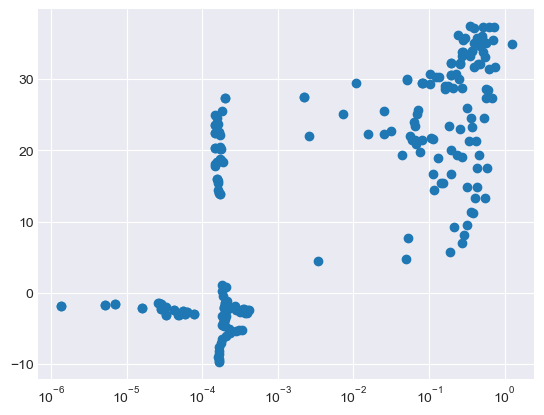

In [43]:
data1 = np.genfromtxt('./OD_debug_files/Cu100_pos_and_vol/middle/box_states_ref/Box_states_42_ref_44.dat',delimiter=',')
data2 = np.genfromtxt('./OD_debug_files/Cu100_pos_and_vol/middle/box_states_ref/Box_states_42_ref_43.dat',delimiter=',')
diff = np.abs(data1[:,2] - data2[:,2])
fig,ax = plt.subplots(1,1)
ax.scatter(diff,data1[:,0])
ax.set_xscale('log')

C:\Users\fcm19\AppData\Local\Temp\ipykernel_28776\3015437845.py:13: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt((zeta0/x)**2-1)
C:\Users\fcm19\AppData\Local\Temp\ipykernel_28776\3015437845.py:13: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((zeta0/x)**2-1)


TypeError: 'numpy.float64' object cannot be interpreted as an integer

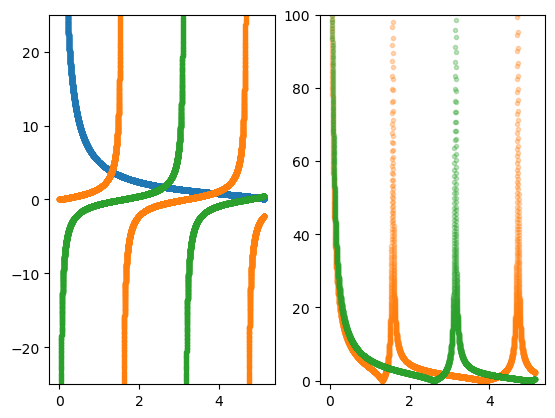

In [93]:
n = calc_v0_box_1d(17,8)
n

NameError: name 'calc_v0_box_1d' is not defined

In [163]:
energies = calc_particle_box_states(10,20)

In [167]:
sizes = box_size_from_energy_wrt_wrkfct(data1[:,0],4.558)
sizes

array([[  4.74517   ,   0.18717   ,   1.        ,  14.1743272 ],
       [  5.79147   ,   1.23347   ,   2.        ,  11.04297971],
       [  6.97755   ,   2.41955   ,   3.        ,  11.82699813],
       [  7.64608   ,   3.08808   ,   4.        ,  13.95842103],
       [  8.08027   ,   3.52227   ,   5.        ,  16.33726134],
       [  9.20713   ,   4.64913   ,   6.        ,  17.06420183],
       [  9.53462   ,   4.97662   ,   7.        ,  19.24205155],
       [ 11.17745   ,   6.61945   ,   8.        ,  19.06775697],
       [ 11.29377   ,   6.73577   ,   9.        ,  21.26519937],
       [ 13.2709    ,   8.7129    ,  10.        ,  20.77491278],
       [ 13.37333   ,   8.81533   ,  11.        ,  22.71924902],
       [ 13.86808   ,   9.31008   ,  12.        ,  24.11710163],
       [ 13.86808   ,   9.31008   ,  13.        ,  26.1268601 ],
       [ 14.07759   ,   9.51959   ,  14.        ,  27.82527643],
       [ 14.07759   ,   9.51959   ,  15.        ,  29.81279618],
       [ 14.38852   ,   9

In [47]:
np.max(data1[:,2])

1.6912

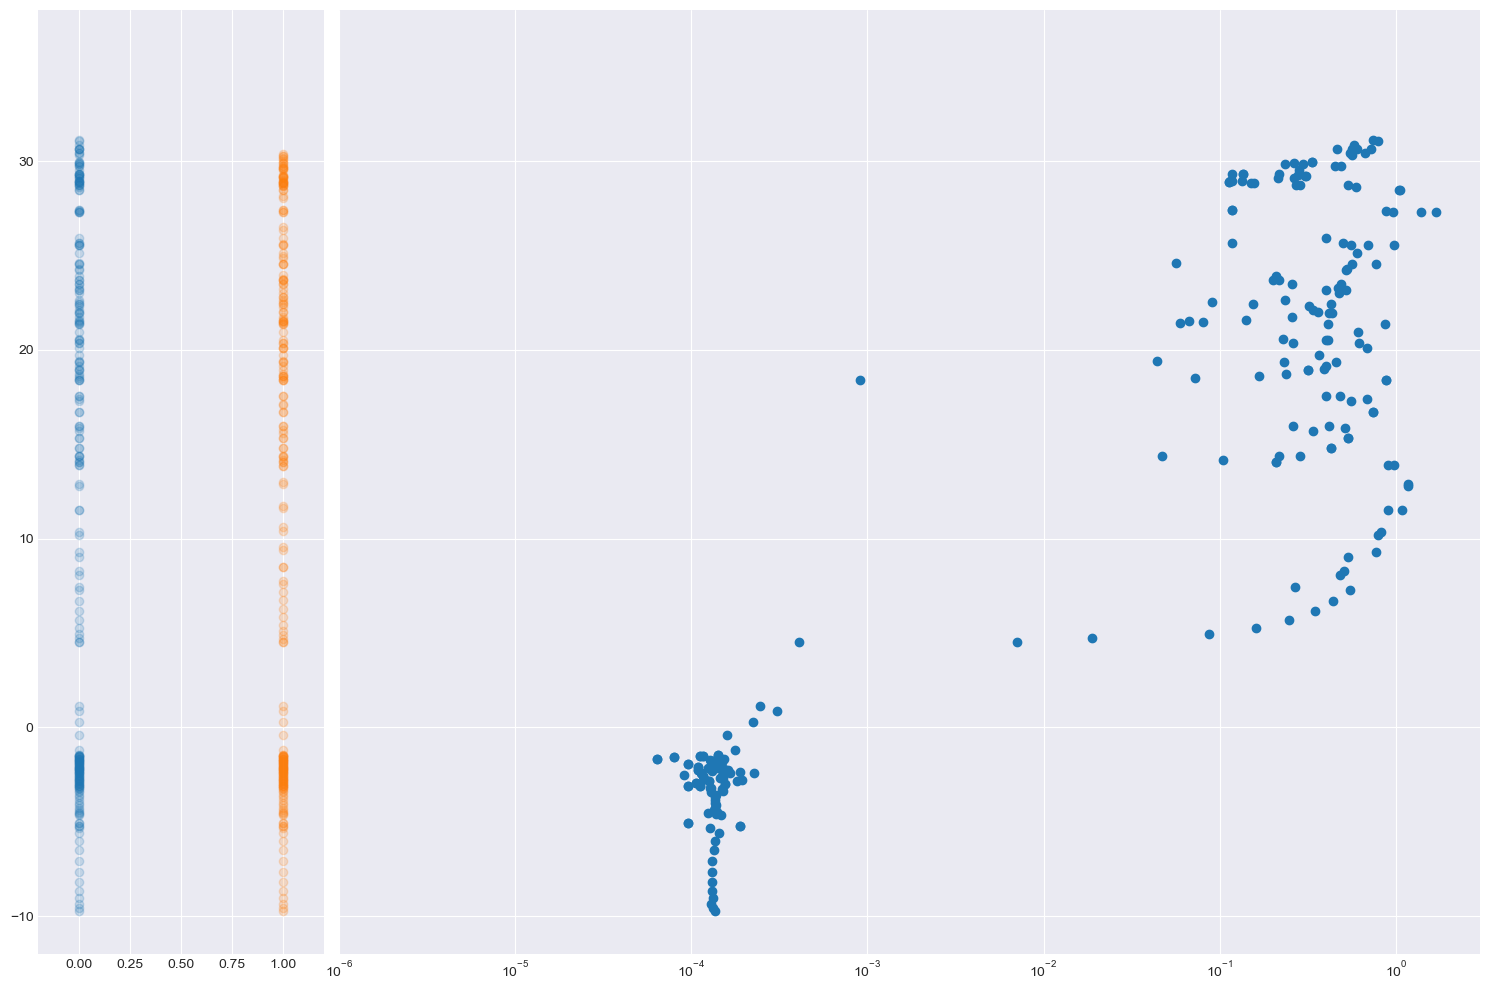

In [52]:
file = Path('./OD_debug_files/Cu100_pos_and_vol/middle/box_states_ref/Box_states_60_ref_64.dat')
fig,ax = create_band_ref_plot(file)
ax[0].set_ylim(-12,38)
ax[1].set_xlim(1e-6,3)
plt.savefig(str(file.parent) + '/'+ 'Box_ref_plot_60_64ref.png',dpi=150)